<h2>Importing modules required for running the code</h2>

In [1]:
import pandas as pd
import numpy
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Dropout,Flatten
from keras.layers import BatchNormalization


Using TensorFlow backend.
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Naresh\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

<h2>Columns Name for our testing and training data </h2>

In [2]:
features = ['frame.interface_id',
 'frame.dlt',
 'frame.offset_shift',
 'frame.time_epoch',
 'frame.time_delta',
 'frame.time_delta_displayed',
 'frame.time_relative',
 'frame.len',
 'frame.cap_len',
 'frame.marked',
 'frame.ignored',
 'radiotap.version',
 'radiotap.pad',
 'radiotap.length',
 'radiotap.present.tsft',
 'radiotap.present.flags',
 'radiotap.present.rate',
 'radiotap.present.channel',
 'radiotap.present.fhss',
 'radiotap.present.dbm_antsignal',
 'radiotap.present.dbm_antnoise',
 'radiotap.present.lock_quality',
 'radiotap.present.tx_attenuation',
 'radiotap.present.db_tx_attenuation',
 'radiotap.present.dbm_tx_power',
 'radiotap.present.antenna',
 'radiotap.present.db_antsignal',
 'radiotap.present.db_antnoise',
 'radiotap.present.rxflags',
 'radiotap.present.xchannel',
 'radiotap.present.mcs',
 'radiotap.present.ampdu',
 'radiotap.present.vht',
 'radiotap.present.reserved',
 'radiotap.present.rtap_ns',
 'radiotap.present.vendor_ns',
 'radiotap.present.ext',
 'radiotap.mactime',
 'radiotap.flags.cfp',
 'radiotap.flags.preamble',
 'radiotap.flags.wep',
 'radiotap.flags.frag',
 'radiotap.flags.fcs',
 'radiotap.flags.datapad',
 'radiotap.flags.badfcs',
 'radiotap.flags.shortgi',
 'radiotap.datarate',
 'radiotap.channel.freq',
 'radiotap.channel.type.turbo',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'radiotap.channel.type.2ghz',
 'radiotap.channel.type.5ghz',
 'radiotap.channel.type.passive',
 'radiotap.channel.type.dynamic',
 'radiotap.channel.type.gfsk',
 'radiotap.channel.type.gsm',
 'radiotap.channel.type.sturbo',
 'radiotap.channel.type.half',
 'radiotap.channel.type.quarter',
 'radiotap.dbm_antsignal',
 'radiotap.antenna',
 'radiotap.rxflags.badplcp',
 'wlan.fc.type_subtype',
 'wlan.fc.version',
 'wlan.fc.type',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.frag',
 'wlan.fc.retry',
 'wlan.fc.pwrmgt',
 'wlan.fc.moredata',
 'wlan.fc.protected',
 'wlan.fc.order',
 'wlan.duration',
 'wlan.ra',
 'wlan.da',
 'wlan.ta',
 'wlan.sa',
 'wlan.bssid',
 'wlan.frag',
 'wlan.seq',
 'wlan.bar.type',
 'wlan.ba.control.ackpolicy',
 'wlan.ba.control.multitid',
 'wlan.ba.control.cbitmap',
 'wlan.bar.compressed.tidinfo',
 'wlan.ba.bm',
 'wlan.fcs_good',
 'wlan_mgt.fixed.capabilities.ess',
 'wlan_mgt.fixed.capabilities.ibss',
 'wlan_mgt.fixed.capabilities.cfpoll.ap',
 'wlan_mgt.fixed.capabilities.privacy',
 'wlan_mgt.fixed.capabilities.preamble',
 'wlan_mgt.fixed.capabilities.pbcc',
 'wlan_mgt.fixed.capabilities.agility',
 'wlan_mgt.fixed.capabilities.spec_man',
 'wlan_mgt.fixed.capabilities.short_slot_time',
 'wlan_mgt.fixed.capabilities.apsd',
 'wlan_mgt.fixed.capabilities.radio_measurement',
 'wlan_mgt.fixed.capabilities.dsss_ofdm',
 'wlan_mgt.fixed.capabilities.del_blk_ack',
 'wlan_mgt.fixed.capabilities.imm_blk_ack',
 'wlan_mgt.fixed.listen_ival',
 'wlan_mgt.fixed.current_ap',
 'wlan_mgt.fixed.status_code',
 'wlan_mgt.fixed.timestamp',
 'wlan_mgt.fixed.beacon',
 'wlan_mgt.fixed.aid',
 'wlan_mgt.fixed.reason_code',
 'wlan_mgt.fixed.auth.alg',
 'wlan_mgt.fixed.auth_seq',
 'wlan_mgt.fixed.category_code',
 'wlan_mgt.fixed.htact',
 'wlan_mgt.fixed.chanwidth',
 'wlan_mgt.fixed.fragment',
 'wlan_mgt.fixed.sequence',
 'wlan_mgt.tagged.all',
 'wlan_mgt.ssid',
 'wlan_mgt.ds.current_channel',
 'wlan_mgt.tim.dtim_count',
 'wlan_mgt.tim.dtim_period',
 'wlan_mgt.tim.bmapctl.multicast',
 'wlan_mgt.tim.bmapctl.offset',
 'wlan_mgt.country_info.environment',
 'wlan_mgt.rsn.version',
 'wlan_mgt.rsn.gcs.type',
 'wlan_mgt.rsn.pcs.count',
 'wlan_mgt.rsn.akms.count',
 'wlan_mgt.rsn.akms.type',
 'wlan_mgt.rsn.capabilities.preauth',
 'wlan_mgt.rsn.capabilities.no_pairwise',
 'wlan_mgt.rsn.capabilities.ptksa_replay_counter',
 'wlan_mgt.rsn.capabilities.gtksa_replay_counter',
 'wlan_mgt.rsn.capabilities.mfpr',
 'wlan_mgt.rsn.capabilities.mfpc',
 'wlan_mgt.rsn.capabilities.peerkey',
 'wlan_mgt.tcprep.trsmt_pow',
 'wlan_mgt.tcprep.link_mrg',
 'wlan.wep.iv',
 'wlan.wep.key',
 'wlan.wep.icv',
 'wlan.tkip.extiv',
 'wlan.ccmp.extiv',
 'wlan.qos.tid',
 'wlan.qos.priority',
 'wlan.qos.eosp',
 'wlan.qos.ack',
 'wlan.qos.amsdupresent',
 'wlan.qos.buf_state_indicated1',
 'wlan.qos.bit4',
 'wlan.qos.txop_dur_req',
 'wlan.qos.buf_state_indicated2',
 'data.len',
 'class']

<h2> Training Dataset </h2>

In [3]:
awid = pd.read_csv("AWID-CLS-R-Trn", header=None, names=features)

C:\Users\Naresh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2> Data Exploration</h2>

In [4]:
awid.head()

frame.interface_id frame.dlt  frame.offset_shift  frame.time_epoch  \
0                   0         ?                 0.0      1.393661e+09   
1                   0         ?                 0.0      1.393661e+09   
2                   0         ?                 0.0      1.393661e+09   
3                   0         ?                 0.0      1.393661e+09   
4                   0         ?                 0.0      1.393661e+09   

   frame.time_delta  frame.time_delta_displayed  frame.time_relative  \
0          0.000000                    0.000000             0.000000   
1          0.024271                    0.024271             0.024271   
2          0.001631                    0.001631             0.025902   
3          0.055325                    0.055325             0.081227   
4          0.000415                    0.000415             0.081642   

   frame.len  frame.cap_len  frame.marked  ...  wlan.qos.priority  \
0        261            261             0  ...                  ?   
1        185            185             0  ...                  ?   
2        185            185             0  ...                  ?   
3        159            159             0  ...                  ?   
4         54             54             0  ...                  ?   

   wlan.qos.eosp  wlan.qos.ack  wlan.qos.amsdupresent  \
0              ?             ?                      ?   
1              ?             ?                      ?   
2              ?             ?                      ?   
3              ?             ?                      ?   
4              ?             ?                      ?   

   wlan.qos.buf_state_indicated1  wlan.qos.bit4  wlan.qos.txop_dur_req  \
0                              ?              ?                      ?   
1                              ?              ?                      ?   
2                              ?              ?                      ?   
3                              ?              ?                      ?   
4                              ?              ?                      ?   

   wlan.qos.buf_state_indicated2  data.len   class  
0                              ?         ?  normal  
1                              ?         ?  normal  
2                              ?         ?  normal  
3                              ?         ?  normal  
4                              ?         ?  normal  

[5 rows x 155 columns]

In [5]:
awid.describe()

frame.interface_id  frame.offset_shift  frame.time_epoch  \
count           1795575.0           1795575.0      1.795575e+06   
mean                  0.0                 0.0      1.393663e+09   
std                   0.0                 0.0      8.674448e+02   
min                   0.0                 0.0      1.393661e+09   
25%                   0.0                 0.0      1.393662e+09   
50%                   0.0                 0.0      1.393663e+09   
75%                   0.0                 0.0      1.393664e+09   
max                   0.0                 0.0      1.393665e+09   

       frame.time_delta  frame.time_delta_displayed  frame.time_relative  \
count      1.795575e+06                1.795575e+06         1.795575e+06   
mean       2.004690e-03                2.004690e-03         1.870294e+03   
std        6.379536e-03                6.379536e-03         8.674448e+02   
min        0.000000e+00                0.000000e+00         0.000000e+00   
25%        3.150000e-04                3.150000e-04         1.027875e+03   
50%        5.490000e-04                5.490000e-04         1.902614e+03   
75%        1.113000e-03                1.113000e-03         2.524325e+03   
max        3.502630e-01                3.502630e-01         3.599571e+03   

          frame.len  frame.cap_len  frame.marked  frame.ignored  ...  \
count  1.795575e+06   1.795575e+06     1795575.0      1795575.0  ...   
mean   5.153149e+02   5.153149e+02           0.0            0.0  ...   
std    6.649245e+02   6.649245e+02           0.0            0.0  ...   
min    4.000000e+01   4.000000e+01           0.0            0.0  ...   
25%    4.000000e+01   4.000000e+01           0.0            0.0  ...   
50%    1.120000e+02   1.120000e+02           0.0            0.0  ...   
75%    1.552000e+03   1.552000e+03           0.0            0.0  ...   
max    1.570000e+03   1.570000e+03           0.0            0.0  ...   

       radiotap.datarate  wlan.fc.version  wlan.fc.type  wlan.fc.subtype  \
count       1.795575e+06        1795575.0  1.795575e+06     1.795575e+06   
mean        2.513950e+01              0.0  1.272582e+00     8.499055e+00   
std         2.373590e+01              0.0  8.198060e-01     4.173015e+00   
min         1.000000e+00              0.0  0.000000e+00     0.000000e+00   
25%         1.000000e+00              0.0  1.000000e+00     8.000000e+00   
50%         2.400000e+01              0.0  2.000000e+00     8.000000e+00   
75%         5.400000e+01              0.0  2.000000e+00     1.200000e+01   
max         5.400000e+01              0.0  2.000000e+00     1.300000e+01   

       wlan.fc.frag  wlan.fc.retry  wlan.fc.pwrmgt  wlan.fc.moredata  \
count  1.795575e+06   1.795575e+06    1.795575e+06      1.795575e+06   
mean   3.748103e-04   1.271080e-01    2.325216e-02      1.772691e-03   
std    1.935639e-02   3.330940e-01    1.507034e-01      4.206602e-02   
min    0.000000e+00   0.000000e+00    0.000000e+00      0.000000e+00   
25%    0.000000e+00   0.000000e+00    0.000000e+00      0.000000e+00   
50%    0.000000e+00   0.000000e+00    0.000000e+00      0.000000e+00   
75%    0.000000e+00   0.000000e+00    0.000000e+00      0.000000e+00   
max    1.000000e+00   1.000000e+00    1.000000e+00      1.000000e+00   

       wlan.fc.protected  wlan.fc.order  
count       1.795575e+06      1795575.0  
mean        4.932927e-01            0.0  
std         4.999551e-01            0.0  
min         0.000000e+00            0.0  
25%         0.000000e+00            0.0  
50%         0.000000e+00            0.0  
75%         1.000000e+00            0.0  
max         1.000000e+00            0.0  

[8 rows x 45 columns]

In [6]:
awid['class'].value_counts()

normal           1633190
injection          65379
impersonation      48522
flooding           48484
Name: class, dtype: int64

In [7]:
awid.isna().sum()

frame.interface_id               0
frame.dlt                        0
frame.offset_shift               0
frame.time_epoch                 0
frame.time_delta                 0
                                ..
wlan.qos.bit4                    0
wlan.qos.txop_dur_req            0
wlan.qos.buf_state_indicated2    0
data.len                         0
class                            0
Length: 155, dtype: int64

<h2> Dropping columns with 50% of null data</h2>

In [8]:
awid.replace({"?":None}, inplace=True)
null_column=awid.columns[awid.isnull().mean() >= 0.51]
null_column.shape

(70,)

<h2>Dropping all the null rows</h2>

In [9]:
awid.drop(null_column, axis=1, inplace=True)
awid.dropna(inplace=True)

In [10]:
awid.isna().sum()

frame.interface_id            0
frame.offset_shift            0
frame.time_epoch              0
frame.time_delta              0
frame.time_delta_displayed    0
                             ..
wlan.seq                      0
wlan.fcs_good                 0
wlan.wep.key                  0
data.len                      0
class                         0
Length: 85, dtype: int64

In [11]:
awid['class'].value_counts()

normal           775634
injection         65379
impersonation     44731
Name: class, dtype: int64

<h2>Converting all the Columns to numeric</h2>

In [12]:
for col in awid.columns:
    awid[col]=pd.to_numeric(awid[col], errors='ignore')

In [13]:
awid.select_dtypes(['number']).head()

frame.interface_id  frame.offset_shift  frame.time_epoch  \
17                   0                 0.0      1.393661e+09   
18                   0                 0.0      1.393661e+09   
20                   0                 0.0      1.393661e+09   
28                   0                 0.0      1.393661e+09   
31                   0                 0.0      1.393661e+09   

    frame.time_delta  frame.time_delta_displayed  frame.time_relative  \
17          0.002270                    0.002270             0.217518   
18          0.000621                    0.000621             0.218139   
20          0.000144                    0.000144             0.229118   
28          0.021711                    0.021711             0.367359   
31          0.000058                    0.000058             0.380933   

    frame.len  frame.cap_len  frame.marked  frame.ignored  ...  \
17       1524           1524             0              0  ...   
18        124            124             0              0  ...   
20        153            153             0              0  ...   
28        124            124             0              0  ...   
31        124            124             0              0  ...   

    wlan.fc.pwrmgt  wlan.fc.moredata  wlan.fc.protected  wlan.fc.order  \
17               0                 0                  1              0   
18               0                 0                  1              0   
20               0                 0                  1              0   
28               0                 0                  1              0   
31               0                 0                  1              0   

    wlan.duration  wlan.frag  wlan.seq  wlan.fcs_good  wlan.wep.key  data.len  
17             44          0        96              1             0      1460  
18             44          0      1217              1             0        60  
20             44          0        97              1             0        89  
28             44          0      1220              1             0        60  
31             44          0        99              1             0        60  

[5 rows x 76 columns]

<h2>Splitting the training data</h2>

In [14]:
X_train, y_train = awid.select_dtypes(['number']), awid['class']


In [15]:
y_train.value_counts()

normal           775634
injection         65379
impersonation     44731
Name: class, dtype: int64

<h2>Removing all the Constant of training data</h2>

In [16]:
zero_mean=X_train.columns[X_train.mean() <= 1]
X_train.drop(zero_mean, axis=1, inplace=True, errors='ignore')
X_train.shape

C:\Users\Naresh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(885744, 13)

In [17]:
X_train.describe()

frame.time_epoch  frame.time_relative      frame.len  frame.cap_len  \
count      8.857440e+05        885744.000000  885744.000000  885744.000000   
mean       1.393663e+09          1804.671067     967.176877     967.176877   
std        8.321081e+02           832.108077     699.334423     699.334423   
min        1.393661e+09             0.217518      65.000000      65.000000   
25%        1.393662e+09           961.030476     124.000000     124.000000   
50%        1.393663e+09          1929.983103    1552.000000    1552.000000   
75%        1.393664e+09          2206.561865    1554.000000    1554.000000   
max        1.393665e+09          3599.425846    1570.000000    1570.000000   

       radiotap.length  radiotap.mactime  radiotap.datarate  \
count         885744.0      8.857440e+05      885744.000000   
mean              26.0      3.906253e+09          42.140876   
std                0.0      8.320998e+08          20.953351   
min               26.0      2.101817e+09           1.000000   
25%               26.0      3.062621e+09          48.000000   
50%               26.0      4.031564e+09          54.000000   
75%               26.0      4.308140e+09          54.000000   
max               26.0      5.700990e+09          54.000000   

       radiotap.channel.freq   wlan.fc.type  wlan.fc.subtype  wlan.duration  \
count          885744.000000  885744.000000    885744.000000  885744.000000   
mean             2437.008022       1.999688         5.973751      60.130699   
std                 0.535839       0.024962         3.479865      75.964734   
min              2412.000000       0.000000         0.000000       0.000000   
25%              2437.000000       2.000000         0.000000      44.000000   
50%              2437.000000       2.000000         8.000000      44.000000   
75%              2437.000000       2.000000         8.000000      44.000000   
max              2472.000000       2.000000        11.000000     314.000000   

            wlan.seq       data.len  
count  885744.000000  885744.000000  
mean     1909.654222     903.683868  
std      1213.594220     698.842577  
min         0.000000       3.000000  
25%       798.000000      60.000000  
50%      1862.000000    1488.000000  
75%      2957.000000    1490.000000  
max      4095.000000    1508.000000

<h2>Testing Data</h2>

In [18]:
awid_test = pd.read_csv("AWID-CLS-R-Tst/AWID-CLS-R-Tst", header=None, names=features)


C:\Users\Naresh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<h2>Cleaning testing data</h2>

In [19]:
awid_test.isna().sum()
awid_test.replace({"?":None}, inplace=True)
test_null_column=awid_test.columns[awid_test.isnull().mean() >= 0.5]
awid_test.drop(test_null_column, axis=1, inplace=True)
awid_test.dropna(inplace=True)

for col in awid_test.columns:
    awid_test[col]=pd.to_numeric(awid_test[col], errors='ignore')


X_test, y_test = awid_test.select_dtypes(['number']), awid_test['class']

zero_mean=X_test.columns[X_test.mean() <= 1]
X_test.drop(zero_mean, axis=1, inplace=True, errors='ignore')

C:\Users\Naresh\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
X_test.describe()

frame.time_epoch  frame.time_relative      frame.len  frame.cap_len  \
count      3.132480e+05        313248.000000  313248.000000  313248.000000   
mean       1.393669e+09           419.131540     892.088681     892.088681   
std        3.968335e+02           396.833483     713.371196     713.371196   
min        1.393668e+09             0.000000      65.000000      65.000000   
25%        1.393668e+09            74.256986     124.000000     124.000000   
50%        1.393668e+09           255.078000    1552.000000    1552.000000   
75%        1.393669e+09           852.944268    1552.000000    1552.000000   
max        1.393669e+09          1200.289872    1570.000000    1570.000000   

       radiotap.length  radiotap.mactime  radiotap.datarate  \
count         313248.0      3.132480e+05      313248.000000   
mean              26.0      9.407048e+09          36.257678   
std                0.0      3.968294e+08          21.867087   
min               26.0      8.987921e+09           1.000000   
25%               26.0      9.062177e+09          18.000000   
50%               26.0      9.242996e+09          54.000000   
75%               26.0      9.840856e+09          54.000000   
max               26.0      1.018820e+10          54.000000   

       radiotap.channel.freq   wlan.fc.type  wlan.fc.subtype  wlan.duration  \
count          313248.000000  313248.000000    313248.000000  313248.000000   
mean             2437.006544       1.999757         4.797611      80.225144   
std                 0.563983       0.022027         3.920187      98.175003   
min              2412.000000       0.000000         0.000000       0.000000   
25%              2437.000000       2.000000         0.000000      44.000000   
50%              2437.000000       2.000000         8.000000      44.000000   
75%              2437.000000       2.000000         8.000000      44.000000   
max              2472.000000       2.000000        11.000000     314.000000   

            wlan.seq       data.len  
count  313248.000000  313248.000000  
mean     1849.670600     828.889611  
std      1158.063441     712.901695  
min         0.000000       3.000000  
25%       920.000000      60.000000  
50%      1646.000000    1488.000000  
75%      2812.000000    1488.000000  
max      4095.000000    1508.000000

In [21]:
y_test.value_counts()

normal           277960
impersonation     18606
injection         16682
Name: class, dtype: int64

<h2>Preprocessing and Feature Scaling   </h2> 

In [22]:
sc=StandardScaler()
sc.fit(X_train)
scaled_X_train=sc.transform(X_train)

sc1=StandardScaler()
sc1.fit(X_test)
scaled_X_test=sc1.transform(X_test)

In [23]:
X_train

frame.time_epoch  frame.time_relative  frame.len  frame.cap_len  \
17           1.393661e+09             0.217518       1524           1524   
18           1.393661e+09             0.218139        124            124   
20           1.393661e+09             0.229118        153            153   
28           1.393661e+09             0.367359        124            124   
31           1.393661e+09             0.380933        124            124   
...                   ...                  ...        ...            ...   
1795504      1.393665e+09          3599.043342        112            112   
1795511      1.393665e+09          3599.086311        112            112   
1795551      1.393665e+09          3599.323495       1524           1524   
1795556      1.393665e+09          3599.375225       1523           1523   
1795561      1.393665e+09          3599.425846        440            440   

         radiotap.length  radiotap.mactime  radiotap.datarate  \
17                    26        2101817362               54.0   
18                    26        2101818213               54.0   
20                    26        2101829175               54.0   
28                    26        2101967429               54.0   
31                    26        2101981052               54.0   
...                  ...               ...                ...   
1795504               26        5700607575               18.0   
1795511               26        5700650521               18.0   
1795551               26        5700887520               54.0   
1795556               26        5700939250               54.0   
1795561               26        5700990054               54.0   

         radiotap.channel.freq  wlan.fc.type  wlan.fc.subtype  wlan.duration  \
17                        2437             2                8             44   
18                        2437             2                8             44   
20                        2437             2                8             44   
28                        2437             2                8             44   
31                        2437             2                8             44   
...                        ...           ...              ...            ...   
1795504                   2437             2                8             48   
1795511                   2437             2                8             48   
1795551                   2437             2                8             44   
1795556                   2437             2                8             44   
1795561                   2437             2                8             44   

         wlan.seq  data.len  
17             96      1460  
18           1217        60  
20             97        89  
28           1220        60  
31             99        60  
...           ...       ...  
1795504      2608        48  
1795511      2609        48  
1795551         0      1460  
1795556         1      1459  
1795561       729       376  

[885744 rows x 13 columns]

In [24]:

print(X_train.dtypes)

frame.time_epoch         float64
frame.time_relative      float64
frame.len                  int64
frame.cap_len              int64
radiotap.length            int64
radiotap.mactime           int64
radiotap.datarate        float64
radiotap.channel.freq      int64
wlan.fc.type               int64
wlan.fc.subtype            int64
wlan.duration              int64
wlan.seq                   int64
data.len                   int64
dtype: object


In [25]:
print(scaled_X_train)
print(scaled_X_train.dtype)


[[-2.16853389 -2.16853389  0.79621912 ... -0.21234469 -1.49444948
   0.79605402]
 [-2.16853315 -2.16853315 -1.20568547 ... -0.21234469 -0.57074647
  -1.20725951]
 [-2.16851995 -2.16851995 -1.16421745 ... -0.21234469 -1.49362548
  -1.1657623 ]
 ...
 [ 2.15675522  2.15675522  0.79621912 ... -0.21234469 -1.57355339
   0.79605402]
 [ 2.15681739  2.15681739  0.79478919 ... -0.21234469 -1.57272939
   0.79462309]
 [ 2.15687822  2.15687823 -0.75382701 ... -0.21234469 -0.97285803
  -0.75508302]]
float64


<h2>Encoding the label data</h2>

In [26]:
encoder = LabelEncoder()
encoded_y=encoder.fit_transform(y_train)
enc_y_test=encoder.fit_transform(y_test)

In [27]:
encoder.classes_

array(['impersonation', 'injection', 'normal'], dtype=object)

In [28]:
enc_y_test

array([2, 2, 2, ..., 2, 2, 2])

<h2>Using Dense Neural Network (DNN) with Binary Classification </h2>

In [29]:
#Since it is not binary classification problem, 
#the fully connected neural network does not give us good accuracy and loss

model1 = Sequential()
model1.add(Dense(150, input_shape=(scaled_X_train.shape[1],), activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(150, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['accuracy'])

model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               2100      
_________________________________________________________________
batch_normalization_1 (Batch (None, 150)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
batch_normalization_2 (Batch (None, 150)               600       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 26,101
Trainable params: 25,501
Non-trainable params: 600
_________________________________________________________________


In [30]:
hist1=model1.fit(scaled_X_train, encoded_y,validation_split=0.1, batch_size=512,epochs=5)


Instructions for updating:
Use tf.cast instead.
Train on 797169 samples, validate on 88575 samples
Epoch 1/5
797169/797169 [==============================] - 7s 8us/step - loss: -12.1146 - accuracy: 0.0560 - val_loss: -11.7296 - val_accuracy: 0.0000e+00
Epoch 2/5
797169/797169 [==============================] - 7s 9us/step - loss: -13.3088 - accuracy: 0.0934 - val_loss: -11.7615 - val_accuracy: 0.0000e+00
Epoch 3/5
797169/797169 [==============================] - 7s 9us/step - loss: -13.8352 - accuracy: 0.1261 - val_loss: -14.5906 - val_accuracy: 0.0820
Epoch 4/5
797169/797169 [==============================] - 7s 9us/step - loss: -13.8817 - accuracy: 0.1288 - val_loss: -14.4668 - val_accuracy: 0.0820
Epoch 5/5
797169/797169 [==============================] - 7s 9us/step - loss: -13.8804 - accuracy: 0.1288 - val_loss: -14.6146 - val_accuracy: 0.0820


In [31]:
model1_loss, model1_accuracy = model1.evaluate(scaled_X_test, enc_y_test)
model1_accuracy

313248/313248 [==============================] - 5s 15us/step


0.053254928439855576

In [32]:
print('Loss :{loss},\nAccuracy of DNN model1 : {accuracy}'.format(loss= model1_loss,accuracy=model1_accuracy))

Loss :-13.19694100132933,
Accuracy of DNN model1 : 0.053254928439855576


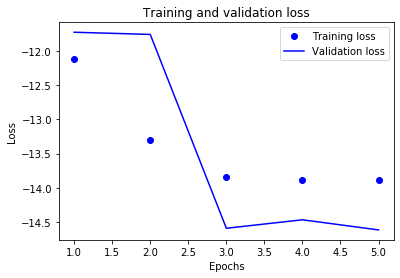

In [33]:
import matplotlib.pyplot as plt

acc = hist1.history['accuracy']
val_acc = hist1.history['val_accuracy']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

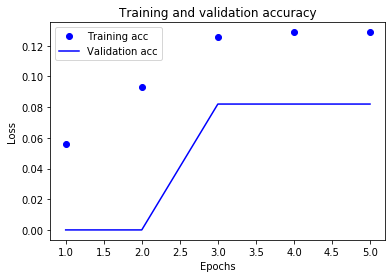

In [34]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Changing it to Categorical </h2>

In [35]:
cat_y_train=to_categorical(encoded_y)
cat_y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [36]:
cat_y_test=to_categorical(enc_y_test)
cat_y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

<h2>DNN for Multiclass Classification </h2>

In [37]:
#Neural Network(Multiclass/Categorical Crossentropy)
model2 = Sequential()
model2.add(Dense(5, input_shape=(scaled_X_train.shape[1],), activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 5)                 70        
_________________________________________________________________
batch_normalization_3 (Batch (None, 5)                 20        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                60        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 33        
Total params: 183
Trainable params: 173
Non-trainable params: 10
_______________________________________________________

In [38]:
hist=model2.fit(scaled_X_train,cat_y_train,batch_size=512,validation_split=0.1,
               epochs=5, verbose=1)

Train on 797169 samples, validate on 88575 samples
Epoch 1/5
797169/797169 [==============================] - 3s 4us/step - loss: 0.2003 - accuracy: 0.9257 - val_loss: 0.3917 - val_accuracy: 0.9667
Epoch 2/5
797169/797169 [==============================] - 3s 4us/step - loss: 0.0670 - accuracy: 0.9743 - val_loss: 0.5167 - val_accuracy: 0.9671
Epoch 3/5
797169/797169 [==============================] - 3s 4us/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.5133 - val_accuracy: 0.9675
Epoch 4/5
797169/797169 [==============================] - 3s 3us/step - loss: 0.0407 - accuracy: 0.9875 - val_loss: 0.5098 - val_accuracy: 0.9676
Epoch 5/5
797169/797169 [==============================] - 3s 4us/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.5108 - val_accuracy: 0.9676


In [39]:
model2_loss, model2_accuracy = model2.evaluate(scaled_X_test,cat_y_test)

313248/313248 [==============================] - 4s 11us/step


In [40]:
print('Loss :{loss},\nAccuracy of DNN 2 : {accuracy}'.format(loss= model2_loss,accuracy=model2_accuracy))

Loss :0.46613795795017693,
Accuracy of DNN 2 : 0.9177328944206238


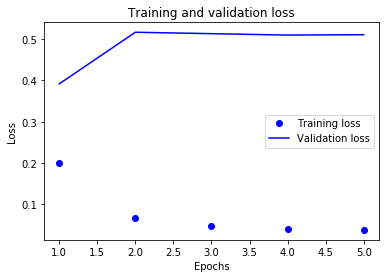

In [41]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

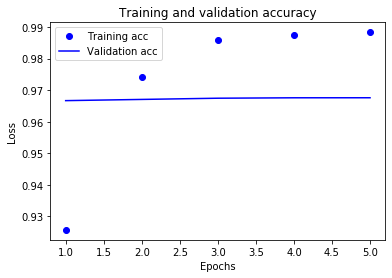

In [42]:
acc_values = hist.history['accuracy']
val_acc_values = hist.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Reshaping to the array to 3-Dimensional array  </h2>

In [43]:
#Reshape input to be [samples, time steps, features] to work with LSTM

third_X_train = numpy.reshape(scaled_X_train, (scaled_X_train.shape[0], 1, scaled_X_train.shape[1]))
third_X_train.shape

(885744, 1, 13)

In [44]:
third_X_test = numpy.reshape(scaled_X_test,(scaled_X_test.shape[0], 1, scaled_X_test.shape[1]))
third_X_test.shape

(313248, 1, 13)

<h2>Using Recurrent Neural Network with LSTM </h2>

In [45]:
#LSTM expect 3-Dimension array to be the input 
#Using just one layer of LSTM 
lstm_model=Sequential()

lstm_model.add(LSTM(5,input_shape=(1, third_X_train.shape[2]),
                    return_sequences=True, activation='relu'))
lstm_model.add(Flatten())

lstm_model.add(Dense(3, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 5)              380       
_________________________________________________________________
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 18        
Total params: 398
Trainable params: 398
Non-trainable params: 0
_________________________________________________________________


<h2>Training and evaluating the model </h2>

In [46]:
history_lstm=lstm_model.fit(third_X_train, cat_y_train,batch_size=50,
               epochs=5, validation_split=0.1, verbose=1)

Train on 797169 samples, validate on 88575 samples
Epoch 1/5
797169/797169 [==============================] - 21s 27us/step - loss: 0.0267 - accuracy: 0.9930 - val_loss: 0.5664 - val_accuracy: 0.8381
Epoch 2/5
797169/797169 [==============================] - 21s 26us/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.1608 - val_accuracy: 0.9684
Epoch 3/5
797169/797169 [==============================] - 19s 24us/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.2550 - val_accuracy: 0.9683
Epoch 4/5
797169/797169 [==============================] - 20s 25us/step - loss: 9.9112e-04 - accuracy: 0.9998 - val_loss: 0.2697 - val_accuracy: 0.9683
Epoch 5/5
797169/797169 [==============================] - 19s 24us/step - loss: 9.3115e-04 - accuracy: 0.9998 - val_loss: 0.2809 - val_accuracy: 0.9683


In [47]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(third_X_test, cat_y_test)

313248/313248 [==============================] - 4s 13us/step


In [48]:
print('Loss :{loss},\nAccuracy of LSTM Model : {accuracy}'.format(loss=lstm_loss,accuracy=lstm_accuracy))

Loss :1.0222967098767897,
Accuracy of LSTM Model : 0.9309620261192322


<h2> Plotting the Training/Validation Loss and Accuracy</h2>

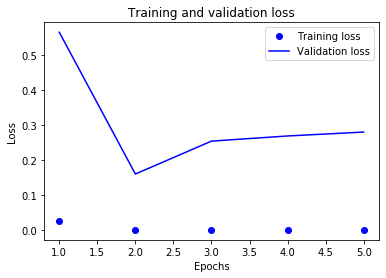

In [49]:
import matplotlib.pyplot as plt

acc = history_lstm.history['accuracy']
val_acc = history_lstm.history['val_accuracy']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

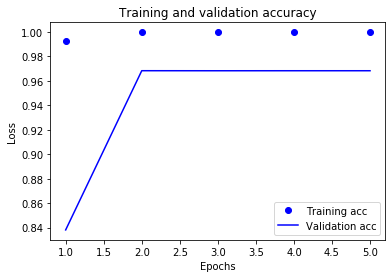

In [50]:
acc_values = history_lstm.history['accuracy']
val_acc_values = history_lstm.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Predicting the Model </h2>

In [51]:
preds=lstm_model.predict_classes(third_X_test)

In [52]:
transpose=numpy.transpose([enc_y_test, preds])

In [53]:
#Actual class is first element and Predicted Class is second element of and array
transpose

array([[2, 2],
       [2, 2],
       [2, 2],
       ...,
       [2, 2],
       [2, 2],
       [2, 2]], dtype=int64)

In [54]:
#From the below code we can observe the predicted and actual label
#we can range(len(en_y_test)), but for this time we are getting the labels
#for last ten thousands outcomes

for i in range(50000):
    prediction = encoder.classes_[transpose[i,1]]
    actual = encoder.classes_[transpose[i,0]]
    print( "At line",i, "The model predicted :", prediction, ", When the Actual is :", actual)

At line 0 The model predicted : normal , When the Actual is : normal
At line 1 The model predicted : normal , When the Actual is : normal
At line 2 The model predicted : normal , When the Actual is : normal
At line 3 The model predicted : normal , When the Actual is : normal
At line 4 The model predicted : normal , When the Actual is : normal
At line 5 The model predicted : normal , When the Actual is : normal
At line 6 The model predicted : normal , When the Actual is : normal
At line 7 The model predicted : normal , When the Actual is : normal
At line 8 The model predicted : normal , When the Actual is : normal
At line 9 The model predicted : normal , When the Actual is : normal
At line 10 The model predicted : normal , When the Actual is : normal
At line 11 The model predicted : normal , When the Actual is : normal
At line 12 The model predicted : normal , When the Actual is : normal
At line 13 The model predicted : normal , When the Actual is : normal
At line 14 The model predicted

At line 313 The model predicted : normal , When the Actual is : normal
At line 314 The model predicted : normal , When the Actual is : normal
At line 315 The model predicted : normal , When the Actual is : normal
At line 316 The model predicted : normal , When the Actual is : normal
At line 317 The model predicted : normal , When the Actual is : normal
At line 318 The model predicted : normal , When the Actual is : normal
At line 319 The model predicted : normal , When the Actual is : normal
At line 320 The model predicted : normal , When the Actual is : normal
At line 321 The model predicted : normal , When the Actual is : normal
At line 322 The model predicted : normal , When the Actual is : normal
At line 323 The model predicted : normal , When the Actual is : normal
At line 324 The model predicted : normal , When the Actual is : normal
At line 325 The model predicted : normal , When the Actual is : normal
At line 326 The model predicted : normal , When the Actual is : normal
At lin

At line 591 The model predicted : normal , When the Actual is : normal
At line 592 The model predicted : normal , When the Actual is : normal
At line 593 The model predicted : normal , When the Actual is : normal
At line 594 The model predicted : normal , When the Actual is : normal
At line 595 The model predicted : normal , When the Actual is : normal
At line 596 The model predicted : normal , When the Actual is : normal
At line 597 The model predicted : normal , When the Actual is : normal
At line 598 The model predicted : normal , When the Actual is : normal
At line 599 The model predicted : normal , When the Actual is : normal
At line 600 The model predicted : normal , When the Actual is : normal
At line 601 The model predicted : normal , When the Actual is : normal
At line 602 The model predicted : normal , When the Actual is : normal
At line 603 The model predicted : normal , When the Actual is : normal
At line 604 The model predicted : normal , When the Actual is : normal
At lin

At line 856 The model predicted : normal , When the Actual is : normal
At line 857 The model predicted : normal , When the Actual is : normal
At line 858 The model predicted : normal , When the Actual is : normal
At line 859 The model predicted : normal , When the Actual is : normal
At line 860 The model predicted : normal , When the Actual is : normal
At line 861 The model predicted : normal , When the Actual is : normal
At line 862 The model predicted : normal , When the Actual is : normal
At line 863 The model predicted : normal , When the Actual is : normal
At line 864 The model predicted : normal , When the Actual is : normal
At line 865 The model predicted : normal , When the Actual is : normal
At line 866 The model predicted : normal , When the Actual is : normal
At line 867 The model predicted : normal , When the Actual is : normal
At line 868 The model predicted : normal , When the Actual is : normal
At line 869 The model predicted : normal , When the Actual is : normal
At lin

At line 1103 The model predicted : normal , When the Actual is : normal
At line 1104 The model predicted : normal , When the Actual is : normal
At line 1105 The model predicted : normal , When the Actual is : normal
At line 1106 The model predicted : normal , When the Actual is : normal
At line 1107 The model predicted : normal , When the Actual is : normal
At line 1108 The model predicted : normal , When the Actual is : normal
At line 1109 The model predicted : normal , When the Actual is : normal
At line 1110 The model predicted : normal , When the Actual is : normal
At line 1111 The model predicted : normal , When the Actual is : normal
At line 1112 The model predicted : normal , When the Actual is : normal
At line 1113 The model predicted : normal , When the Actual is : normal
At line 1114 The model predicted : normal , When the Actual is : normal
At line 1115 The model predicted : normal , When the Actual is : normal
At line 1116 The model predicted : normal , When the Actual is :

At line 1368 The model predicted : normal , When the Actual is : normal
At line 1369 The model predicted : normal , When the Actual is : normal
At line 1370 The model predicted : normal , When the Actual is : normal
At line 1371 The model predicted : normal , When the Actual is : normal
At line 1372 The model predicted : normal , When the Actual is : normal
At line 1373 The model predicted : normal , When the Actual is : normal
At line 1374 The model predicted : normal , When the Actual is : normal
At line 1375 The model predicted : normal , When the Actual is : normal
At line 1376 The model predicted : normal , When the Actual is : normal
At line 1377 The model predicted : normal , When the Actual is : normal
At line 1378 The model predicted : normal , When the Actual is : normal
At line 1379 The model predicted : normal , When the Actual is : normal
At line 1380 The model predicted : normal , When the Actual is : normal
At line 1381 The model predicted : normal , When the Actual is :

At line 1637 The model predicted : normal , When the Actual is : normal
At line 1638 The model predicted : normal , When the Actual is : normal
At line 1639 The model predicted : normal , When the Actual is : normal
At line 1640 The model predicted : normal , When the Actual is : normal
At line 1641 The model predicted : normal , When the Actual is : normal
At line 1642 The model predicted : normal , When the Actual is : normal
At line 1643 The model predicted : normal , When the Actual is : normal
At line 1644 The model predicted : normal , When the Actual is : normal
At line 1645 The model predicted : normal , When the Actual is : normal
At line 1646 The model predicted : normal , When the Actual is : normal
At line 1647 The model predicted : normal , When the Actual is : normal
At line 1648 The model predicted : normal , When the Actual is : normal
At line 1649 The model predicted : normal , When the Actual is : normal
At line 1650 The model predicted : normal , When the Actual is :

At line 1901 The model predicted : normal , When the Actual is : normal
At line 1902 The model predicted : normal , When the Actual is : normal
At line 1903 The model predicted : normal , When the Actual is : normal
At line 1904 The model predicted : normal , When the Actual is : normal
At line 1905 The model predicted : normal , When the Actual is : normal
At line 1906 The model predicted : normal , When the Actual is : normal
At line 1907 The model predicted : normal , When the Actual is : normal
At line 1908 The model predicted : normal , When the Actual is : normal
At line 1909 The model predicted : normal , When the Actual is : normal
At line 1910 The model predicted : normal , When the Actual is : normal
At line 1911 The model predicted : normal , When the Actual is : normal
At line 1912 The model predicted : normal , When the Actual is : normal
At line 1913 The model predicted : normal , When the Actual is : normal
At line 1914 The model predicted : normal , When the Actual is :

At line 2180 The model predicted : normal , When the Actual is : normal
At line 2181 The model predicted : normal , When the Actual is : normal
At line 2182 The model predicted : normal , When the Actual is : normal
At line 2183 The model predicted : normal , When the Actual is : normal
At line 2184 The model predicted : normal , When the Actual is : normal
At line 2185 The model predicted : normal , When the Actual is : normal
At line 2186 The model predicted : normal , When the Actual is : normal
At line 2187 The model predicted : normal , When the Actual is : normal
At line 2188 The model predicted : normal , When the Actual is : normal
At line 2189 The model predicted : normal , When the Actual is : normal
At line 2190 The model predicted : normal , When the Actual is : normal
At line 2191 The model predicted : normal , When the Actual is : normal
At line 2192 The model predicted : normal , When the Actual is : normal
At line 2193 The model predicted : normal , When the Actual is :

At line 2454 The model predicted : normal , When the Actual is : normal
At line 2455 The model predicted : normal , When the Actual is : normal
At line 2456 The model predicted : normal , When the Actual is : normal
At line 2457 The model predicted : normal , When the Actual is : normal
At line 2458 The model predicted : normal , When the Actual is : normal
At line 2459 The model predicted : normal , When the Actual is : normal
At line 2460 The model predicted : normal , When the Actual is : normal
At line 2461 The model predicted : normal , When the Actual is : normal
At line 2462 The model predicted : normal , When the Actual is : normal
At line 2463 The model predicted : normal , When the Actual is : normal
At line 2464 The model predicted : normal , When the Actual is : normal
At line 2465 The model predicted : normal , When the Actual is : normal
At line 2466 The model predicted : normal , When the Actual is : normal
At line 2467 The model predicted : normal , When the Actual is :

At line 2731 The model predicted : normal , When the Actual is : normal
At line 2732 The model predicted : normal , When the Actual is : normal
At line 2733 The model predicted : normal , When the Actual is : normal
At line 2734 The model predicted : normal , When the Actual is : normal
At line 2735 The model predicted : normal , When the Actual is : normal
At line 2736 The model predicted : normal , When the Actual is : normal
At line 2737 The model predicted : normal , When the Actual is : normal
At line 2738 The model predicted : normal , When the Actual is : normal
At line 2739 The model predicted : normal , When the Actual is : normal
At line 2740 The model predicted : normal , When the Actual is : normal
At line 2741 The model predicted : normal , When the Actual is : normal
At line 2742 The model predicted : normal , When the Actual is : normal
At line 2743 The model predicted : normal , When the Actual is : normal
At line 2744 The model predicted : normal , When the Actual is :

At line 2992 The model predicted : normal , When the Actual is : normal
At line 2993 The model predicted : normal , When the Actual is : normal
At line 2994 The model predicted : normal , When the Actual is : normal
At line 2995 The model predicted : normal , When the Actual is : normal
At line 2996 The model predicted : normal , When the Actual is : normal
At line 2997 The model predicted : normal , When the Actual is : normal
At line 2998 The model predicted : normal , When the Actual is : normal
At line 2999 The model predicted : normal , When the Actual is : normal
At line 3000 The model predicted : normal , When the Actual is : normal
At line 3001 The model predicted : normal , When the Actual is : normal
At line 3002 The model predicted : normal , When the Actual is : normal
At line 3003 The model predicted : normal , When the Actual is : normal
At line 3004 The model predicted : normal , When the Actual is : normal
At line 3005 The model predicted : normal , When the Actual is :

At line 3260 The model predicted : normal , When the Actual is : normal
At line 3261 The model predicted : normal , When the Actual is : normal
At line 3262 The model predicted : normal , When the Actual is : normal
At line 3263 The model predicted : normal , When the Actual is : normal
At line 3264 The model predicted : normal , When the Actual is : normal
At line 3265 The model predicted : normal , When the Actual is : normal
At line 3266 The model predicted : normal , When the Actual is : normal
At line 3267 The model predicted : normal , When the Actual is : normal
At line 3268 The model predicted : normal , When the Actual is : normal
At line 3269 The model predicted : normal , When the Actual is : normal
At line 3270 The model predicted : normal , When the Actual is : normal
At line 3271 The model predicted : normal , When the Actual is : normal
At line 3272 The model predicted : normal , When the Actual is : normal
At line 3273 The model predicted : normal , When the Actual is :

At line 3510 The model predicted : normal , When the Actual is : normal
At line 3511 The model predicted : normal , When the Actual is : normal
At line 3512 The model predicted : normal , When the Actual is : normal
At line 3513 The model predicted : normal , When the Actual is : normal
At line 3514 The model predicted : normal , When the Actual is : normal
At line 3515 The model predicted : normal , When the Actual is : normal
At line 3516 The model predicted : normal , When the Actual is : normal
At line 3517 The model predicted : normal , When the Actual is : normal
At line 3518 The model predicted : normal , When the Actual is : normal
At line 3519 The model predicted : normal , When the Actual is : normal
At line 3520 The model predicted : normal , When the Actual is : normal
At line 3521 The model predicted : normal , When the Actual is : normal
At line 3522 The model predicted : normal , When the Actual is : normal
At line 3523 The model predicted : normal , When the Actual is :

At line 3751 The model predicted : normal , When the Actual is : normal
At line 3752 The model predicted : normal , When the Actual is : normal
At line 3753 The model predicted : normal , When the Actual is : normal
At line 3754 The model predicted : normal , When the Actual is : normal
At line 3755 The model predicted : normal , When the Actual is : normal
At line 3756 The model predicted : normal , When the Actual is : normal
At line 3757 The model predicted : normal , When the Actual is : normal
At line 3758 The model predicted : normal , When the Actual is : normal
At line 3759 The model predicted : normal , When the Actual is : normal
At line 3760 The model predicted : normal , When the Actual is : normal
At line 3761 The model predicted : normal , When the Actual is : normal
At line 3762 The model predicted : normal , When the Actual is : normal
At line 3763 The model predicted : normal , When the Actual is : normal
At line 3764 The model predicted : normal , When the Actual is :

At line 3997 The model predicted : normal , When the Actual is : normal
At line 3998 The model predicted : normal , When the Actual is : normal
At line 3999 The model predicted : normal , When the Actual is : normal
At line 4000 The model predicted : normal , When the Actual is : normal
At line 4001 The model predicted : normal , When the Actual is : normal
At line 4002 The model predicted : normal , When the Actual is : normal
At line 4003 The model predicted : normal , When the Actual is : normal
At line 4004 The model predicted : normal , When the Actual is : normal
At line 4005 The model predicted : normal , When the Actual is : normal
At line 4006 The model predicted : normal , When the Actual is : normal
At line 4007 The model predicted : normal , When the Actual is : normal
At line 4008 The model predicted : normal , When the Actual is : normal
At line 4009 The model predicted : normal , When the Actual is : normal
At line 4010 The model predicted : normal , When the Actual is :

At line 4257 The model predicted : normal , When the Actual is : normal
At line 4258 The model predicted : normal , When the Actual is : normal
At line 4259 The model predicted : normal , When the Actual is : normal
At line 4260 The model predicted : normal , When the Actual is : normal
At line 4261 The model predicted : normal , When the Actual is : normal
At line 4262 The model predicted : normal , When the Actual is : normal
At line 4263 The model predicted : normal , When the Actual is : normal
At line 4264 The model predicted : normal , When the Actual is : normal
At line 4265 The model predicted : normal , When the Actual is : normal
At line 4266 The model predicted : normal , When the Actual is : normal
At line 4267 The model predicted : normal , When the Actual is : normal
At line 4268 The model predicted : normal , When the Actual is : normal
At line 4269 The model predicted : normal , When the Actual is : normal
At line 4270 The model predicted : normal , When the Actual is :

At line 4497 The model predicted : normal , When the Actual is : normal
At line 4498 The model predicted : normal , When the Actual is : normal
At line 4499 The model predicted : normal , When the Actual is : normal
At line 4500 The model predicted : normal , When the Actual is : normal
At line 4501 The model predicted : normal , When the Actual is : normal
At line 4502 The model predicted : normal , When the Actual is : normal
At line 4503 The model predicted : normal , When the Actual is : normal
At line 4504 The model predicted : normal , When the Actual is : normal
At line 4505 The model predicted : normal , When the Actual is : normal
At line 4506 The model predicted : normal , When the Actual is : normal
At line 4507 The model predicted : normal , When the Actual is : normal
At line 4508 The model predicted : normal , When the Actual is : normal
At line 4509 The model predicted : normal , When the Actual is : normal
At line 4510 The model predicted : normal , When the Actual is :

At line 4775 The model predicted : normal , When the Actual is : normal
At line 4776 The model predicted : normal , When the Actual is : normal
At line 4777 The model predicted : normal , When the Actual is : normal
At line 4778 The model predicted : normal , When the Actual is : normal
At line 4779 The model predicted : normal , When the Actual is : normal
At line 4780 The model predicted : normal , When the Actual is : normal
At line 4781 The model predicted : normal , When the Actual is : normal
At line 4782 The model predicted : normal , When the Actual is : normal
At line 4783 The model predicted : normal , When the Actual is : normal
At line 4784 The model predicted : normal , When the Actual is : normal
At line 4785 The model predicted : normal , When the Actual is : normal
At line 4786 The model predicted : normal , When the Actual is : normal
At line 4787 The model predicted : normal , When the Actual is : normal
At line 4788 The model predicted : normal , When the Actual is :

At line 5029 The model predicted : normal , When the Actual is : normal
At line 5030 The model predicted : normal , When the Actual is : normal
At line 5031 The model predicted : normal , When the Actual is : normal
At line 5032 The model predicted : normal , When the Actual is : normal
At line 5033 The model predicted : normal , When the Actual is : normal
At line 5034 The model predicted : normal , When the Actual is : normal
At line 5035 The model predicted : normal , When the Actual is : normal
At line 5036 The model predicted : normal , When the Actual is : normal
At line 5037 The model predicted : normal , When the Actual is : normal
At line 5038 The model predicted : normal , When the Actual is : normal
At line 5039 The model predicted : normal , When the Actual is : normal
At line 5040 The model predicted : normal , When the Actual is : normal
At line 5041 The model predicted : normal , When the Actual is : normal
At line 5042 The model predicted : normal , When the Actual is :

At line 5286 The model predicted : normal , When the Actual is : normal
At line 5287 The model predicted : normal , When the Actual is : normal
At line 5288 The model predicted : normal , When the Actual is : normal
At line 5289 The model predicted : normal , When the Actual is : normal
At line 5290 The model predicted : normal , When the Actual is : normal
At line 5291 The model predicted : normal , When the Actual is : normal
At line 5292 The model predicted : normal , When the Actual is : normal
At line 5293 The model predicted : normal , When the Actual is : normal
At line 5294 The model predicted : normal , When the Actual is : normal
At line 5295 The model predicted : normal , When the Actual is : normal
At line 5296 The model predicted : normal , When the Actual is : normal
At line 5297 The model predicted : normal , When the Actual is : normal
At line 5298 The model predicted : normal , When the Actual is : normal
At line 5299 The model predicted : normal , When the Actual is :

At line 5535 The model predicted : normal , When the Actual is : normal
At line 5536 The model predicted : normal , When the Actual is : normal
At line 5537 The model predicted : normal , When the Actual is : normal
At line 5538 The model predicted : normal , When the Actual is : normal
At line 5539 The model predicted : normal , When the Actual is : normal
At line 5540 The model predicted : normal , When the Actual is : normal
At line 5541 The model predicted : normal , When the Actual is : normal
At line 5542 The model predicted : normal , When the Actual is : normal
At line 5543 The model predicted : normal , When the Actual is : normal
At line 5544 The model predicted : normal , When the Actual is : normal
At line 5545 The model predicted : normal , When the Actual is : normal
At line 5546 The model predicted : normal , When the Actual is : normal
At line 5547 The model predicted : normal , When the Actual is : normal
At line 5548 The model predicted : normal , When the Actual is :

At line 5783 The model predicted : normal , When the Actual is : normal
At line 5784 The model predicted : normal , When the Actual is : normal
At line 5785 The model predicted : normal , When the Actual is : normal
At line 5786 The model predicted : normal , When the Actual is : normal
At line 5787 The model predicted : normal , When the Actual is : normal
At line 5788 The model predicted : normal , When the Actual is : normal
At line 5789 The model predicted : normal , When the Actual is : normal
At line 5790 The model predicted : normal , When the Actual is : normal
At line 5791 The model predicted : normal , When the Actual is : normal
At line 5792 The model predicted : normal , When the Actual is : normal
At line 5793 The model predicted : normal , When the Actual is : normal
At line 5794 The model predicted : normal , When the Actual is : normal
At line 5795 The model predicted : normal , When the Actual is : normal
At line 5796 The model predicted : normal , When the Actual is :

At line 6033 The model predicted : normal , When the Actual is : normal
At line 6034 The model predicted : normal , When the Actual is : normal
At line 6035 The model predicted : normal , When the Actual is : normal
At line 6036 The model predicted : normal , When the Actual is : normal
At line 6037 The model predicted : normal , When the Actual is : normal
At line 6038 The model predicted : normal , When the Actual is : normal
At line 6039 The model predicted : normal , When the Actual is : normal
At line 6040 The model predicted : normal , When the Actual is : normal
At line 6041 The model predicted : normal , When the Actual is : normal
At line 6042 The model predicted : normal , When the Actual is : normal
At line 6043 The model predicted : normal , When the Actual is : normal
At line 6044 The model predicted : normal , When the Actual is : normal
At line 6045 The model predicted : normal , When the Actual is : normal
At line 6046 The model predicted : normal , When the Actual is :

At line 6270 The model predicted : normal , When the Actual is : normal
At line 6271 The model predicted : normal , When the Actual is : normal
At line 6272 The model predicted : normal , When the Actual is : normal
At line 6273 The model predicted : normal , When the Actual is : normal
At line 6274 The model predicted : normal , When the Actual is : normal
At line 6275 The model predicted : normal , When the Actual is : normal
At line 6276 The model predicted : normal , When the Actual is : normal
At line 6277 The model predicted : normal , When the Actual is : normal
At line 6278 The model predicted : normal , When the Actual is : normal
At line 6279 The model predicted : normal , When the Actual is : normal
At line 6280 The model predicted : normal , When the Actual is : normal
At line 6281 The model predicted : normal , When the Actual is : normal
At line 6282 The model predicted : normal , When the Actual is : normal
At line 6283 The model predicted : normal , When the Actual is :

At line 6521 The model predicted : normal , When the Actual is : normal
At line 6522 The model predicted : normal , When the Actual is : normal
At line 6523 The model predicted : normal , When the Actual is : normal
At line 6524 The model predicted : normal , When the Actual is : normal
At line 6525 The model predicted : normal , When the Actual is : normal
At line 6526 The model predicted : normal , When the Actual is : normal
At line 6527 The model predicted : normal , When the Actual is : normal
At line 6528 The model predicted : normal , When the Actual is : normal
At line 6529 The model predicted : normal , When the Actual is : normal
At line 6530 The model predicted : normal , When the Actual is : normal
At line 6531 The model predicted : normal , When the Actual is : normal
At line 6532 The model predicted : normal , When the Actual is : normal
At line 6533 The model predicted : normal , When the Actual is : normal
At line 6534 The model predicted : normal , When the Actual is :

At line 6817 The model predicted : normal , When the Actual is : normal
At line 6818 The model predicted : normal , When the Actual is : normal
At line 6819 The model predicted : normal , When the Actual is : normal
At line 6820 The model predicted : normal , When the Actual is : normal
At line 6821 The model predicted : normal , When the Actual is : normal
At line 6822 The model predicted : normal , When the Actual is : normal
At line 6823 The model predicted : normal , When the Actual is : normal
At line 6824 The model predicted : normal , When the Actual is : normal
At line 6825 The model predicted : normal , When the Actual is : normal
At line 6826 The model predicted : normal , When the Actual is : normal
At line 6827 The model predicted : normal , When the Actual is : normal
At line 6828 The model predicted : normal , When the Actual is : normal
At line 6829 The model predicted : normal , When the Actual is : normal
At line 6830 The model predicted : normal , When the Actual is :

At line 7071 The model predicted : normal , When the Actual is : normal
At line 7072 The model predicted : normal , When the Actual is : normal
At line 7073 The model predicted : normal , When the Actual is : normal
At line 7074 The model predicted : normal , When the Actual is : normal
At line 7075 The model predicted : normal , When the Actual is : normal
At line 7076 The model predicted : normal , When the Actual is : normal
At line 7077 The model predicted : normal , When the Actual is : normal
At line 7078 The model predicted : normal , When the Actual is : normal
At line 7079 The model predicted : normal , When the Actual is : normal
At line 7080 The model predicted : normal , When the Actual is : normal
At line 7081 The model predicted : normal , When the Actual is : normal
At line 7082 The model predicted : normal , When the Actual is : normal
At line 7083 The model predicted : normal , When the Actual is : normal
At line 7084 The model predicted : normal , When the Actual is :

At line 7331 The model predicted : normal , When the Actual is : normal
At line 7332 The model predicted : normal , When the Actual is : normal
At line 7333 The model predicted : normal , When the Actual is : normal
At line 7334 The model predicted : normal , When the Actual is : normal
At line 7335 The model predicted : normal , When the Actual is : normal
At line 7336 The model predicted : normal , When the Actual is : normal
At line 7337 The model predicted : normal , When the Actual is : normal
At line 7338 The model predicted : normal , When the Actual is : normal
At line 7339 The model predicted : normal , When the Actual is : normal
At line 7340 The model predicted : normal , When the Actual is : normal
At line 7341 The model predicted : normal , When the Actual is : normal
At line 7342 The model predicted : normal , When the Actual is : normal
At line 7343 The model predicted : normal , When the Actual is : normal
At line 7344 The model predicted : normal , When the Actual is :

At line 7576 The model predicted : normal , When the Actual is : normal
At line 7577 The model predicted : normal , When the Actual is : normal
At line 7578 The model predicted : normal , When the Actual is : normal
At line 7579 The model predicted : normal , When the Actual is : normal
At line 7580 The model predicted : normal , When the Actual is : normal
At line 7581 The model predicted : normal , When the Actual is : normal
At line 7582 The model predicted : normal , When the Actual is : normal
At line 7583 The model predicted : normal , When the Actual is : normal
At line 7584 The model predicted : normal , When the Actual is : normal
At line 7585 The model predicted : normal , When the Actual is : normal
At line 7586 The model predicted : normal , When the Actual is : normal
At line 7587 The model predicted : normal , When the Actual is : normal
At line 7588 The model predicted : normal , When the Actual is : normal
At line 7589 The model predicted : normal , When the Actual is :

At line 7826 The model predicted : normal , When the Actual is : normal
At line 7827 The model predicted : normal , When the Actual is : normal
At line 7828 The model predicted : normal , When the Actual is : normal
At line 7829 The model predicted : normal , When the Actual is : normal
At line 7830 The model predicted : normal , When the Actual is : normal
At line 7831 The model predicted : normal , When the Actual is : normal
At line 7832 The model predicted : normal , When the Actual is : normal
At line 7833 The model predicted : normal , When the Actual is : normal
At line 7834 The model predicted : normal , When the Actual is : normal
At line 7835 The model predicted : normal , When the Actual is : normal
At line 7836 The model predicted : normal , When the Actual is : normal
At line 7837 The model predicted : normal , When the Actual is : normal
At line 7838 The model predicted : normal , When the Actual is : normal
At line 7839 The model predicted : normal , When the Actual is :

At line 8073 The model predicted : normal , When the Actual is : normal
At line 8074 The model predicted : normal , When the Actual is : normal
At line 8075 The model predicted : normal , When the Actual is : normal
At line 8076 The model predicted : normal , When the Actual is : normal
At line 8077 The model predicted : normal , When the Actual is : normal
At line 8078 The model predicted : normal , When the Actual is : normal
At line 8079 The model predicted : normal , When the Actual is : normal
At line 8080 The model predicted : normal , When the Actual is : normal
At line 8081 The model predicted : normal , When the Actual is : normal
At line 8082 The model predicted : normal , When the Actual is : normal
At line 8083 The model predicted : normal , When the Actual is : normal
At line 8084 The model predicted : normal , When the Actual is : normal
At line 8085 The model predicted : normal , When the Actual is : normal
At line 8086 The model predicted : normal , When the Actual is :

At line 8337 The model predicted : normal , When the Actual is : normal
At line 8338 The model predicted : normal , When the Actual is : normal
At line 8339 The model predicted : normal , When the Actual is : normal
At line 8340 The model predicted : normal , When the Actual is : normal
At line 8341 The model predicted : normal , When the Actual is : normal
At line 8342 The model predicted : normal , When the Actual is : normal
At line 8343 The model predicted : normal , When the Actual is : normal
At line 8344 The model predicted : normal , When the Actual is : normal
At line 8345 The model predicted : normal , When the Actual is : normal
At line 8346 The model predicted : normal , When the Actual is : normal
At line 8347 The model predicted : normal , When the Actual is : normal
At line 8348 The model predicted : normal , When the Actual is : normal
At line 8349 The model predicted : normal , When the Actual is : normal
At line 8350 The model predicted : normal , When the Actual is :

At line 8584 The model predicted : normal , When the Actual is : normal
At line 8585 The model predicted : normal , When the Actual is : normal
At line 8586 The model predicted : normal , When the Actual is : normal
At line 8587 The model predicted : normal , When the Actual is : normal
At line 8588 The model predicted : normal , When the Actual is : normal
At line 8589 The model predicted : normal , When the Actual is : normal
At line 8590 The model predicted : normal , When the Actual is : normal
At line 8591 The model predicted : normal , When the Actual is : normal
At line 8592 The model predicted : normal , When the Actual is : normal
At line 8593 The model predicted : normal , When the Actual is : normal
At line 8594 The model predicted : normal , When the Actual is : normal
At line 8595 The model predicted : normal , When the Actual is : normal
At line 8596 The model predicted : normal , When the Actual is : normal
At line 8597 The model predicted : normal , When the Actual is :

At line 8803 The model predicted : normal , When the Actual is : normal
At line 8804 The model predicted : normal , When the Actual is : normal
At line 8805 The model predicted : normal , When the Actual is : normal
At line 8806 The model predicted : normal , When the Actual is : normal
At line 8807 The model predicted : normal , When the Actual is : normal
At line 8808 The model predicted : normal , When the Actual is : normal
At line 8809 The model predicted : normal , When the Actual is : normal
At line 8810 The model predicted : normal , When the Actual is : normal
At line 8811 The model predicted : normal , When the Actual is : normal
At line 8812 The model predicted : normal , When the Actual is : normal
At line 8813 The model predicted : normal , When the Actual is : normal
At line 8814 The model predicted : normal , When the Actual is : normal
At line 8815 The model predicted : normal , When the Actual is : normal
At line 8816 The model predicted : normal , When the Actual is :

At line 9030 The model predicted : normal , When the Actual is : normal
At line 9031 The model predicted : normal , When the Actual is : normal
At line 9032 The model predicted : normal , When the Actual is : normal
At line 9033 The model predicted : normal , When the Actual is : normal
At line 9034 The model predicted : normal , When the Actual is : normal
At line 9035 The model predicted : normal , When the Actual is : normal
At line 9036 The model predicted : normal , When the Actual is : normal
At line 9037 The model predicted : normal , When the Actual is : normal
At line 9038 The model predicted : normal , When the Actual is : normal
At line 9039 The model predicted : normal , When the Actual is : normal
At line 9040 The model predicted : normal , When the Actual is : normal
At line 9041 The model predicted : normal , When the Actual is : normal
At line 9042 The model predicted : normal , When the Actual is : normal
At line 9043 The model predicted : normal , When the Actual is :

At line 9245 The model predicted : normal , When the Actual is : normal
At line 9246 The model predicted : normal , When the Actual is : normal
At line 9247 The model predicted : normal , When the Actual is : normal
At line 9248 The model predicted : normal , When the Actual is : normal
At line 9249 The model predicted : normal , When the Actual is : normal
At line 9250 The model predicted : normal , When the Actual is : normal
At line 9251 The model predicted : normal , When the Actual is : normal
At line 9252 The model predicted : normal , When the Actual is : normal
At line 9253 The model predicted : normal , When the Actual is : normal
At line 9254 The model predicted : normal , When the Actual is : normal
At line 9255 The model predicted : normal , When the Actual is : normal
At line 9256 The model predicted : normal , When the Actual is : normal
At line 9257 The model predicted : normal , When the Actual is : normal
At line 9258 The model predicted : normal , When the Actual is :

At line 9467 The model predicted : normal , When the Actual is : normal
At line 9468 The model predicted : normal , When the Actual is : normal
At line 9469 The model predicted : normal , When the Actual is : normal
At line 9470 The model predicted : normal , When the Actual is : normal
At line 9471 The model predicted : normal , When the Actual is : normal
At line 9472 The model predicted : normal , When the Actual is : normal
At line 9473 The model predicted : normal , When the Actual is : normal
At line 9474 The model predicted : normal , When the Actual is : normal
At line 9475 The model predicted : normal , When the Actual is : normal
At line 9476 The model predicted : normal , When the Actual is : normal
At line 9477 The model predicted : normal , When the Actual is : normal
At line 9478 The model predicted : normal , When the Actual is : normal
At line 9479 The model predicted : normal , When the Actual is : normal
At line 9480 The model predicted : normal , When the Actual is :

At line 9682 The model predicted : normal , When the Actual is : normal
At line 9683 The model predicted : normal , When the Actual is : normal
At line 9684 The model predicted : normal , When the Actual is : normal
At line 9685 The model predicted : normal , When the Actual is : normal
At line 9686 The model predicted : normal , When the Actual is : normal
At line 9687 The model predicted : normal , When the Actual is : normal
At line 9688 The model predicted : normal , When the Actual is : normal
At line 9689 The model predicted : normal , When the Actual is : normal
At line 9690 The model predicted : normal , When the Actual is : normal
At line 9691 The model predicted : normal , When the Actual is : normal
At line 9692 The model predicted : normal , When the Actual is : normal
At line 9693 The model predicted : normal , When the Actual is : normal
At line 9694 The model predicted : normal , When the Actual is : normal
At line 9695 The model predicted : normal , When the Actual is :

At line 9909 The model predicted : normal , When the Actual is : normal
At line 9910 The model predicted : normal , When the Actual is : normal
At line 9911 The model predicted : normal , When the Actual is : normal
At line 9912 The model predicted : normal , When the Actual is : normal
At line 9913 The model predicted : normal , When the Actual is : normal
At line 9914 The model predicted : normal , When the Actual is : normal
At line 9915 The model predicted : normal , When the Actual is : normal
At line 9916 The model predicted : normal , When the Actual is : normal
At line 9917 The model predicted : normal , When the Actual is : normal
At line 9918 The model predicted : normal , When the Actual is : normal
At line 9919 The model predicted : normal , When the Actual is : normal
At line 9920 The model predicted : normal , When the Actual is : normal
At line 9921 The model predicted : normal , When the Actual is : normal
At line 9922 The model predicted : normal , When the Actual is :

At line 10129 The model predicted : normal , When the Actual is : normal
At line 10130 The model predicted : normal , When the Actual is : normal
At line 10131 The model predicted : normal , When the Actual is : normal
At line 10132 The model predicted : normal , When the Actual is : normal
At line 10133 The model predicted : normal , When the Actual is : normal
At line 10134 The model predicted : normal , When the Actual is : normal
At line 10135 The model predicted : normal , When the Actual is : normal
At line 10136 The model predicted : normal , When the Actual is : normal
At line 10137 The model predicted : normal , When the Actual is : normal
At line 10138 The model predicted : normal , When the Actual is : normal
At line 10139 The model predicted : normal , When the Actual is : normal
At line 10140 The model predicted : normal , When the Actual is : normal
At line 10141 The model predicted : normal , When the Actual is : normal
At line 10142 The model predicted : normal , When t

At line 10359 The model predicted : normal , When the Actual is : normal
At line 10360 The model predicted : normal , When the Actual is : normal
At line 10361 The model predicted : normal , When the Actual is : normal
At line 10362 The model predicted : normal , When the Actual is : normal
At line 10363 The model predicted : normal , When the Actual is : normal
At line 10364 The model predicted : normal , When the Actual is : normal
At line 10365 The model predicted : normal , When the Actual is : normal
At line 10366 The model predicted : normal , When the Actual is : normal
At line 10367 The model predicted : normal , When the Actual is : normal
At line 10368 The model predicted : normal , When the Actual is : normal
At line 10369 The model predicted : normal , When the Actual is : normal
At line 10370 The model predicted : normal , When the Actual is : normal
At line 10371 The model predicted : normal , When the Actual is : normal
At line 10372 The model predicted : normal , When t

At line 10599 The model predicted : normal , When the Actual is : normal
At line 10600 The model predicted : normal , When the Actual is : normal
At line 10601 The model predicted : normal , When the Actual is : normal
At line 10602 The model predicted : normal , When the Actual is : normal
At line 10603 The model predicted : normal , When the Actual is : normal
At line 10604 The model predicted : normal , When the Actual is : normal
At line 10605 The model predicted : normal , When the Actual is : normal
At line 10606 The model predicted : normal , When the Actual is : normal
At line 10607 The model predicted : normal , When the Actual is : normal
At line 10608 The model predicted : normal , When the Actual is : normal
At line 10609 The model predicted : normal , When the Actual is : normal
At line 10610 The model predicted : normal , When the Actual is : normal
At line 10611 The model predicted : normal , When the Actual is : normal
At line 10612 The model predicted : normal , When t

At line 10827 The model predicted : normal , When the Actual is : normal
At line 10828 The model predicted : normal , When the Actual is : normal
At line 10829 The model predicted : normal , When the Actual is : normal
At line 10830 The model predicted : normal , When the Actual is : normal
At line 10831 The model predicted : normal , When the Actual is : normal
At line 10832 The model predicted : normal , When the Actual is : normal
At line 10833 The model predicted : normal , When the Actual is : normal
At line 10834 The model predicted : normal , When the Actual is : normal
At line 10835 The model predicted : normal , When the Actual is : normal
At line 10836 The model predicted : normal , When the Actual is : normal
At line 10837 The model predicted : normal , When the Actual is : normal
At line 10838 The model predicted : normal , When the Actual is : normal
At line 10839 The model predicted : normal , When the Actual is : normal
At line 10840 The model predicted : normal , When t

At line 11052 The model predicted : normal , When the Actual is : normal
At line 11053 The model predicted : normal , When the Actual is : normal
At line 11054 The model predicted : normal , When the Actual is : normal
At line 11055 The model predicted : normal , When the Actual is : normal
At line 11056 The model predicted : normal , When the Actual is : normal
At line 11057 The model predicted : normal , When the Actual is : normal
At line 11058 The model predicted : normal , When the Actual is : normal
At line 11059 The model predicted : normal , When the Actual is : normal
At line 11060 The model predicted : normal , When the Actual is : normal
At line 11061 The model predicted : normal , When the Actual is : normal
At line 11062 The model predicted : normal , When the Actual is : normal
At line 11063 The model predicted : normal , When the Actual is : normal
At line 11064 The model predicted : normal , When the Actual is : normal
At line 11065 The model predicted : normal , When t

At line 11281 The model predicted : normal , When the Actual is : normal
At line 11282 The model predicted : normal , When the Actual is : normal
At line 11283 The model predicted : normal , When the Actual is : normal
At line 11284 The model predicted : normal , When the Actual is : normal
At line 11285 The model predicted : normal , When the Actual is : normal
At line 11286 The model predicted : normal , When the Actual is : normal
At line 11287 The model predicted : normal , When the Actual is : normal
At line 11288 The model predicted : normal , When the Actual is : normal
At line 11289 The model predicted : normal , When the Actual is : normal
At line 11290 The model predicted : normal , When the Actual is : normal
At line 11291 The model predicted : normal , When the Actual is : normal
At line 11292 The model predicted : normal , When the Actual is : normal
At line 11293 The model predicted : normal , When the Actual is : normal
At line 11294 The model predicted : normal , When t

At line 11507 The model predicted : normal , When the Actual is : normal
At line 11508 The model predicted : normal , When the Actual is : normal
At line 11509 The model predicted : normal , When the Actual is : normal
At line 11510 The model predicted : normal , When the Actual is : normal
At line 11511 The model predicted : normal , When the Actual is : normal
At line 11512 The model predicted : normal , When the Actual is : normal
At line 11513 The model predicted : normal , When the Actual is : normal
At line 11514 The model predicted : normal , When the Actual is : normal
At line 11515 The model predicted : normal , When the Actual is : normal
At line 11516 The model predicted : normal , When the Actual is : normal
At line 11517 The model predicted : normal , When the Actual is : normal
At line 11518 The model predicted : normal , When the Actual is : normal
At line 11519 The model predicted : normal , When the Actual is : normal
At line 11520 The model predicted : normal , When t

At line 11740 The model predicted : normal , When the Actual is : normal
At line 11741 The model predicted : normal , When the Actual is : normal
At line 11742 The model predicted : normal , When the Actual is : normal
At line 11743 The model predicted : normal , When the Actual is : normal
At line 11744 The model predicted : normal , When the Actual is : normal
At line 11745 The model predicted : normal , When the Actual is : normal
At line 11746 The model predicted : normal , When the Actual is : normal
At line 11747 The model predicted : normal , When the Actual is : normal
At line 11748 The model predicted : normal , When the Actual is : normal
At line 11749 The model predicted : normal , When the Actual is : normal
At line 11750 The model predicted : normal , When the Actual is : normal
At line 11751 The model predicted : normal , When the Actual is : normal
At line 11752 The model predicted : normal , When the Actual is : normal
At line 11753 The model predicted : normal , When t

At line 11971 The model predicted : normal , When the Actual is : normal
At line 11972 The model predicted : normal , When the Actual is : normal
At line 11973 The model predicted : normal , When the Actual is : normal
At line 11974 The model predicted : normal , When the Actual is : normal
At line 11975 The model predicted : normal , When the Actual is : normal
At line 11976 The model predicted : normal , When the Actual is : normal
At line 11977 The model predicted : normal , When the Actual is : normal
At line 11978 The model predicted : normal , When the Actual is : normal
At line 11979 The model predicted : normal , When the Actual is : normal
At line 11980 The model predicted : normal , When the Actual is : normal
At line 11981 The model predicted : normal , When the Actual is : normal
At line 11982 The model predicted : normal , When the Actual is : normal
At line 11983 The model predicted : normal , When the Actual is : normal
At line 11984 The model predicted : normal , When t

At line 12196 The model predicted : normal , When the Actual is : normal
At line 12197 The model predicted : normal , When the Actual is : normal
At line 12198 The model predicted : normal , When the Actual is : normal
At line 12199 The model predicted : normal , When the Actual is : normal
At line 12200 The model predicted : normal , When the Actual is : normal
At line 12201 The model predicted : normal , When the Actual is : normal
At line 12202 The model predicted : normal , When the Actual is : normal
At line 12203 The model predicted : normal , When the Actual is : normal
At line 12204 The model predicted : normal , When the Actual is : normal
At line 12205 The model predicted : normal , When the Actual is : normal
At line 12206 The model predicted : normal , When the Actual is : normal
At line 12207 The model predicted : normal , When the Actual is : normal
At line 12208 The model predicted : normal , When the Actual is : normal
At line 12209 The model predicted : normal , When t

At line 12416 The model predicted : normal , When the Actual is : normal
At line 12417 The model predicted : normal , When the Actual is : normal
At line 12418 The model predicted : normal , When the Actual is : normal
At line 12419 The model predicted : normal , When the Actual is : normal
At line 12420 The model predicted : normal , When the Actual is : normal
At line 12421 The model predicted : normal , When the Actual is : normal
At line 12422 The model predicted : normal , When the Actual is : normal
At line 12423 The model predicted : normal , When the Actual is : normal
At line 12424 The model predicted : normal , When the Actual is : normal
At line 12425 The model predicted : normal , When the Actual is : normal
At line 12426 The model predicted : normal , When the Actual is : normal
At line 12427 The model predicted : normal , When the Actual is : normal
At line 12428 The model predicted : normal , When the Actual is : normal
At line 12429 The model predicted : normal , When t

At line 12638 The model predicted : normal , When the Actual is : normal
At line 12639 The model predicted : normal , When the Actual is : normal
At line 12640 The model predicted : normal , When the Actual is : normal
At line 12641 The model predicted : normal , When the Actual is : normal
At line 12642 The model predicted : normal , When the Actual is : normal
At line 12643 The model predicted : normal , When the Actual is : normal
At line 12644 The model predicted : normal , When the Actual is : normal
At line 12645 The model predicted : normal , When the Actual is : normal
At line 12646 The model predicted : normal , When the Actual is : normal
At line 12647 The model predicted : normal , When the Actual is : normal
At line 12648 The model predicted : normal , When the Actual is : normal
At line 12649 The model predicted : normal , When the Actual is : normal
At line 12650 The model predicted : normal , When the Actual is : normal
At line 12651 The model predicted : normal , When t

At line 12853 The model predicted : normal , When the Actual is : normal
At line 12854 The model predicted : normal , When the Actual is : normal
At line 12855 The model predicted : normal , When the Actual is : normal
At line 12856 The model predicted : normal , When the Actual is : normal
At line 12857 The model predicted : normal , When the Actual is : normal
At line 12858 The model predicted : normal , When the Actual is : normal
At line 12859 The model predicted : normal , When the Actual is : normal
At line 12860 The model predicted : normal , When the Actual is : normal
At line 12861 The model predicted : normal , When the Actual is : normal
At line 12862 The model predicted : normal , When the Actual is : normal
At line 12863 The model predicted : normal , When the Actual is : normal
At line 12864 The model predicted : normal , When the Actual is : normal
At line 12865 The model predicted : normal , When the Actual is : normal
At line 12866 The model predicted : normal , When t

At line 13082 The model predicted : normal , When the Actual is : normal
At line 13083 The model predicted : normal , When the Actual is : normal
At line 13084 The model predicted : normal , When the Actual is : normal
At line 13085 The model predicted : normal , When the Actual is : normal
At line 13086 The model predicted : normal , When the Actual is : normal
At line 13087 The model predicted : normal , When the Actual is : normal
At line 13088 The model predicted : normal , When the Actual is : normal
At line 13089 The model predicted : normal , When the Actual is : normal
At line 13090 The model predicted : normal , When the Actual is : normal
At line 13091 The model predicted : normal , When the Actual is : normal
At line 13092 The model predicted : normal , When the Actual is : normal
At line 13093 The model predicted : normal , When the Actual is : normal
At line 13094 The model predicted : normal , When the Actual is : normal
At line 13095 The model predicted : normal , When t

At line 13309 The model predicted : normal , When the Actual is : normal
At line 13310 The model predicted : normal , When the Actual is : normal
At line 13311 The model predicted : normal , When the Actual is : normal
At line 13312 The model predicted : normal , When the Actual is : normal
At line 13313 The model predicted : normal , When the Actual is : normal
At line 13314 The model predicted : normal , When the Actual is : normal
At line 13315 The model predicted : normal , When the Actual is : normal
At line 13316 The model predicted : normal , When the Actual is : normal
At line 13317 The model predicted : normal , When the Actual is : normal
At line 13318 The model predicted : normal , When the Actual is : normal
At line 13319 The model predicted : normal , When the Actual is : normal
At line 13320 The model predicted : normal , When the Actual is : normal
At line 13321 The model predicted : normal , When the Actual is : normal
At line 13322 The model predicted : normal , When t

At line 13532 The model predicted : normal , When the Actual is : normal
At line 13533 The model predicted : normal , When the Actual is : normal
At line 13534 The model predicted : normal , When the Actual is : normal
At line 13535 The model predicted : normal , When the Actual is : normal
At line 13536 The model predicted : normal , When the Actual is : normal
At line 13537 The model predicted : normal , When the Actual is : normal
At line 13538 The model predicted : normal , When the Actual is : normal
At line 13539 The model predicted : normal , When the Actual is : normal
At line 13540 The model predicted : normal , When the Actual is : normal
At line 13541 The model predicted : normal , When the Actual is : normal
At line 13542 The model predicted : normal , When the Actual is : normal
At line 13543 The model predicted : normal , When the Actual is : normal
At line 13544 The model predicted : normal , When the Actual is : normal
At line 13545 The model predicted : normal , When t

At line 13756 The model predicted : normal , When the Actual is : normal
At line 13757 The model predicted : normal , When the Actual is : normal
At line 13758 The model predicted : normal , When the Actual is : normal
At line 13759 The model predicted : normal , When the Actual is : normal
At line 13760 The model predicted : normal , When the Actual is : normal
At line 13761 The model predicted : normal , When the Actual is : normal
At line 13762 The model predicted : normal , When the Actual is : normal
At line 13763 The model predicted : normal , When the Actual is : normal
At line 13764 The model predicted : normal , When the Actual is : normal
At line 13765 The model predicted : normal , When the Actual is : normal
At line 13766 The model predicted : normal , When the Actual is : normal
At line 13767 The model predicted : normal , When the Actual is : normal
At line 13768 The model predicted : normal , When the Actual is : normal
At line 13769 The model predicted : normal , When t

At line 13987 The model predicted : normal , When the Actual is : normal
At line 13988 The model predicted : normal , When the Actual is : normal
At line 13989 The model predicted : normal , When the Actual is : normal
At line 13990 The model predicted : normal , When the Actual is : normal
At line 13991 The model predicted : normal , When the Actual is : normal
At line 13992 The model predicted : normal , When the Actual is : normal
At line 13993 The model predicted : normal , When the Actual is : normal
At line 13994 The model predicted : normal , When the Actual is : normal
At line 13995 The model predicted : normal , When the Actual is : normal
At line 13996 The model predicted : normal , When the Actual is : normal
At line 13997 The model predicted : normal , When the Actual is : normal
At line 13998 The model predicted : normal , When the Actual is : normal
At line 13999 The model predicted : normal , When the Actual is : normal
At line 14000 The model predicted : normal , When t

At line 14216 The model predicted : normal , When the Actual is : normal
At line 14217 The model predicted : normal , When the Actual is : normal
At line 14218 The model predicted : normal , When the Actual is : normal
At line 14219 The model predicted : normal , When the Actual is : normal
At line 14220 The model predicted : normal , When the Actual is : normal
At line 14221 The model predicted : normal , When the Actual is : normal
At line 14222 The model predicted : normal , When the Actual is : normal
At line 14223 The model predicted : normal , When the Actual is : normal
At line 14224 The model predicted : normal , When the Actual is : normal
At line 14225 The model predicted : normal , When the Actual is : normal
At line 14226 The model predicted : normal , When the Actual is : normal
At line 14227 The model predicted : normal , When the Actual is : normal
At line 14228 The model predicted : normal , When the Actual is : normal
At line 14229 The model predicted : normal , When t

At line 14448 The model predicted : normal , When the Actual is : normal
At line 14449 The model predicted : normal , When the Actual is : normal
At line 14450 The model predicted : normal , When the Actual is : normal
At line 14451 The model predicted : normal , When the Actual is : normal
At line 14452 The model predicted : normal , When the Actual is : normal
At line 14453 The model predicted : normal , When the Actual is : normal
At line 14454 The model predicted : normal , When the Actual is : normal
At line 14455 The model predicted : normal , When the Actual is : normal
At line 14456 The model predicted : normal , When the Actual is : normal
At line 14457 The model predicted : normal , When the Actual is : normal
At line 14458 The model predicted : normal , When the Actual is : normal
At line 14459 The model predicted : normal , When the Actual is : normal
At line 14460 The model predicted : normal , When the Actual is : normal
At line 14461 The model predicted : normal , When t

At line 14677 The model predicted : normal , When the Actual is : normal
At line 14678 The model predicted : normal , When the Actual is : normal
At line 14679 The model predicted : normal , When the Actual is : normal
At line 14680 The model predicted : normal , When the Actual is : normal
At line 14681 The model predicted : normal , When the Actual is : normal
At line 14682 The model predicted : normal , When the Actual is : normal
At line 14683 The model predicted : normal , When the Actual is : normal
At line 14684 The model predicted : normal , When the Actual is : normal
At line 14685 The model predicted : normal , When the Actual is : normal
At line 14686 The model predicted : normal , When the Actual is : normal
At line 14687 The model predicted : normal , When the Actual is : normal
At line 14688 The model predicted : normal , When the Actual is : normal
At line 14689 The model predicted : normal , When the Actual is : normal
At line 14690 The model predicted : normal , When t

At line 14901 The model predicted : normal , When the Actual is : normal
At line 14902 The model predicted : normal , When the Actual is : normal
At line 14903 The model predicted : normal , When the Actual is : normal
At line 14904 The model predicted : normal , When the Actual is : normal
At line 14905 The model predicted : normal , When the Actual is : normal
At line 14906 The model predicted : normal , When the Actual is : normal
At line 14907 The model predicted : normal , When the Actual is : normal
At line 14908 The model predicted : normal , When the Actual is : normal
At line 14909 The model predicted : normal , When the Actual is : normal
At line 14910 The model predicted : normal , When the Actual is : normal
At line 14911 The model predicted : normal , When the Actual is : normal
At line 14912 The model predicted : normal , When the Actual is : normal
At line 14913 The model predicted : normal , When the Actual is : normal
At line 14914 The model predicted : normal , When t

At line 15126 The model predicted : normal , When the Actual is : normal
At line 15127 The model predicted : normal , When the Actual is : normal
At line 15128 The model predicted : normal , When the Actual is : normal
At line 15129 The model predicted : normal , When the Actual is : normal
At line 15130 The model predicted : normal , When the Actual is : normal
At line 15131 The model predicted : normal , When the Actual is : normal
At line 15132 The model predicted : normal , When the Actual is : normal
At line 15133 The model predicted : normal , When the Actual is : normal
At line 15134 The model predicted : normal , When the Actual is : normal
At line 15135 The model predicted : normal , When the Actual is : normal
At line 15136 The model predicted : normal , When the Actual is : normal
At line 15137 The model predicted : normal , When the Actual is : normal
At line 15138 The model predicted : normal , When the Actual is : normal
At line 15139 The model predicted : normal , When t

At line 15363 The model predicted : normal , When the Actual is : normal
At line 15364 The model predicted : normal , When the Actual is : normal
At line 15365 The model predicted : normal , When the Actual is : normal
At line 15366 The model predicted : normal , When the Actual is : normal
At line 15367 The model predicted : normal , When the Actual is : normal
At line 15368 The model predicted : normal , When the Actual is : normal
At line 15369 The model predicted : normal , When the Actual is : normal
At line 15370 The model predicted : normal , When the Actual is : normal
At line 15371 The model predicted : normal , When the Actual is : normal
At line 15372 The model predicted : normal , When the Actual is : normal
At line 15373 The model predicted : normal , When the Actual is : normal
At line 15374 The model predicted : normal , When the Actual is : normal
At line 15375 The model predicted : normal , When the Actual is : normal
At line 15376 The model predicted : normal , When t

At line 15700 The model predicted : normal , When the Actual is : normal
At line 15701 The model predicted : normal , When the Actual is : normal
At line 15702 The model predicted : normal , When the Actual is : normal
At line 15703 The model predicted : normal , When the Actual is : normal
At line 15704 The model predicted : normal , When the Actual is : normal
At line 15705 The model predicted : normal , When the Actual is : normal
At line 15706 The model predicted : normal , When the Actual is : normal
At line 15707 The model predicted : normal , When the Actual is : normal
At line 15708 The model predicted : normal , When the Actual is : normal
At line 15709 The model predicted : normal , When the Actual is : normal
At line 15710 The model predicted : normal , When the Actual is : normal
At line 15711 The model predicted : normal , When the Actual is : normal
At line 15712 The model predicted : normal , When the Actual is : normal
At line 15713 The model predicted : normal , When t

At line 15984 The model predicted : normal , When the Actual is : normal
At line 15985 The model predicted : normal , When the Actual is : normal
At line 15986 The model predicted : normal , When the Actual is : normal
At line 15987 The model predicted : normal , When the Actual is : normal
At line 15988 The model predicted : normal , When the Actual is : normal
At line 15989 The model predicted : normal , When the Actual is : normal
At line 15990 The model predicted : normal , When the Actual is : normal
At line 15991 The model predicted : normal , When the Actual is : normal
At line 15992 The model predicted : normal , When the Actual is : normal
At line 15993 The model predicted : normal , When the Actual is : normal
At line 15994 The model predicted : normal , When the Actual is : normal
At line 15995 The model predicted : normal , When the Actual is : normal
At line 15996 The model predicted : normal , When the Actual is : normal
At line 15997 The model predicted : normal , When t

At line 16209 The model predicted : normal , When the Actual is : normal
At line 16210 The model predicted : normal , When the Actual is : normal
At line 16211 The model predicted : normal , When the Actual is : normal
At line 16212 The model predicted : normal , When the Actual is : normal
At line 16213 The model predicted : normal , When the Actual is : normal
At line 16214 The model predicted : normal , When the Actual is : normal
At line 16215 The model predicted : normal , When the Actual is : normal
At line 16216 The model predicted : normal , When the Actual is : normal
At line 16217 The model predicted : normal , When the Actual is : normal
At line 16218 The model predicted : normal , When the Actual is : normal
At line 16219 The model predicted : normal , When the Actual is : normal
At line 16220 The model predicted : normal , When the Actual is : normal
At line 16221 The model predicted : normal , When the Actual is : normal
At line 16222 The model predicted : normal , When t

At line 16429 The model predicted : normal , When the Actual is : normal
At line 16430 The model predicted : normal , When the Actual is : normal
At line 16431 The model predicted : normal , When the Actual is : normal
At line 16432 The model predicted : normal , When the Actual is : normal
At line 16433 The model predicted : normal , When the Actual is : normal
At line 16434 The model predicted : normal , When the Actual is : normal
At line 16435 The model predicted : normal , When the Actual is : normal
At line 16436 The model predicted : normal , When the Actual is : normal
At line 16437 The model predicted : normal , When the Actual is : normal
At line 16438 The model predicted : normal , When the Actual is : normal
At line 16439 The model predicted : normal , When the Actual is : normal
At line 16440 The model predicted : normal , When the Actual is : normal
At line 16441 The model predicted : normal , When the Actual is : normal
At line 16442 The model predicted : normal , When t

At line 16653 The model predicted : normal , When the Actual is : normal
At line 16654 The model predicted : normal , When the Actual is : normal
At line 16655 The model predicted : normal , When the Actual is : normal
At line 16656 The model predicted : normal , When the Actual is : normal
At line 16657 The model predicted : normal , When the Actual is : normal
At line 16658 The model predicted : normal , When the Actual is : normal
At line 16659 The model predicted : normal , When the Actual is : normal
At line 16660 The model predicted : normal , When the Actual is : normal
At line 16661 The model predicted : normal , When the Actual is : normal
At line 16662 The model predicted : normal , When the Actual is : normal
At line 16663 The model predicted : normal , When the Actual is : normal
At line 16664 The model predicted : normal , When the Actual is : normal
At line 16665 The model predicted : normal , When the Actual is : normal
At line 16666 The model predicted : normal , When t

At line 16883 The model predicted : normal , When the Actual is : normal
At line 16884 The model predicted : normal , When the Actual is : normal
At line 16885 The model predicted : normal , When the Actual is : normal
At line 16886 The model predicted : normal , When the Actual is : normal
At line 16887 The model predicted : normal , When the Actual is : normal
At line 16888 The model predicted : normal , When the Actual is : normal
At line 16889 The model predicted : normal , When the Actual is : normal
At line 16890 The model predicted : normal , When the Actual is : normal
At line 16891 The model predicted : normal , When the Actual is : normal
At line 16892 The model predicted : normal , When the Actual is : normal
At line 16893 The model predicted : normal , When the Actual is : normal
At line 16894 The model predicted : normal , When the Actual is : normal
At line 16895 The model predicted : normal , When the Actual is : normal
At line 16896 The model predicted : normal , When t

At line 17103 The model predicted : normal , When the Actual is : normal
At line 17104 The model predicted : normal , When the Actual is : normal
At line 17105 The model predicted : normal , When the Actual is : normal
At line 17106 The model predicted : normal , When the Actual is : normal
At line 17107 The model predicted : normal , When the Actual is : normal
At line 17108 The model predicted : normal , When the Actual is : normal
At line 17109 The model predicted : normal , When the Actual is : normal
At line 17110 The model predicted : normal , When the Actual is : normal
At line 17111 The model predicted : normal , When the Actual is : normal
At line 17112 The model predicted : normal , When the Actual is : normal
At line 17113 The model predicted : normal , When the Actual is : normal
At line 17114 The model predicted : normal , When the Actual is : normal
At line 17115 The model predicted : normal , When the Actual is : normal
At line 17116 The model predicted : normal , When t

At line 17318 The model predicted : normal , When the Actual is : normal
At line 17319 The model predicted : normal , When the Actual is : normal
At line 17320 The model predicted : normal , When the Actual is : normal
At line 17321 The model predicted : normal , When the Actual is : normal
At line 17322 The model predicted : normal , When the Actual is : normal
At line 17323 The model predicted : normal , When the Actual is : normal
At line 17324 The model predicted : normal , When the Actual is : normal
At line 17325 The model predicted : normal , When the Actual is : normal
At line 17326 The model predicted : normal , When the Actual is : normal
At line 17327 The model predicted : normal , When the Actual is : normal
At line 17328 The model predicted : normal , When the Actual is : normal
At line 17329 The model predicted : normal , When the Actual is : normal
At line 17330 The model predicted : normal , When the Actual is : normal
At line 17331 The model predicted : normal , When t

At line 17549 The model predicted : normal , When the Actual is : normal
At line 17550 The model predicted : normal , When the Actual is : normal
At line 17551 The model predicted : normal , When the Actual is : normal
At line 17552 The model predicted : normal , When the Actual is : normal
At line 17553 The model predicted : normal , When the Actual is : normal
At line 17554 The model predicted : normal , When the Actual is : normal
At line 17555 The model predicted : normal , When the Actual is : normal
At line 17556 The model predicted : normal , When the Actual is : normal
At line 17557 The model predicted : normal , When the Actual is : normal
At line 17558 The model predicted : normal , When the Actual is : normal
At line 17559 The model predicted : normal , When the Actual is : normal
At line 17560 The model predicted : normal , When the Actual is : normal
At line 17561 The model predicted : normal , When the Actual is : normal
At line 17562 The model predicted : normal , When t

At line 17764 The model predicted : normal , When the Actual is : normal
At line 17765 The model predicted : normal , When the Actual is : normal
At line 17766 The model predicted : normal , When the Actual is : normal
At line 17767 The model predicted : normal , When the Actual is : normal
At line 17768 The model predicted : normal , When the Actual is : normal
At line 17769 The model predicted : normal , When the Actual is : normal
At line 17770 The model predicted : normal , When the Actual is : normal
At line 17771 The model predicted : normal , When the Actual is : normal
At line 17772 The model predicted : normal , When the Actual is : normal
At line 17773 The model predicted : normal , When the Actual is : normal
At line 17774 The model predicted : normal , When the Actual is : normal
At line 17775 The model predicted : normal , When the Actual is : normal
At line 17776 The model predicted : normal , When the Actual is : normal
At line 17777 The model predicted : normal , When t

At line 17986 The model predicted : normal , When the Actual is : normal
At line 17987 The model predicted : normal , When the Actual is : normal
At line 17988 The model predicted : normal , When the Actual is : normal
At line 17989 The model predicted : normal , When the Actual is : normal
At line 17990 The model predicted : normal , When the Actual is : normal
At line 17991 The model predicted : normal , When the Actual is : normal
At line 17992 The model predicted : normal , When the Actual is : normal
At line 17993 The model predicted : normal , When the Actual is : normal
At line 17994 The model predicted : normal , When the Actual is : normal
At line 17995 The model predicted : normal , When the Actual is : normal
At line 17996 The model predicted : normal , When the Actual is : normal
At line 17997 The model predicted : normal , When the Actual is : normal
At line 17998 The model predicted : normal , When the Actual is : normal
At line 17999 The model predicted : normal , When t

At line 18214 The model predicted : normal , When the Actual is : normal
At line 18215 The model predicted : normal , When the Actual is : normal
At line 18216 The model predicted : normal , When the Actual is : normal
At line 18217 The model predicted : normal , When the Actual is : normal
At line 18218 The model predicted : normal , When the Actual is : normal
At line 18219 The model predicted : normal , When the Actual is : normal
At line 18220 The model predicted : normal , When the Actual is : normal
At line 18221 The model predicted : normal , When the Actual is : normal
At line 18222 The model predicted : normal , When the Actual is : normal
At line 18223 The model predicted : normal , When the Actual is : normal
At line 18224 The model predicted : normal , When the Actual is : normal
At line 18225 The model predicted : normal , When the Actual is : normal
At line 18226 The model predicted : normal , When the Actual is : normal
At line 18227 The model predicted : normal , When t

At line 18433 The model predicted : normal , When the Actual is : normal
At line 18434 The model predicted : normal , When the Actual is : normal
At line 18435 The model predicted : normal , When the Actual is : normal
At line 18436 The model predicted : normal , When the Actual is : normal
At line 18437 The model predicted : normal , When the Actual is : normal
At line 18438 The model predicted : normal , When the Actual is : normal
At line 18439 The model predicted : normal , When the Actual is : normal
At line 18440 The model predicted : normal , When the Actual is : normal
At line 18441 The model predicted : normal , When the Actual is : normal
At line 18442 The model predicted : normal , When the Actual is : normal
At line 18443 The model predicted : normal , When the Actual is : normal
At line 18444 The model predicted : normal , When the Actual is : normal
At line 18445 The model predicted : normal , When the Actual is : normal
At line 18446 The model predicted : normal , When t

At line 18672 The model predicted : normal , When the Actual is : normal
At line 18673 The model predicted : normal , When the Actual is : normal
At line 18674 The model predicted : normal , When the Actual is : normal
At line 18675 The model predicted : normal , When the Actual is : normal
At line 18676 The model predicted : normal , When the Actual is : normal
At line 18677 The model predicted : normal , When the Actual is : normal
At line 18678 The model predicted : normal , When the Actual is : normal
At line 18679 The model predicted : normal , When the Actual is : normal
At line 18680 The model predicted : normal , When the Actual is : normal
At line 18681 The model predicted : normal , When the Actual is : normal
At line 18682 The model predicted : normal , When the Actual is : normal
At line 18683 The model predicted : normal , When the Actual is : normal
At line 18684 The model predicted : normal , When the Actual is : normal
At line 18685 The model predicted : normal , When t

At line 18941 The model predicted : normal , When the Actual is : normal
At line 18942 The model predicted : normal , When the Actual is : normal
At line 18943 The model predicted : normal , When the Actual is : normal
At line 18944 The model predicted : normal , When the Actual is : normal
At line 18945 The model predicted : normal , When the Actual is : normal
At line 18946 The model predicted : normal , When the Actual is : normal
At line 18947 The model predicted : normal , When the Actual is : normal
At line 18948 The model predicted : normal , When the Actual is : normal
At line 18949 The model predicted : normal , When the Actual is : normal
At line 18950 The model predicted : normal , When the Actual is : normal
At line 18951 The model predicted : normal , When the Actual is : normal
At line 18952 The model predicted : normal , When the Actual is : normal
At line 18953 The model predicted : normal , When the Actual is : normal
At line 18954 The model predicted : normal , When t

At line 19194 The model predicted : normal , When the Actual is : normal
At line 19195 The model predicted : normal , When the Actual is : normal
At line 19196 The model predicted : normal , When the Actual is : normal
At line 19197 The model predicted : normal , When the Actual is : normal
At line 19198 The model predicted : normal , When the Actual is : normal
At line 19199 The model predicted : normal , When the Actual is : normal
At line 19200 The model predicted : normal , When the Actual is : normal
At line 19201 The model predicted : normal , When the Actual is : normal
At line 19202 The model predicted : normal , When the Actual is : normal
At line 19203 The model predicted : normal , When the Actual is : normal
At line 19204 The model predicted : normal , When the Actual is : normal
At line 19205 The model predicted : normal , When the Actual is : normal
At line 19206 The model predicted : normal , When the Actual is : normal
At line 19207 The model predicted : normal , When t

At line 19471 The model predicted : normal , When the Actual is : normal
At line 19472 The model predicted : normal , When the Actual is : normal
At line 19473 The model predicted : normal , When the Actual is : normal
At line 19474 The model predicted : normal , When the Actual is : normal
At line 19475 The model predicted : normal , When the Actual is : normal
At line 19476 The model predicted : normal , When the Actual is : normal
At line 19477 The model predicted : normal , When the Actual is : normal
At line 19478 The model predicted : normal , When the Actual is : normal
At line 19479 The model predicted : normal , When the Actual is : normal
At line 19480 The model predicted : normal , When the Actual is : normal
At line 19481 The model predicted : normal , When the Actual is : normal
At line 19482 The model predicted : normal , When the Actual is : normal
At line 19483 The model predicted : normal , When the Actual is : normal
At line 19484 The model predicted : normal , When t

At line 19709 The model predicted : normal , When the Actual is : normal
At line 19710 The model predicted : normal , When the Actual is : normal
At line 19711 The model predicted : normal , When the Actual is : normal
At line 19712 The model predicted : normal , When the Actual is : normal
At line 19713 The model predicted : normal , When the Actual is : normal
At line 19714 The model predicted : normal , When the Actual is : normal
At line 19715 The model predicted : normal , When the Actual is : normal
At line 19716 The model predicted : normal , When the Actual is : normal
At line 19717 The model predicted : normal , When the Actual is : normal
At line 19718 The model predicted : normal , When the Actual is : normal
At line 19719 The model predicted : normal , When the Actual is : normal
At line 19720 The model predicted : normal , When the Actual is : normal
At line 19721 The model predicted : normal , When the Actual is : normal
At line 19722 The model predicted : normal , When t

At line 20016 The model predicted : normal , When the Actual is : normal
At line 20017 The model predicted : normal , When the Actual is : normal
At line 20018 The model predicted : normal , When the Actual is : normal
At line 20019 The model predicted : normal , When the Actual is : normal
At line 20020 The model predicted : normal , When the Actual is : normal
At line 20021 The model predicted : normal , When the Actual is : normal
At line 20022 The model predicted : normal , When the Actual is : normal
At line 20023 The model predicted : normal , When the Actual is : normal
At line 20024 The model predicted : normal , When the Actual is : normal
At line 20025 The model predicted : normal , When the Actual is : normal
At line 20026 The model predicted : normal , When the Actual is : normal
At line 20027 The model predicted : normal , When the Actual is : normal
At line 20028 The model predicted : normal , When the Actual is : normal
At line 20029 The model predicted : normal , When t

At line 20268 The model predicted : normal , When the Actual is : normal
At line 20269 The model predicted : normal , When the Actual is : normal
At line 20270 The model predicted : normal , When the Actual is : normal
At line 20271 The model predicted : normal , When the Actual is : normal
At line 20272 The model predicted : normal , When the Actual is : normal
At line 20273 The model predicted : normal , When the Actual is : normal
At line 20274 The model predicted : normal , When the Actual is : normal
At line 20275 The model predicted : normal , When the Actual is : normal
At line 20276 The model predicted : normal , When the Actual is : normal
At line 20277 The model predicted : normal , When the Actual is : normal
At line 20278 The model predicted : normal , When the Actual is : normal
At line 20279 The model predicted : normal , When the Actual is : normal
At line 20280 The model predicted : normal , When the Actual is : normal
At line 20281 The model predicted : normal , When t

At line 20531 The model predicted : normal , When the Actual is : normal
At line 20532 The model predicted : normal , When the Actual is : normal
At line 20533 The model predicted : normal , When the Actual is : normal
At line 20534 The model predicted : normal , When the Actual is : normal
At line 20535 The model predicted : normal , When the Actual is : normal
At line 20536 The model predicted : normal , When the Actual is : normal
At line 20537 The model predicted : normal , When the Actual is : normal
At line 20538 The model predicted : normal , When the Actual is : normal
At line 20539 The model predicted : normal , When the Actual is : normal
At line 20540 The model predicted : normal , When the Actual is : normal
At line 20541 The model predicted : normal , When the Actual is : normal
At line 20542 The model predicted : normal , When the Actual is : normal
At line 20543 The model predicted : normal , When the Actual is : normal
At line 20544 The model predicted : normal , When t

At line 20786 The model predicted : normal , When the Actual is : normal
At line 20787 The model predicted : normal , When the Actual is : normal
At line 20788 The model predicted : normal , When the Actual is : normal
At line 20789 The model predicted : normal , When the Actual is : normal
At line 20790 The model predicted : normal , When the Actual is : normal
At line 20791 The model predicted : normal , When the Actual is : normal
At line 20792 The model predicted : normal , When the Actual is : normal
At line 20793 The model predicted : normal , When the Actual is : normal
At line 20794 The model predicted : normal , When the Actual is : normal
At line 20795 The model predicted : normal , When the Actual is : normal
At line 20796 The model predicted : normal , When the Actual is : normal
At line 20797 The model predicted : normal , When the Actual is : normal
At line 20798 The model predicted : normal , When the Actual is : normal
At line 20799 The model predicted : normal , When t

At line 21023 The model predicted : normal , When the Actual is : normal
At line 21024 The model predicted : normal , When the Actual is : normal
At line 21025 The model predicted : normal , When the Actual is : normal
At line 21026 The model predicted : normal , When the Actual is : normal
At line 21027 The model predicted : normal , When the Actual is : normal
At line 21028 The model predicted : normal , When the Actual is : normal
At line 21029 The model predicted : normal , When the Actual is : normal
At line 21030 The model predicted : normal , When the Actual is : normal
At line 21031 The model predicted : normal , When the Actual is : normal
At line 21032 The model predicted : normal , When the Actual is : normal
At line 21033 The model predicted : normal , When the Actual is : normal
At line 21034 The model predicted : normal , When the Actual is : normal
At line 21035 The model predicted : normal , When the Actual is : normal
At line 21036 The model predicted : normal , When t

At line 21269 The model predicted : normal , When the Actual is : normal
At line 21270 The model predicted : normal , When the Actual is : normal
At line 21271 The model predicted : normal , When the Actual is : normal
At line 21272 The model predicted : normal , When the Actual is : normal
At line 21273 The model predicted : normal , When the Actual is : normal
At line 21274 The model predicted : normal , When the Actual is : normal
At line 21275 The model predicted : normal , When the Actual is : normal
At line 21276 The model predicted : normal , When the Actual is : normal
At line 21277 The model predicted : normal , When the Actual is : normal
At line 21278 The model predicted : normal , When the Actual is : normal
At line 21279 The model predicted : normal , When the Actual is : normal
At line 21280 The model predicted : normal , When the Actual is : normal
At line 21281 The model predicted : normal , When the Actual is : normal
At line 21282 The model predicted : normal , When t

At line 21548 The model predicted : normal , When the Actual is : normal
At line 21549 The model predicted : normal , When the Actual is : normal
At line 21550 The model predicted : normal , When the Actual is : normal
At line 21551 The model predicted : normal , When the Actual is : normal
At line 21552 The model predicted : normal , When the Actual is : normal
At line 21553 The model predicted : normal , When the Actual is : normal
At line 21554 The model predicted : normal , When the Actual is : normal
At line 21555 The model predicted : normal , When the Actual is : normal
At line 21556 The model predicted : normal , When the Actual is : normal
At line 21557 The model predicted : normal , When the Actual is : normal
At line 21558 The model predicted : normal , When the Actual is : normal
At line 21559 The model predicted : normal , When the Actual is : normal
At line 21560 The model predicted : normal , When the Actual is : normal
At line 21561 The model predicted : normal , When t

At line 21843 The model predicted : normal , When the Actual is : normal
At line 21844 The model predicted : normal , When the Actual is : normal
At line 21845 The model predicted : normal , When the Actual is : normal
At line 21846 The model predicted : normal , When the Actual is : normal
At line 21847 The model predicted : normal , When the Actual is : normal
At line 21848 The model predicted : normal , When the Actual is : normal
At line 21849 The model predicted : normal , When the Actual is : normal
At line 21850 The model predicted : normal , When the Actual is : normal
At line 21851 The model predicted : normal , When the Actual is : normal
At line 21852 The model predicted : normal , When the Actual is : normal
At line 21853 The model predicted : normal , When the Actual is : normal
At line 21854 The model predicted : normal , When the Actual is : normal
At line 21855 The model predicted : normal , When the Actual is : normal
At line 21856 The model predicted : normal , When t

At line 22105 The model predicted : normal , When the Actual is : normal
At line 22106 The model predicted : normal , When the Actual is : normal
At line 22107 The model predicted : normal , When the Actual is : normal
At line 22108 The model predicted : normal , When the Actual is : normal
At line 22109 The model predicted : normal , When the Actual is : normal
At line 22110 The model predicted : normal , When the Actual is : normal
At line 22111 The model predicted : normal , When the Actual is : normal
At line 22112 The model predicted : normal , When the Actual is : normal
At line 22113 The model predicted : normal , When the Actual is : normal
At line 22114 The model predicted : normal , When the Actual is : normal
At line 22115 The model predicted : normal , When the Actual is : normal
At line 22116 The model predicted : normal , When the Actual is : normal
At line 22117 The model predicted : normal , When the Actual is : normal
At line 22118 The model predicted : normal , When t

At line 22359 The model predicted : normal , When the Actual is : normal
At line 22360 The model predicted : normal , When the Actual is : normal
At line 22361 The model predicted : normal , When the Actual is : normal
At line 22362 The model predicted : normal , When the Actual is : normal
At line 22363 The model predicted : normal , When the Actual is : normal
At line 22364 The model predicted : normal , When the Actual is : normal
At line 22365 The model predicted : normal , When the Actual is : normal
At line 22366 The model predicted : normal , When the Actual is : normal
At line 22367 The model predicted : normal , When the Actual is : normal
At line 22368 The model predicted : normal , When the Actual is : normal
At line 22369 The model predicted : normal , When the Actual is : normal
At line 22370 The model predicted : normal , When the Actual is : normal
At line 22371 The model predicted : normal , When the Actual is : normal
At line 22372 The model predicted : normal , When t

At line 22597 The model predicted : normal , When the Actual is : normal
At line 22598 The model predicted : normal , When the Actual is : normal
At line 22599 The model predicted : normal , When the Actual is : normal
At line 22600 The model predicted : normal , When the Actual is : normal
At line 22601 The model predicted : normal , When the Actual is : normal
At line 22602 The model predicted : normal , When the Actual is : normal
At line 22603 The model predicted : normal , When the Actual is : normal
At line 22604 The model predicted : normal , When the Actual is : normal
At line 22605 The model predicted : normal , When the Actual is : normal
At line 22606 The model predicted : normal , When the Actual is : normal
At line 22607 The model predicted : normal , When the Actual is : normal
At line 22608 The model predicted : normal , When the Actual is : normal
At line 22609 The model predicted : normal , When the Actual is : normal
At line 22610 The model predicted : normal , When t

At line 22853 The model predicted : normal , When the Actual is : normal
At line 22854 The model predicted : normal , When the Actual is : normal
At line 22855 The model predicted : normal , When the Actual is : normal
At line 22856 The model predicted : normal , When the Actual is : normal
At line 22857 The model predicted : normal , When the Actual is : normal
At line 22858 The model predicted : normal , When the Actual is : normal
At line 22859 The model predicted : normal , When the Actual is : normal
At line 22860 The model predicted : normal , When the Actual is : normal
At line 22861 The model predicted : normal , When the Actual is : normal
At line 22862 The model predicted : normal , When the Actual is : normal
At line 22863 The model predicted : normal , When the Actual is : normal
At line 22864 The model predicted : normal , When the Actual is : normal
At line 22865 The model predicted : normal , When the Actual is : normal
At line 22866 The model predicted : normal , When t

At line 23109 The model predicted : normal , When the Actual is : normal
At line 23110 The model predicted : normal , When the Actual is : normal
At line 23111 The model predicted : normal , When the Actual is : normal
At line 23112 The model predicted : normal , When the Actual is : normal
At line 23113 The model predicted : normal , When the Actual is : normal
At line 23114 The model predicted : normal , When the Actual is : normal
At line 23115 The model predicted : normal , When the Actual is : normal
At line 23116 The model predicted : normal , When the Actual is : normal
At line 23117 The model predicted : normal , When the Actual is : normal
At line 23118 The model predicted : normal , When the Actual is : normal
At line 23119 The model predicted : normal , When the Actual is : normal
At line 23120 The model predicted : normal , When the Actual is : normal
At line 23121 The model predicted : normal , When the Actual is : normal
At line 23122 The model predicted : normal , When t

At line 23325 The model predicted : normal , When the Actual is : normal
At line 23326 The model predicted : normal , When the Actual is : normal
At line 23327 The model predicted : normal , When the Actual is : normal
At line 23328 The model predicted : normal , When the Actual is : normal
At line 23329 The model predicted : normal , When the Actual is : normal
At line 23330 The model predicted : normal , When the Actual is : normal
At line 23331 The model predicted : normal , When the Actual is : normal
At line 23332 The model predicted : normal , When the Actual is : normal
At line 23333 The model predicted : normal , When the Actual is : normal
At line 23334 The model predicted : normal , When the Actual is : normal
At line 23335 The model predicted : normal , When the Actual is : normal
At line 23336 The model predicted : normal , When the Actual is : normal
At line 23337 The model predicted : normal , When the Actual is : normal
At line 23338 The model predicted : normal , When t

At line 23567 The model predicted : normal , When the Actual is : normal
At line 23568 The model predicted : normal , When the Actual is : normal
At line 23569 The model predicted : normal , When the Actual is : normal
At line 23570 The model predicted : normal , When the Actual is : normal
At line 23571 The model predicted : normal , When the Actual is : normal
At line 23572 The model predicted : normal , When the Actual is : normal
At line 23573 The model predicted : normal , When the Actual is : normal
At line 23574 The model predicted : normal , When the Actual is : normal
At line 23575 The model predicted : normal , When the Actual is : normal
At line 23576 The model predicted : normal , When the Actual is : normal
At line 23577 The model predicted : normal , When the Actual is : normal
At line 23578 The model predicted : normal , When the Actual is : normal
At line 23579 The model predicted : normal , When the Actual is : normal
At line 23580 The model predicted : normal , When t

At line 23825 The model predicted : normal , When the Actual is : normal
At line 23826 The model predicted : normal , When the Actual is : normal
At line 23827 The model predicted : normal , When the Actual is : normal
At line 23828 The model predicted : normal , When the Actual is : normal
At line 23829 The model predicted : normal , When the Actual is : normal
At line 23830 The model predicted : normal , When the Actual is : normal
At line 23831 The model predicted : normal , When the Actual is : normal
At line 23832 The model predicted : normal , When the Actual is : normal
At line 23833 The model predicted : normal , When the Actual is : normal
At line 23834 The model predicted : normal , When the Actual is : normal
At line 23835 The model predicted : normal , When the Actual is : normal
At line 23836 The model predicted : normal , When the Actual is : normal
At line 23837 The model predicted : normal , When the Actual is : normal
At line 23838 The model predicted : normal , When t

At line 24069 The model predicted : normal , When the Actual is : normal
At line 24070 The model predicted : normal , When the Actual is : normal
At line 24071 The model predicted : normal , When the Actual is : normal
At line 24072 The model predicted : normal , When the Actual is : normal
At line 24073 The model predicted : normal , When the Actual is : normal
At line 24074 The model predicted : normal , When the Actual is : normal
At line 24075 The model predicted : normal , When the Actual is : normal
At line 24076 The model predicted : normal , When the Actual is : normal
At line 24077 The model predicted : normal , When the Actual is : normal
At line 24078 The model predicted : normal , When the Actual is : normal
At line 24079 The model predicted : normal , When the Actual is : normal
At line 24080 The model predicted : normal , When the Actual is : normal
At line 24081 The model predicted : normal , When the Actual is : normal
At line 24082 The model predicted : normal , When t

At line 24310 The model predicted : normal , When the Actual is : normal
At line 24311 The model predicted : normal , When the Actual is : normal
At line 24312 The model predicted : normal , When the Actual is : normal
At line 24313 The model predicted : normal , When the Actual is : normal
At line 24314 The model predicted : normal , When the Actual is : normal
At line 24315 The model predicted : normal , When the Actual is : normal
At line 24316 The model predicted : normal , When the Actual is : normal
At line 24317 The model predicted : normal , When the Actual is : normal
At line 24318 The model predicted : normal , When the Actual is : normal
At line 24319 The model predicted : normal , When the Actual is : normal
At line 24320 The model predicted : normal , When the Actual is : normal
At line 24321 The model predicted : normal , When the Actual is : normal
At line 24322 The model predicted : normal , When the Actual is : normal
At line 24323 The model predicted : normal , When t

At line 24562 The model predicted : normal , When the Actual is : normal
At line 24563 The model predicted : normal , When the Actual is : normal
At line 24564 The model predicted : normal , When the Actual is : normal
At line 24565 The model predicted : normal , When the Actual is : normal
At line 24566 The model predicted : normal , When the Actual is : normal
At line 24567 The model predicted : normal , When the Actual is : normal
At line 24568 The model predicted : normal , When the Actual is : normal
At line 24569 The model predicted : normal , When the Actual is : normal
At line 24570 The model predicted : normal , When the Actual is : normal
At line 24571 The model predicted : normal , When the Actual is : normal
At line 24572 The model predicted : normal , When the Actual is : normal
At line 24573 The model predicted : normal , When the Actual is : normal
At line 24574 The model predicted : normal , When the Actual is : normal
At line 24575 The model predicted : normal , When t

At line 24818 The model predicted : normal , When the Actual is : normal
At line 24819 The model predicted : normal , When the Actual is : normal
At line 24820 The model predicted : normal , When the Actual is : normal
At line 24821 The model predicted : normal , When the Actual is : normal
At line 24822 The model predicted : normal , When the Actual is : normal
At line 24823 The model predicted : normal , When the Actual is : normal
At line 24824 The model predicted : normal , When the Actual is : normal
At line 24825 The model predicted : normal , When the Actual is : normal
At line 24826 The model predicted : normal , When the Actual is : normal
At line 24827 The model predicted : normal , When the Actual is : normal
At line 24828 The model predicted : normal , When the Actual is : normal
At line 24829 The model predicted : normal , When the Actual is : normal
At line 24830 The model predicted : normal , When the Actual is : normal
At line 24831 The model predicted : normal , When t

At line 25077 The model predicted : normal , When the Actual is : normal
At line 25078 The model predicted : normal , When the Actual is : normal
At line 25079 The model predicted : normal , When the Actual is : normal
At line 25080 The model predicted : normal , When the Actual is : normal
At line 25081 The model predicted : normal , When the Actual is : normal
At line 25082 The model predicted : normal , When the Actual is : normal
At line 25083 The model predicted : normal , When the Actual is : normal
At line 25084 The model predicted : normal , When the Actual is : normal
At line 25085 The model predicted : normal , When the Actual is : normal
At line 25086 The model predicted : normal , When the Actual is : normal
At line 25087 The model predicted : normal , When the Actual is : normal
At line 25088 The model predicted : normal , When the Actual is : normal
At line 25089 The model predicted : normal , When the Actual is : normal
At line 25090 The model predicted : normal , When t

At line 25320 The model predicted : normal , When the Actual is : normal
At line 25321 The model predicted : normal , When the Actual is : normal
At line 25322 The model predicted : normal , When the Actual is : normal
At line 25323 The model predicted : normal , When the Actual is : normal
At line 25324 The model predicted : normal , When the Actual is : normal
At line 25325 The model predicted : normal , When the Actual is : normal
At line 25326 The model predicted : normal , When the Actual is : normal
At line 25327 The model predicted : normal , When the Actual is : normal
At line 25328 The model predicted : normal , When the Actual is : normal
At line 25329 The model predicted : normal , When the Actual is : normal
At line 25330 The model predicted : normal , When the Actual is : normal
At line 25331 The model predicted : normal , When the Actual is : normal
At line 25332 The model predicted : normal , When the Actual is : normal
At line 25333 The model predicted : normal , When t

At line 25566 The model predicted : normal , When the Actual is : normal
At line 25567 The model predicted : normal , When the Actual is : normal
At line 25568 The model predicted : normal , When the Actual is : normal
At line 25569 The model predicted : normal , When the Actual is : normal
At line 25570 The model predicted : normal , When the Actual is : normal
At line 25571 The model predicted : normal , When the Actual is : normal
At line 25572 The model predicted : normal , When the Actual is : normal
At line 25573 The model predicted : normal , When the Actual is : normal
At line 25574 The model predicted : normal , When the Actual is : normal
At line 25575 The model predicted : normal , When the Actual is : normal
At line 25576 The model predicted : normal , When the Actual is : normal
At line 25577 The model predicted : normal , When the Actual is : normal
At line 25578 The model predicted : normal , When the Actual is : normal
At line 25579 The model predicted : normal , When t

At line 25803 The model predicted : normal , When the Actual is : normal
At line 25804 The model predicted : normal , When the Actual is : normal
At line 25805 The model predicted : normal , When the Actual is : normal
At line 25806 The model predicted : normal , When the Actual is : normal
At line 25807 The model predicted : normal , When the Actual is : normal
At line 25808 The model predicted : normal , When the Actual is : normal
At line 25809 The model predicted : normal , When the Actual is : normal
At line 25810 The model predicted : normal , When the Actual is : normal
At line 25811 The model predicted : normal , When the Actual is : normal
At line 25812 The model predicted : normal , When the Actual is : normal
At line 25813 The model predicted : normal , When the Actual is : normal
At line 25814 The model predicted : normal , When the Actual is : normal
At line 25815 The model predicted : normal , When the Actual is : normal
At line 25816 The model predicted : normal , When t

At line 26050 The model predicted : normal , When the Actual is : normal
At line 26051 The model predicted : normal , When the Actual is : normal
At line 26052 The model predicted : normal , When the Actual is : normal
At line 26053 The model predicted : normal , When the Actual is : normal
At line 26054 The model predicted : normal , When the Actual is : normal
At line 26055 The model predicted : normal , When the Actual is : normal
At line 26056 The model predicted : normal , When the Actual is : normal
At line 26057 The model predicted : normal , When the Actual is : normal
At line 26058 The model predicted : normal , When the Actual is : normal
At line 26059 The model predicted : normal , When the Actual is : normal
At line 26060 The model predicted : normal , When the Actual is : normal
At line 26061 The model predicted : normal , When the Actual is : normal
At line 26062 The model predicted : normal , When the Actual is : normal
At line 26063 The model predicted : normal , When t

At line 26311 The model predicted : normal , When the Actual is : normal
At line 26312 The model predicted : normal , When the Actual is : normal
At line 26313 The model predicted : normal , When the Actual is : normal
At line 26314 The model predicted : normal , When the Actual is : normal
At line 26315 The model predicted : normal , When the Actual is : normal
At line 26316 The model predicted : normal , When the Actual is : normal
At line 26317 The model predicted : normal , When the Actual is : normal
At line 26318 The model predicted : normal , When the Actual is : normal
At line 26319 The model predicted : normal , When the Actual is : normal
At line 26320 The model predicted : normal , When the Actual is : normal
At line 26321 The model predicted : normal , When the Actual is : normal
At line 26322 The model predicted : normal , When the Actual is : normal
At line 26323 The model predicted : normal , When the Actual is : normal
At line 26324 The model predicted : normal , When t

At line 26587 The model predicted : normal , When the Actual is : normal
At line 26588 The model predicted : normal , When the Actual is : normal
At line 26589 The model predicted : normal , When the Actual is : normal
At line 26590 The model predicted : normal , When the Actual is : normal
At line 26591 The model predicted : normal , When the Actual is : normal
At line 26592 The model predicted : normal , When the Actual is : normal
At line 26593 The model predicted : normal , When the Actual is : normal
At line 26594 The model predicted : normal , When the Actual is : normal
At line 26595 The model predicted : normal , When the Actual is : normal
At line 26596 The model predicted : normal , When the Actual is : normal
At line 26597 The model predicted : normal , When the Actual is : normal
At line 26598 The model predicted : normal , When the Actual is : normal
At line 26599 The model predicted : normal , When the Actual is : normal
At line 26600 The model predicted : normal , When t

At line 26830 The model predicted : normal , When the Actual is : normal
At line 26831 The model predicted : normal , When the Actual is : normal
At line 26832 The model predicted : normal , When the Actual is : normal
At line 26833 The model predicted : normal , When the Actual is : normal
At line 26834 The model predicted : normal , When the Actual is : normal
At line 26835 The model predicted : normal , When the Actual is : normal
At line 26836 The model predicted : normal , When the Actual is : normal
At line 26837 The model predicted : normal , When the Actual is : normal
At line 26838 The model predicted : normal , When the Actual is : normal
At line 26839 The model predicted : normal , When the Actual is : normal
At line 26840 The model predicted : normal , When the Actual is : normal
At line 26841 The model predicted : normal , When the Actual is : normal
At line 26842 The model predicted : normal , When the Actual is : normal
At line 26843 The model predicted : normal , When t

At line 27085 The model predicted : normal , When the Actual is : normal
At line 27086 The model predicted : normal , When the Actual is : normal
At line 27087 The model predicted : normal , When the Actual is : normal
At line 27088 The model predicted : normal , When the Actual is : normal
At line 27089 The model predicted : normal , When the Actual is : normal
At line 27090 The model predicted : normal , When the Actual is : normal
At line 27091 The model predicted : normal , When the Actual is : normal
At line 27092 The model predicted : normal , When the Actual is : normal
At line 27093 The model predicted : normal , When the Actual is : normal
At line 27094 The model predicted : normal , When the Actual is : normal
At line 27095 The model predicted : normal , When the Actual is : normal
At line 27096 The model predicted : normal , When the Actual is : normal
At line 27097 The model predicted : normal , When the Actual is : normal
At line 27098 The model predicted : normal , When t

At line 27333 The model predicted : normal , When the Actual is : normal
At line 27334 The model predicted : normal , When the Actual is : normal
At line 27335 The model predicted : normal , When the Actual is : normal
At line 27336 The model predicted : normal , When the Actual is : normal
At line 27337 The model predicted : normal , When the Actual is : normal
At line 27338 The model predicted : normal , When the Actual is : normal
At line 27339 The model predicted : normal , When the Actual is : normal
At line 27340 The model predicted : normal , When the Actual is : normal
At line 27341 The model predicted : normal , When the Actual is : normal
At line 27342 The model predicted : normal , When the Actual is : normal
At line 27343 The model predicted : normal , When the Actual is : normal
At line 27344 The model predicted : normal , When the Actual is : normal
At line 27345 The model predicted : normal , When the Actual is : normal
At line 27346 The model predicted : normal , When t

At line 27590 The model predicted : normal , When the Actual is : normal
At line 27591 The model predicted : normal , When the Actual is : normal
At line 27592 The model predicted : normal , When the Actual is : normal
At line 27593 The model predicted : normal , When the Actual is : normal
At line 27594 The model predicted : normal , When the Actual is : normal
At line 27595 The model predicted : normal , When the Actual is : normal
At line 27596 The model predicted : normal , When the Actual is : normal
At line 27597 The model predicted : normal , When the Actual is : normal
At line 27598 The model predicted : normal , When the Actual is : normal
At line 27599 The model predicted : normal , When the Actual is : normal
At line 27600 The model predicted : normal , When the Actual is : normal
At line 27601 The model predicted : normal , When the Actual is : normal
At line 27602 The model predicted : normal , When the Actual is : normal
At line 27603 The model predicted : normal , When t

At line 27836 The model predicted : normal , When the Actual is : normal
At line 27837 The model predicted : normal , When the Actual is : normal
At line 27838 The model predicted : normal , When the Actual is : normal
At line 27839 The model predicted : normal , When the Actual is : normal
At line 27840 The model predicted : normal , When the Actual is : normal
At line 27841 The model predicted : normal , When the Actual is : normal
At line 27842 The model predicted : normal , When the Actual is : normal
At line 27843 The model predicted : normal , When the Actual is : normal
At line 27844 The model predicted : normal , When the Actual is : normal
At line 27845 The model predicted : normal , When the Actual is : normal
At line 27846 The model predicted : normal , When the Actual is : normal
At line 27847 The model predicted : normal , When the Actual is : normal
At line 27848 The model predicted : normal , When the Actual is : normal
At line 27849 The model predicted : normal , When t

At line 28089 The model predicted : normal , When the Actual is : normal
At line 28090 The model predicted : normal , When the Actual is : normal
At line 28091 The model predicted : normal , When the Actual is : normal
At line 28092 The model predicted : normal , When the Actual is : normal
At line 28093 The model predicted : normal , When the Actual is : normal
At line 28094 The model predicted : normal , When the Actual is : normal
At line 28095 The model predicted : normal , When the Actual is : normal
At line 28096 The model predicted : normal , When the Actual is : normal
At line 28097 The model predicted : normal , When the Actual is : normal
At line 28098 The model predicted : normal , When the Actual is : normal
At line 28099 The model predicted : normal , When the Actual is : normal
At line 28100 The model predicted : normal , When the Actual is : normal
At line 28101 The model predicted : normal , When the Actual is : normal
At line 28102 The model predicted : normal , When t

At line 28354 The model predicted : normal , When the Actual is : normal
At line 28355 The model predicted : normal , When the Actual is : normal
At line 28356 The model predicted : normal , When the Actual is : normal
At line 28357 The model predicted : normal , When the Actual is : normal
At line 28358 The model predicted : normal , When the Actual is : normal
At line 28359 The model predicted : normal , When the Actual is : normal
At line 28360 The model predicted : normal , When the Actual is : normal
At line 28361 The model predicted : normal , When the Actual is : normal
At line 28362 The model predicted : normal , When the Actual is : normal
At line 28363 The model predicted : normal , When the Actual is : normal
At line 28364 The model predicted : normal , When the Actual is : normal
At line 28365 The model predicted : normal , When the Actual is : normal
At line 28366 The model predicted : normal , When the Actual is : normal
At line 28367 The model predicted : normal , When t

At line 28614 The model predicted : normal , When the Actual is : normal
At line 28615 The model predicted : normal , When the Actual is : normal
At line 28616 The model predicted : normal , When the Actual is : normal
At line 28617 The model predicted : normal , When the Actual is : normal
At line 28618 The model predicted : normal , When the Actual is : normal
At line 28619 The model predicted : normal , When the Actual is : normal
At line 28620 The model predicted : normal , When the Actual is : normal
At line 28621 The model predicted : normal , When the Actual is : normal
At line 28622 The model predicted : normal , When the Actual is : normal
At line 28623 The model predicted : normal , When the Actual is : normal
At line 28624 The model predicted : normal , When the Actual is : normal
At line 28625 The model predicted : normal , When the Actual is : normal
At line 28626 The model predicted : normal , When the Actual is : normal
At line 28627 The model predicted : normal , When t

At line 28859 The model predicted : normal , When the Actual is : normal
At line 28860 The model predicted : normal , When the Actual is : normal
At line 28861 The model predicted : normal , When the Actual is : normal
At line 28862 The model predicted : normal , When the Actual is : normal
At line 28863 The model predicted : normal , When the Actual is : normal
At line 28864 The model predicted : normal , When the Actual is : normal
At line 28865 The model predicted : normal , When the Actual is : normal
At line 28866 The model predicted : normal , When the Actual is : normal
At line 28867 The model predicted : normal , When the Actual is : normal
At line 28868 The model predicted : normal , When the Actual is : normal
At line 28869 The model predicted : normal , When the Actual is : normal
At line 28870 The model predicted : normal , When the Actual is : normal
At line 28871 The model predicted : normal , When the Actual is : normal
At line 28872 The model predicted : normal , When t

At line 29108 The model predicted : normal , When the Actual is : normal
At line 29109 The model predicted : normal , When the Actual is : normal
At line 29110 The model predicted : normal , When the Actual is : normal
At line 29111 The model predicted : normal , When the Actual is : normal
At line 29112 The model predicted : normal , When the Actual is : normal
At line 29113 The model predicted : normal , When the Actual is : normal
At line 29114 The model predicted : normal , When the Actual is : normal
At line 29115 The model predicted : normal , When the Actual is : normal
At line 29116 The model predicted : normal , When the Actual is : normal
At line 29117 The model predicted : normal , When the Actual is : normal
At line 29118 The model predicted : normal , When the Actual is : normal
At line 29119 The model predicted : normal , When the Actual is : normal
At line 29120 The model predicted : normal , When the Actual is : normal
At line 29121 The model predicted : normal , When t

At line 29344 The model predicted : normal , When the Actual is : normal
At line 29345 The model predicted : normal , When the Actual is : normal
At line 29346 The model predicted : normal , When the Actual is : normal
At line 29347 The model predicted : normal , When the Actual is : normal
At line 29348 The model predicted : normal , When the Actual is : normal
At line 29349 The model predicted : normal , When the Actual is : normal
At line 29350 The model predicted : normal , When the Actual is : normal
At line 29351 The model predicted : normal , When the Actual is : normal
At line 29352 The model predicted : normal , When the Actual is : normal
At line 29353 The model predicted : normal , When the Actual is : normal
At line 29354 The model predicted : normal , When the Actual is : normal
At line 29355 The model predicted : normal , When the Actual is : normal
At line 29356 The model predicted : normal , When the Actual is : normal
At line 29357 The model predicted : normal , When t

At line 29591 The model predicted : normal , When the Actual is : normal
At line 29592 The model predicted : normal , When the Actual is : normal
At line 29593 The model predicted : normal , When the Actual is : normal
At line 29594 The model predicted : normal , When the Actual is : normal
At line 29595 The model predicted : normal , When the Actual is : normal
At line 29596 The model predicted : normal , When the Actual is : normal
At line 29597 The model predicted : normal , When the Actual is : normal
At line 29598 The model predicted : normal , When the Actual is : normal
At line 29599 The model predicted : normal , When the Actual is : normal
At line 29600 The model predicted : normal , When the Actual is : normal
At line 29601 The model predicted : normal , When the Actual is : normal
At line 29602 The model predicted : normal , When the Actual is : normal
At line 29603 The model predicted : normal , When the Actual is : normal
At line 29604 The model predicted : normal , When t

At line 29851 The model predicted : normal , When the Actual is : normal
At line 29852 The model predicted : normal , When the Actual is : normal
At line 29853 The model predicted : normal , When the Actual is : normal
At line 29854 The model predicted : normal , When the Actual is : normal
At line 29855 The model predicted : normal , When the Actual is : normal
At line 29856 The model predicted : normal , When the Actual is : normal
At line 29857 The model predicted : normal , When the Actual is : normal
At line 29858 The model predicted : normal , When the Actual is : normal
At line 29859 The model predicted : normal , When the Actual is : normal
At line 29860 The model predicted : normal , When the Actual is : normal
At line 29861 The model predicted : normal , When the Actual is : normal
At line 29862 The model predicted : normal , When the Actual is : normal
At line 29863 The model predicted : normal , When the Actual is : normal
At line 29864 The model predicted : normal , When t

At line 30093 The model predicted : normal , When the Actual is : normal
At line 30094 The model predicted : normal , When the Actual is : normal
At line 30095 The model predicted : normal , When the Actual is : normal
At line 30096 The model predicted : normal , When the Actual is : normal
At line 30097 The model predicted : normal , When the Actual is : normal
At line 30098 The model predicted : normal , When the Actual is : normal
At line 30099 The model predicted : normal , When the Actual is : normal
At line 30100 The model predicted : normal , When the Actual is : normal
At line 30101 The model predicted : normal , When the Actual is : normal
At line 30102 The model predicted : normal , When the Actual is : normal
At line 30103 The model predicted : normal , When the Actual is : normal
At line 30104 The model predicted : normal , When the Actual is : normal
At line 30105 The model predicted : normal , When the Actual is : normal
At line 30106 The model predicted : normal , When t

At line 30342 The model predicted : normal , When the Actual is : normal
At line 30343 The model predicted : normal , When the Actual is : normal
At line 30344 The model predicted : normal , When the Actual is : normal
At line 30345 The model predicted : normal , When the Actual is : normal
At line 30346 The model predicted : normal , When the Actual is : normal
At line 30347 The model predicted : normal , When the Actual is : normal
At line 30348 The model predicted : normal , When the Actual is : normal
At line 30349 The model predicted : normal , When the Actual is : normal
At line 30350 The model predicted : normal , When the Actual is : normal
At line 30351 The model predicted : normal , When the Actual is : normal
At line 30352 The model predicted : normal , When the Actual is : normal
At line 30353 The model predicted : normal , When the Actual is : normal
At line 30354 The model predicted : normal , When the Actual is : normal
At line 30355 The model predicted : normal , When t

At line 30603 The model predicted : normal , When the Actual is : normal
At line 30604 The model predicted : normal , When the Actual is : normal
At line 30605 The model predicted : normal , When the Actual is : normal
At line 30606 The model predicted : normal , When the Actual is : normal
At line 30607 The model predicted : normal , When the Actual is : normal
At line 30608 The model predicted : normal , When the Actual is : normal
At line 30609 The model predicted : normal , When the Actual is : normal
At line 30610 The model predicted : normal , When the Actual is : normal
At line 30611 The model predicted : normal , When the Actual is : normal
At line 30612 The model predicted : normal , When the Actual is : normal
At line 30613 The model predicted : normal , When the Actual is : normal
At line 30614 The model predicted : normal , When the Actual is : normal
At line 30615 The model predicted : normal , When the Actual is : normal
At line 30616 The model predicted : normal , When t

At line 30834 The model predicted : normal , When the Actual is : normal
At line 30835 The model predicted : normal , When the Actual is : normal
At line 30836 The model predicted : normal , When the Actual is : normal
At line 30837 The model predicted : normal , When the Actual is : normal
At line 30838 The model predicted : normal , When the Actual is : normal
At line 30839 The model predicted : normal , When the Actual is : normal
At line 30840 The model predicted : normal , When the Actual is : normal
At line 30841 The model predicted : normal , When the Actual is : normal
At line 30842 The model predicted : normal , When the Actual is : normal
At line 30843 The model predicted : normal , When the Actual is : normal
At line 30844 The model predicted : normal , When the Actual is : normal
At line 30845 The model predicted : normal , When the Actual is : normal
At line 30846 The model predicted : normal , When the Actual is : normal
At line 30847 The model predicted : normal , When t

At line 31100 The model predicted : normal , When the Actual is : normal
At line 31101 The model predicted : normal , When the Actual is : normal
At line 31102 The model predicted : normal , When the Actual is : normal
At line 31103 The model predicted : normal , When the Actual is : normal
At line 31104 The model predicted : normal , When the Actual is : normal
At line 31105 The model predicted : normal , When the Actual is : normal
At line 31106 The model predicted : normal , When the Actual is : normal
At line 31107 The model predicted : normal , When the Actual is : normal
At line 31108 The model predicted : normal , When the Actual is : normal
At line 31109 The model predicted : normal , When the Actual is : normal
At line 31110 The model predicted : normal , When the Actual is : normal
At line 31111 The model predicted : normal , When the Actual is : normal
At line 31112 The model predicted : normal , When the Actual is : normal
At line 31113 The model predicted : normal , When t

At line 31336 The model predicted : normal , When the Actual is : normal
At line 31337 The model predicted : normal , When the Actual is : normal
At line 31338 The model predicted : normal , When the Actual is : normal
At line 31339 The model predicted : normal , When the Actual is : normal
At line 31340 The model predicted : normal , When the Actual is : normal
At line 31341 The model predicted : normal , When the Actual is : normal
At line 31342 The model predicted : normal , When the Actual is : normal
At line 31343 The model predicted : normal , When the Actual is : normal
At line 31344 The model predicted : normal , When the Actual is : normal
At line 31345 The model predicted : normal , When the Actual is : normal
At line 31346 The model predicted : normal , When the Actual is : normal
At line 31347 The model predicted : normal , When the Actual is : normal
At line 31348 The model predicted : normal , When the Actual is : normal
At line 31349 The model predicted : normal , When t

At line 31567 The model predicted : normal , When the Actual is : normal
At line 31568 The model predicted : normal , When the Actual is : normal
At line 31569 The model predicted : normal , When the Actual is : normal
At line 31570 The model predicted : normal , When the Actual is : normal
At line 31571 The model predicted : normal , When the Actual is : normal
At line 31572 The model predicted : normal , When the Actual is : normal
At line 31573 The model predicted : normal , When the Actual is : normal
At line 31574 The model predicted : normal , When the Actual is : normal
At line 31575 The model predicted : normal , When the Actual is : normal
At line 31576 The model predicted : normal , When the Actual is : normal
At line 31577 The model predicted : normal , When the Actual is : normal
At line 31578 The model predicted : normal , When the Actual is : normal
At line 31579 The model predicted : normal , When the Actual is : normal
At line 31580 The model predicted : normal , When t

At line 31789 The model predicted : normal , When the Actual is : normal
At line 31790 The model predicted : normal , When the Actual is : normal
At line 31791 The model predicted : normal , When the Actual is : normal
At line 31792 The model predicted : normal , When the Actual is : normal
At line 31793 The model predicted : normal , When the Actual is : normal
At line 31794 The model predicted : normal , When the Actual is : normal
At line 31795 The model predicted : normal , When the Actual is : normal
At line 31796 The model predicted : normal , When the Actual is : normal
At line 31797 The model predicted : normal , When the Actual is : normal
At line 31798 The model predicted : normal , When the Actual is : normal
At line 31799 The model predicted : normal , When the Actual is : normal
At line 31800 The model predicted : normal , When the Actual is : normal
At line 31801 The model predicted : normal , When the Actual is : normal
At line 31802 The model predicted : normal , When t

At line 32028 The model predicted : normal , When the Actual is : normal
At line 32029 The model predicted : normal , When the Actual is : normal
At line 32030 The model predicted : normal , When the Actual is : normal
At line 32031 The model predicted : normal , When the Actual is : normal
At line 32032 The model predicted : normal , When the Actual is : normal
At line 32033 The model predicted : normal , When the Actual is : normal
At line 32034 The model predicted : normal , When the Actual is : normal
At line 32035 The model predicted : normal , When the Actual is : normal
At line 32036 The model predicted : normal , When the Actual is : normal
At line 32037 The model predicted : normal , When the Actual is : normal
At line 32038 The model predicted : normal , When the Actual is : normal
At line 32039 The model predicted : normal , When the Actual is : normal
At line 32040 The model predicted : normal , When the Actual is : normal
At line 32041 The model predicted : normal , When t

At line 32299 The model predicted : normal , When the Actual is : normal
At line 32300 The model predicted : normal , When the Actual is : normal
At line 32301 The model predicted : normal , When the Actual is : normal
At line 32302 The model predicted : normal , When the Actual is : normal
At line 32303 The model predicted : normal , When the Actual is : normal
At line 32304 The model predicted : normal , When the Actual is : normal
At line 32305 The model predicted : normal , When the Actual is : normal
At line 32306 The model predicted : normal , When the Actual is : normal
At line 32307 The model predicted : normal , When the Actual is : normal
At line 32308 The model predicted : normal , When the Actual is : normal
At line 32309 The model predicted : normal , When the Actual is : normal
At line 32310 The model predicted : normal , When the Actual is : normal
At line 32311 The model predicted : normal , When the Actual is : normal
At line 32312 The model predicted : normal , When t

At line 32546 The model predicted : normal , When the Actual is : normal
At line 32547 The model predicted : normal , When the Actual is : normal
At line 32548 The model predicted : normal , When the Actual is : normal
At line 32549 The model predicted : normal , When the Actual is : normal
At line 32550 The model predicted : normal , When the Actual is : normal
At line 32551 The model predicted : normal , When the Actual is : normal
At line 32552 The model predicted : normal , When the Actual is : normal
At line 32553 The model predicted : normal , When the Actual is : normal
At line 32554 The model predicted : normal , When the Actual is : normal
At line 32555 The model predicted : normal , When the Actual is : normal
At line 32556 The model predicted : normal , When the Actual is : normal
At line 32557 The model predicted : normal , When the Actual is : normal
At line 32558 The model predicted : normal , When the Actual is : normal
At line 32559 The model predicted : normal , When t

At line 32807 The model predicted : normal , When the Actual is : normal
At line 32808 The model predicted : normal , When the Actual is : normal
At line 32809 The model predicted : normal , When the Actual is : normal
At line 32810 The model predicted : normal , When the Actual is : normal
At line 32811 The model predicted : normal , When the Actual is : normal
At line 32812 The model predicted : normal , When the Actual is : normal
At line 32813 The model predicted : normal , When the Actual is : normal
At line 32814 The model predicted : normal , When the Actual is : normal
At line 32815 The model predicted : normal , When the Actual is : normal
At line 32816 The model predicted : normal , When the Actual is : normal
At line 32817 The model predicted : normal , When the Actual is : normal
At line 32818 The model predicted : normal , When the Actual is : normal
At line 32819 The model predicted : normal , When the Actual is : normal
At line 32820 The model predicted : normal , When t

At line 33082 The model predicted : normal , When the Actual is : normal
At line 33083 The model predicted : normal , When the Actual is : normal
At line 33084 The model predicted : normal , When the Actual is : normal
At line 33085 The model predicted : normal , When the Actual is : normal
At line 33086 The model predicted : normal , When the Actual is : normal
At line 33087 The model predicted : normal , When the Actual is : normal
At line 33088 The model predicted : normal , When the Actual is : normal
At line 33089 The model predicted : normal , When the Actual is : normal
At line 33090 The model predicted : normal , When the Actual is : normal
At line 33091 The model predicted : normal , When the Actual is : normal
At line 33092 The model predicted : normal , When the Actual is : normal
At line 33093 The model predicted : normal , When the Actual is : normal
At line 33094 The model predicted : normal , When the Actual is : normal
At line 33095 The model predicted : normal , When t

At line 33346 The model predicted : normal , When the Actual is : normal
At line 33347 The model predicted : normal , When the Actual is : normal
At line 33348 The model predicted : normal , When the Actual is : normal
At line 33349 The model predicted : normal , When the Actual is : normal
At line 33350 The model predicted : normal , When the Actual is : normal
At line 33351 The model predicted : normal , When the Actual is : normal
At line 33352 The model predicted : normal , When the Actual is : normal
At line 33353 The model predicted : normal , When the Actual is : normal
At line 33354 The model predicted : normal , When the Actual is : normal
At line 33355 The model predicted : normal , When the Actual is : normal
At line 33356 The model predicted : normal , When the Actual is : normal
At line 33357 The model predicted : normal , When the Actual is : normal
At line 33358 The model predicted : normal , When the Actual is : normal
At line 33359 The model predicted : normal , When t

At line 33599 The model predicted : normal , When the Actual is : normal
At line 33600 The model predicted : normal , When the Actual is : normal
At line 33601 The model predicted : normal , When the Actual is : normal
At line 33602 The model predicted : normal , When the Actual is : normal
At line 33603 The model predicted : normal , When the Actual is : normal
At line 33604 The model predicted : normal , When the Actual is : normal
At line 33605 The model predicted : normal , When the Actual is : normal
At line 33606 The model predicted : normal , When the Actual is : normal
At line 33607 The model predicted : normal , When the Actual is : normal
At line 33608 The model predicted : normal , When the Actual is : normal
At line 33609 The model predicted : normal , When the Actual is : normal
At line 33610 The model predicted : normal , When the Actual is : normal
At line 33611 The model predicted : normal , When the Actual is : normal
At line 33612 The model predicted : normal , When t

At line 33848 The model predicted : normal , When the Actual is : normal
At line 33849 The model predicted : normal , When the Actual is : normal
At line 33850 The model predicted : normal , When the Actual is : normal
At line 33851 The model predicted : normal , When the Actual is : normal
At line 33852 The model predicted : normal , When the Actual is : normal
At line 33853 The model predicted : normal , When the Actual is : normal
At line 33854 The model predicted : normal , When the Actual is : normal
At line 33855 The model predicted : normal , When the Actual is : normal
At line 33856 The model predicted : normal , When the Actual is : normal
At line 33857 The model predicted : normal , When the Actual is : normal
At line 33858 The model predicted : normal , When the Actual is : normal
At line 33859 The model predicted : normal , When the Actual is : normal
At line 33860 The model predicted : normal , When the Actual is : normal
At line 33861 The model predicted : normal , When t

At line 34105 The model predicted : normal , When the Actual is : normal
At line 34106 The model predicted : normal , When the Actual is : normal
At line 34107 The model predicted : normal , When the Actual is : normal
At line 34108 The model predicted : normal , When the Actual is : normal
At line 34109 The model predicted : normal , When the Actual is : normal
At line 34110 The model predicted : normal , When the Actual is : normal
At line 34111 The model predicted : normal , When the Actual is : normal
At line 34112 The model predicted : normal , When the Actual is : normal
At line 34113 The model predicted : normal , When the Actual is : normal
At line 34114 The model predicted : normal , When the Actual is : normal
At line 34115 The model predicted : normal , When the Actual is : normal
At line 34116 The model predicted : normal , When the Actual is : normal
At line 34117 The model predicted : normal , When the Actual is : normal
At line 34118 The model predicted : normal , When t

At line 34364 The model predicted : normal , When the Actual is : normal
At line 34365 The model predicted : normal , When the Actual is : normal
At line 34366 The model predicted : normal , When the Actual is : normal
At line 34367 The model predicted : normal , When the Actual is : normal
At line 34368 The model predicted : normal , When the Actual is : normal
At line 34369 The model predicted : normal , When the Actual is : normal
At line 34370 The model predicted : normal , When the Actual is : normal
At line 34371 The model predicted : normal , When the Actual is : normal
At line 34372 The model predicted : normal , When the Actual is : normal
At line 34373 The model predicted : normal , When the Actual is : normal
At line 34374 The model predicted : normal , When the Actual is : normal
At line 34375 The model predicted : normal , When the Actual is : normal
At line 34376 The model predicted : normal , When the Actual is : normal
At line 34377 The model predicted : normal , When t

At line 34629 The model predicted : normal , When the Actual is : normal
At line 34630 The model predicted : normal , When the Actual is : normal
At line 34631 The model predicted : normal , When the Actual is : normal
At line 34632 The model predicted : normal , When the Actual is : normal
At line 34633 The model predicted : normal , When the Actual is : normal
At line 34634 The model predicted : normal , When the Actual is : normal
At line 34635 The model predicted : normal , When the Actual is : normal
At line 34636 The model predicted : normal , When the Actual is : normal
At line 34637 The model predicted : normal , When the Actual is : normal
At line 34638 The model predicted : normal , When the Actual is : normal
At line 34639 The model predicted : normal , When the Actual is : normal
At line 34640 The model predicted : normal , When the Actual is : normal
At line 34641 The model predicted : normal , When the Actual is : normal
At line 34642 The model predicted : normal , When t

At line 34905 The model predicted : normal , When the Actual is : normal
At line 34906 The model predicted : normal , When the Actual is : normal
At line 34907 The model predicted : normal , When the Actual is : normal
At line 34908 The model predicted : normal , When the Actual is : normal
At line 34909 The model predicted : normal , When the Actual is : normal
At line 34910 The model predicted : normal , When the Actual is : normal
At line 34911 The model predicted : normal , When the Actual is : normal
At line 34912 The model predicted : normal , When the Actual is : normal
At line 34913 The model predicted : normal , When the Actual is : normal
At line 34914 The model predicted : normal , When the Actual is : normal
At line 34915 The model predicted : normal , When the Actual is : normal
At line 34916 The model predicted : normal , When the Actual is : normal
At line 34917 The model predicted : normal , When the Actual is : normal
At line 34918 The model predicted : normal , When t

At line 35176 The model predicted : normal , When the Actual is : normal
At line 35177 The model predicted : normal , When the Actual is : normal
At line 35178 The model predicted : normal , When the Actual is : normal
At line 35179 The model predicted : normal , When the Actual is : normal
At line 35180 The model predicted : normal , When the Actual is : normal
At line 35181 The model predicted : normal , When the Actual is : normal
At line 35182 The model predicted : normal , When the Actual is : normal
At line 35183 The model predicted : normal , When the Actual is : normal
At line 35184 The model predicted : normal , When the Actual is : normal
At line 35185 The model predicted : normal , When the Actual is : normal
At line 35186 The model predicted : normal , When the Actual is : normal
At line 35187 The model predicted : normal , When the Actual is : normal
At line 35188 The model predicted : normal , When the Actual is : normal
At line 35189 The model predicted : normal , When t

At line 35447 The model predicted : normal , When the Actual is : normal
At line 35448 The model predicted : normal , When the Actual is : normal
At line 35449 The model predicted : normal , When the Actual is : normal
At line 35450 The model predicted : normal , When the Actual is : normal
At line 35451 The model predicted : normal , When the Actual is : normal
At line 35452 The model predicted : normal , When the Actual is : normal
At line 35453 The model predicted : normal , When the Actual is : normal
At line 35454 The model predicted : normal , When the Actual is : normal
At line 35455 The model predicted : normal , When the Actual is : normal
At line 35456 The model predicted : normal , When the Actual is : normal
At line 35457 The model predicted : normal , When the Actual is : normal
At line 35458 The model predicted : normal , When the Actual is : normal
At line 35459 The model predicted : normal , When the Actual is : normal
At line 35460 The model predicted : normal , When t

At line 35697 The model predicted : normal , When the Actual is : normal
At line 35698 The model predicted : normal , When the Actual is : normal
At line 35699 The model predicted : normal , When the Actual is : normal
At line 35700 The model predicted : normal , When the Actual is : normal
At line 35701 The model predicted : normal , When the Actual is : normal
At line 35702 The model predicted : normal , When the Actual is : normal
At line 35703 The model predicted : normal , When the Actual is : normal
At line 35704 The model predicted : normal , When the Actual is : normal
At line 35705 The model predicted : normal , When the Actual is : normal
At line 35706 The model predicted : normal , When the Actual is : normal
At line 35707 The model predicted : normal , When the Actual is : normal
At line 35708 The model predicted : normal , When the Actual is : normal
At line 35709 The model predicted : normal , When the Actual is : normal
At line 35710 The model predicted : normal , When t

At line 35981 The model predicted : normal , When the Actual is : normal
At line 35982 The model predicted : normal , When the Actual is : normal
At line 35983 The model predicted : normal , When the Actual is : normal
At line 35984 The model predicted : normal , When the Actual is : normal
At line 35985 The model predicted : normal , When the Actual is : normal
At line 35986 The model predicted : normal , When the Actual is : normal
At line 35987 The model predicted : normal , When the Actual is : normal
At line 35988 The model predicted : normal , When the Actual is : normal
At line 35989 The model predicted : normal , When the Actual is : normal
At line 35990 The model predicted : normal , When the Actual is : normal
At line 35991 The model predicted : normal , When the Actual is : normal
At line 35992 The model predicted : normal , When the Actual is : normal
At line 35993 The model predicted : normal , When the Actual is : normal
At line 35994 The model predicted : normal , When t

At line 36356 The model predicted : normal , When the Actual is : normal
At line 36357 The model predicted : normal , When the Actual is : normal
At line 36358 The model predicted : normal , When the Actual is : normal
At line 36359 The model predicted : normal , When the Actual is : normal
At line 36360 The model predicted : normal , When the Actual is : normal
At line 36361 The model predicted : normal , When the Actual is : normal
At line 36362 The model predicted : normal , When the Actual is : normal
At line 36363 The model predicted : normal , When the Actual is : normal
At line 36364 The model predicted : normal , When the Actual is : normal
At line 36365 The model predicted : normal , When the Actual is : normal
At line 36366 The model predicted : normal , When the Actual is : normal
At line 36367 The model predicted : normal , When the Actual is : normal
At line 36368 The model predicted : normal , When the Actual is : normal
At line 36369 The model predicted : normal , When t

At line 36663 The model predicted : normal , When the Actual is : normal
At line 36664 The model predicted : normal , When the Actual is : normal
At line 36665 The model predicted : normal , When the Actual is : normal
At line 36666 The model predicted : normal , When the Actual is : normal
At line 36667 The model predicted : normal , When the Actual is : normal
At line 36668 The model predicted : normal , When the Actual is : normal
At line 36669 The model predicted : normal , When the Actual is : normal
At line 36670 The model predicted : normal , When the Actual is : normal
At line 36671 The model predicted : normal , When the Actual is : normal
At line 36672 The model predicted : normal , When the Actual is : normal
At line 36673 The model predicted : normal , When the Actual is : normal
At line 36674 The model predicted : normal , When the Actual is : normal
At line 36675 The model predicted : normal , When the Actual is : normal
At line 36676 The model predicted : normal , When t

At line 36888 The model predicted : normal , When the Actual is : normal
At line 36889 The model predicted : normal , When the Actual is : normal
At line 36890 The model predicted : normal , When the Actual is : normal
At line 36891 The model predicted : normal , When the Actual is : normal
At line 36892 The model predicted : normal , When the Actual is : normal
At line 36893 The model predicted : normal , When the Actual is : normal
At line 36894 The model predicted : normal , When the Actual is : normal
At line 36895 The model predicted : normal , When the Actual is : normal
At line 36896 The model predicted : normal , When the Actual is : normal
At line 36897 The model predicted : normal , When the Actual is : normal
At line 36898 The model predicted : normal , When the Actual is : normal
At line 36899 The model predicted : normal , When the Actual is : normal
At line 36900 The model predicted : normal , When the Actual is : normal
At line 36901 The model predicted : normal , When t

At line 37131 The model predicted : normal , When the Actual is : normal
At line 37132 The model predicted : normal , When the Actual is : normal
At line 37133 The model predicted : normal , When the Actual is : normal
At line 37134 The model predicted : normal , When the Actual is : normal
At line 37135 The model predicted : normal , When the Actual is : normal
At line 37136 The model predicted : normal , When the Actual is : normal
At line 37137 The model predicted : normal , When the Actual is : normal
At line 37138 The model predicted : normal , When the Actual is : normal
At line 37139 The model predicted : normal , When the Actual is : normal
At line 37140 The model predicted : normal , When the Actual is : normal
At line 37141 The model predicted : normal , When the Actual is : normal
At line 37142 The model predicted : normal , When the Actual is : normal
At line 37143 The model predicted : normal , When the Actual is : normal
At line 37144 The model predicted : normal , When t

At line 37380 The model predicted : normal , When the Actual is : normal
At line 37381 The model predicted : normal , When the Actual is : normal
At line 37382 The model predicted : normal , When the Actual is : normal
At line 37383 The model predicted : normal , When the Actual is : normal
At line 37384 The model predicted : normal , When the Actual is : normal
At line 37385 The model predicted : normal , When the Actual is : normal
At line 37386 The model predicted : normal , When the Actual is : normal
At line 37387 The model predicted : normal , When the Actual is : normal
At line 37388 The model predicted : normal , When the Actual is : normal
At line 37389 The model predicted : normal , When the Actual is : normal
At line 37390 The model predicted : normal , When the Actual is : normal
At line 37391 The model predicted : normal , When the Actual is : normal
At line 37392 The model predicted : normal , When the Actual is : normal
At line 37393 The model predicted : normal , When t

At line 37625 The model predicted : normal , When the Actual is : normal
At line 37626 The model predicted : normal , When the Actual is : normal
At line 37627 The model predicted : normal , When the Actual is : normal
At line 37628 The model predicted : normal , When the Actual is : normal
At line 37629 The model predicted : normal , When the Actual is : normal
At line 37630 The model predicted : normal , When the Actual is : normal
At line 37631 The model predicted : normal , When the Actual is : normal
At line 37632 The model predicted : normal , When the Actual is : normal
At line 37633 The model predicted : normal , When the Actual is : normal
At line 37634 The model predicted : normal , When the Actual is : normal
At line 37635 The model predicted : normal , When the Actual is : normal
At line 37636 The model predicted : normal , When the Actual is : normal
At line 37637 The model predicted : normal , When the Actual is : normal
At line 37638 The model predicted : normal , When t

At line 37886 The model predicted : normal , When the Actual is : normal
At line 37887 The model predicted : normal , When the Actual is : normal
At line 37888 The model predicted : normal , When the Actual is : normal
At line 37889 The model predicted : normal , When the Actual is : normal
At line 37890 The model predicted : normal , When the Actual is : normal
At line 37891 The model predicted : normal , When the Actual is : normal
At line 37892 The model predicted : normal , When the Actual is : normal
At line 37893 The model predicted : normal , When the Actual is : normal
At line 37894 The model predicted : normal , When the Actual is : normal
At line 37895 The model predicted : normal , When the Actual is : normal
At line 37896 The model predicted : normal , When the Actual is : normal
At line 37897 The model predicted : normal , When the Actual is : normal
At line 37898 The model predicted : normal , When the Actual is : normal
At line 37899 The model predicted : normal , When t

At line 38146 The model predicted : normal , When the Actual is : normal
At line 38147 The model predicted : normal , When the Actual is : normal
At line 38148 The model predicted : normal , When the Actual is : normal
At line 38149 The model predicted : normal , When the Actual is : normal
At line 38150 The model predicted : normal , When the Actual is : normal
At line 38151 The model predicted : normal , When the Actual is : normal
At line 38152 The model predicted : normal , When the Actual is : normal
At line 38153 The model predicted : normal , When the Actual is : normal
At line 38154 The model predicted : normal , When the Actual is : normal
At line 38155 The model predicted : normal , When the Actual is : normal
At line 38156 The model predicted : normal , When the Actual is : normal
At line 38157 The model predicted : normal , When the Actual is : normal
At line 38158 The model predicted : normal , When the Actual is : normal
At line 38159 The model predicted : normal , When t

At line 38379 The model predicted : normal , When the Actual is : normal
At line 38380 The model predicted : normal , When the Actual is : normal
At line 38381 The model predicted : normal , When the Actual is : normal
At line 38382 The model predicted : normal , When the Actual is : normal
At line 38383 The model predicted : normal , When the Actual is : normal
At line 38384 The model predicted : normal , When the Actual is : normal
At line 38385 The model predicted : normal , When the Actual is : normal
At line 38386 The model predicted : normal , When the Actual is : normal
At line 38387 The model predicted : normal , When the Actual is : normal
At line 38388 The model predicted : normal , When the Actual is : normal
At line 38389 The model predicted : normal , When the Actual is : normal
At line 38390 The model predicted : normal , When the Actual is : normal
At line 38391 The model predicted : normal , When the Actual is : normal
At line 38392 The model predicted : normal , When t

At line 38634 The model predicted : normal , When the Actual is : normal
At line 38635 The model predicted : normal , When the Actual is : normal
At line 38636 The model predicted : normal , When the Actual is : normal
At line 38637 The model predicted : normal , When the Actual is : normal
At line 38638 The model predicted : normal , When the Actual is : normal
At line 38639 The model predicted : normal , When the Actual is : normal
At line 38640 The model predicted : normal , When the Actual is : normal
At line 38641 The model predicted : normal , When the Actual is : normal
At line 38642 The model predicted : normal , When the Actual is : normal
At line 38643 The model predicted : normal , When the Actual is : normal
At line 38644 The model predicted : normal , When the Actual is : normal
At line 38645 The model predicted : normal , When the Actual is : normal
At line 38646 The model predicted : normal , When the Actual is : normal
At line 38647 The model predicted : normal , When t

At line 38881 The model predicted : normal , When the Actual is : normal
At line 38882 The model predicted : normal , When the Actual is : normal
At line 38883 The model predicted : normal , When the Actual is : normal
At line 38884 The model predicted : normal , When the Actual is : normal
At line 38885 The model predicted : normal , When the Actual is : normal
At line 38886 The model predicted : normal , When the Actual is : normal
At line 38887 The model predicted : normal , When the Actual is : normal
At line 38888 The model predicted : normal , When the Actual is : normal
At line 38889 The model predicted : normal , When the Actual is : normal
At line 38890 The model predicted : normal , When the Actual is : normal
At line 38891 The model predicted : normal , When the Actual is : normal
At line 38892 The model predicted : normal , When the Actual is : normal
At line 38893 The model predicted : normal , When the Actual is : normal
At line 38894 The model predicted : normal , When t

At line 39136 The model predicted : normal , When the Actual is : normal
At line 39137 The model predicted : normal , When the Actual is : normal
At line 39138 The model predicted : normal , When the Actual is : normal
At line 39139 The model predicted : normal , When the Actual is : normal
At line 39140 The model predicted : normal , When the Actual is : normal
At line 39141 The model predicted : normal , When the Actual is : normal
At line 39142 The model predicted : normal , When the Actual is : normal
At line 39143 The model predicted : normal , When the Actual is : normal
At line 39144 The model predicted : normal , When the Actual is : normal
At line 39145 The model predicted : normal , When the Actual is : normal
At line 39146 The model predicted : normal , When the Actual is : normal
At line 39147 The model predicted : normal , When the Actual is : normal
At line 39148 The model predicted : normal , When the Actual is : normal
At line 39149 The model predicted : normal , When t

At line 39360 The model predicted : normal , When the Actual is : normal
At line 39361 The model predicted : normal , When the Actual is : normal
At line 39362 The model predicted : normal , When the Actual is : normal
At line 39363 The model predicted : normal , When the Actual is : normal
At line 39364 The model predicted : normal , When the Actual is : normal
At line 39365 The model predicted : normal , When the Actual is : normal
At line 39366 The model predicted : normal , When the Actual is : normal
At line 39367 The model predicted : normal , When the Actual is : normal
At line 39368 The model predicted : normal , When the Actual is : normal
At line 39369 The model predicted : normal , When the Actual is : normal
At line 39370 The model predicted : normal , When the Actual is : normal
At line 39371 The model predicted : normal , When the Actual is : normal
At line 39372 The model predicted : normal , When the Actual is : normal
At line 39373 The model predicted : normal , When t

At line 39590 The model predicted : normal , When the Actual is : normal
At line 39591 The model predicted : normal , When the Actual is : normal
At line 39592 The model predicted : normal , When the Actual is : normal
At line 39593 The model predicted : normal , When the Actual is : normal
At line 39594 The model predicted : normal , When the Actual is : normal
At line 39595 The model predicted : normal , When the Actual is : normal
At line 39596 The model predicted : normal , When the Actual is : normal
At line 39597 The model predicted : normal , When the Actual is : normal
At line 39598 The model predicted : normal , When the Actual is : normal
At line 39599 The model predicted : normal , When the Actual is : normal
At line 39600 The model predicted : normal , When the Actual is : normal
At line 39601 The model predicted : normal , When the Actual is : normal
At line 39602 The model predicted : normal , When the Actual is : normal
At line 39603 The model predicted : normal , When t

At line 39845 The model predicted : normal , When the Actual is : normal
At line 39846 The model predicted : normal , When the Actual is : normal
At line 39847 The model predicted : normal , When the Actual is : normal
At line 39848 The model predicted : normal , When the Actual is : normal
At line 39849 The model predicted : normal , When the Actual is : normal
At line 39850 The model predicted : normal , When the Actual is : normal
At line 39851 The model predicted : normal , When the Actual is : normal
At line 39852 The model predicted : normal , When the Actual is : normal
At line 39853 The model predicted : normal , When the Actual is : normal
At line 39854 The model predicted : normal , When the Actual is : normal
At line 39855 The model predicted : normal , When the Actual is : normal
At line 39856 The model predicted : normal , When the Actual is : normal
At line 39857 The model predicted : normal , When the Actual is : normal
At line 39858 The model predicted : normal , When t

At line 40099 The model predicted : normal , When the Actual is : normal
At line 40100 The model predicted : normal , When the Actual is : normal
At line 40101 The model predicted : normal , When the Actual is : normal
At line 40102 The model predicted : normal , When the Actual is : normal
At line 40103 The model predicted : normal , When the Actual is : normal
At line 40104 The model predicted : normal , When the Actual is : normal
At line 40105 The model predicted : normal , When the Actual is : normal
At line 40106 The model predicted : normal , When the Actual is : normal
At line 40107 The model predicted : normal , When the Actual is : normal
At line 40108 The model predicted : normal , When the Actual is : normal
At line 40109 The model predicted : normal , When the Actual is : normal
At line 40110 The model predicted : normal , When the Actual is : normal
At line 40111 The model predicted : normal , When the Actual is : normal
At line 40112 The model predicted : normal , When t

At line 40319 The model predicted : normal , When the Actual is : normal
At line 40320 The model predicted : normal , When the Actual is : normal
At line 40321 The model predicted : normal , When the Actual is : normal
At line 40322 The model predicted : normal , When the Actual is : normal
At line 40323 The model predicted : normal , When the Actual is : normal
At line 40324 The model predicted : normal , When the Actual is : normal
At line 40325 The model predicted : normal , When the Actual is : normal
At line 40326 The model predicted : normal , When the Actual is : normal
At line 40327 The model predicted : normal , When the Actual is : normal
At line 40328 The model predicted : normal , When the Actual is : normal
At line 40329 The model predicted : normal , When the Actual is : normal
At line 40330 The model predicted : normal , When the Actual is : normal
At line 40331 The model predicted : normal , When the Actual is : normal
At line 40332 The model predicted : normal , When t

At line 40535 The model predicted : normal , When the Actual is : normal
At line 40536 The model predicted : normal , When the Actual is : normal
At line 40537 The model predicted : normal , When the Actual is : normal
At line 40538 The model predicted : normal , When the Actual is : normal
At line 40539 The model predicted : normal , When the Actual is : normal
At line 40540 The model predicted : normal , When the Actual is : normal
At line 40541 The model predicted : normal , When the Actual is : normal
At line 40542 The model predicted : normal , When the Actual is : normal
At line 40543 The model predicted : normal , When the Actual is : normal
At line 40544 The model predicted : normal , When the Actual is : normal
At line 40545 The model predicted : normal , When the Actual is : normal
At line 40546 The model predicted : normal , When the Actual is : normal
At line 40547 The model predicted : normal , When the Actual is : normal
At line 40548 The model predicted : normal , When t

At line 40751 The model predicted : normal , When the Actual is : normal
At line 40752 The model predicted : normal , When the Actual is : normal
At line 40753 The model predicted : normal , When the Actual is : normal
At line 40754 The model predicted : normal , When the Actual is : normal
At line 40755 The model predicted : normal , When the Actual is : normal
At line 40756 The model predicted : normal , When the Actual is : normal
At line 40757 The model predicted : normal , When the Actual is : normal
At line 40758 The model predicted : normal , When the Actual is : normal
At line 40759 The model predicted : normal , When the Actual is : normal
At line 40760 The model predicted : normal , When the Actual is : normal
At line 40761 The model predicted : normal , When the Actual is : normal
At line 40762 The model predicted : normal , When the Actual is : normal
At line 40763 The model predicted : normal , When the Actual is : normal
At line 40764 The model predicted : normal , When t

At line 40969 The model predicted : normal , When the Actual is : normal
At line 40970 The model predicted : normal , When the Actual is : normal
At line 40971 The model predicted : normal , When the Actual is : normal
At line 40972 The model predicted : normal , When the Actual is : normal
At line 40973 The model predicted : normal , When the Actual is : normal
At line 40974 The model predicted : normal , When the Actual is : normal
At line 40975 The model predicted : normal , When the Actual is : normal
At line 40976 The model predicted : normal , When the Actual is : normal
At line 40977 The model predicted : normal , When the Actual is : normal
At line 40978 The model predicted : normal , When the Actual is : normal
At line 40979 The model predicted : normal , When the Actual is : normal
At line 40980 The model predicted : normal , When the Actual is : normal
At line 40981 The model predicted : normal , When the Actual is : normal
At line 40982 The model predicted : normal , When t

At line 41206 The model predicted : normal , When the Actual is : normal
At line 41207 The model predicted : normal , When the Actual is : normal
At line 41208 The model predicted : normal , When the Actual is : normal
At line 41209 The model predicted : normal , When the Actual is : normal
At line 41210 The model predicted : normal , When the Actual is : normal
At line 41211 The model predicted : normal , When the Actual is : normal
At line 41212 The model predicted : normal , When the Actual is : normal
At line 41213 The model predicted : normal , When the Actual is : normal
At line 41214 The model predicted : normal , When the Actual is : normal
At line 41215 The model predicted : normal , When the Actual is : normal
At line 41216 The model predicted : normal , When the Actual is : normal
At line 41217 The model predicted : normal , When the Actual is : normal
At line 41218 The model predicted : normal , When the Actual is : normal
At line 41219 The model predicted : normal , When t

At line 41422 The model predicted : normal , When the Actual is : normal
At line 41423 The model predicted : normal , When the Actual is : normal
At line 41424 The model predicted : normal , When the Actual is : normal
At line 41425 The model predicted : normal , When the Actual is : normal
At line 41426 The model predicted : normal , When the Actual is : normal
At line 41427 The model predicted : normal , When the Actual is : normal
At line 41428 The model predicted : normal , When the Actual is : normal
At line 41429 The model predicted : normal , When the Actual is : normal
At line 41430 The model predicted : normal , When the Actual is : normal
At line 41431 The model predicted : normal , When the Actual is : normal
At line 41432 The model predicted : normal , When the Actual is : normal
At line 41433 The model predicted : normal , When the Actual is : normal
At line 41434 The model predicted : normal , When the Actual is : normal
At line 41435 The model predicted : normal , When t

At line 41643 The model predicted : normal , When the Actual is : normal
At line 41644 The model predicted : normal , When the Actual is : normal
At line 41645 The model predicted : normal , When the Actual is : normal
At line 41646 The model predicted : normal , When the Actual is : normal
At line 41647 The model predicted : normal , When the Actual is : normal
At line 41648 The model predicted : normal , When the Actual is : normal
At line 41649 The model predicted : normal , When the Actual is : normal
At line 41650 The model predicted : normal , When the Actual is : normal
At line 41651 The model predicted : normal , When the Actual is : normal
At line 41652 The model predicted : normal , When the Actual is : normal
At line 41653 The model predicted : normal , When the Actual is : normal
At line 41654 The model predicted : normal , When the Actual is : normal
At line 41655 The model predicted : normal , When the Actual is : normal
At line 41656 The model predicted : normal , When t

At line 41870 The model predicted : normal , When the Actual is : normal
At line 41871 The model predicted : normal , When the Actual is : normal
At line 41872 The model predicted : normal , When the Actual is : normal
At line 41873 The model predicted : normal , When the Actual is : normal
At line 41874 The model predicted : normal , When the Actual is : normal
At line 41875 The model predicted : normal , When the Actual is : normal
At line 41876 The model predicted : normal , When the Actual is : normal
At line 41877 The model predicted : normal , When the Actual is : normal
At line 41878 The model predicted : normal , When the Actual is : normal
At line 41879 The model predicted : normal , When the Actual is : normal
At line 41880 The model predicted : normal , When the Actual is : normal
At line 41881 The model predicted : normal , When the Actual is : normal
At line 41882 The model predicted : normal , When the Actual is : normal
At line 41883 The model predicted : normal , When t

At line 42092 The model predicted : normal , When the Actual is : normal
At line 42093 The model predicted : normal , When the Actual is : normal
At line 42094 The model predicted : normal , When the Actual is : normal
At line 42095 The model predicted : normal , When the Actual is : normal
At line 42096 The model predicted : normal , When the Actual is : normal
At line 42097 The model predicted : normal , When the Actual is : normal
At line 42098 The model predicted : normal , When the Actual is : normal
At line 42099 The model predicted : normal , When the Actual is : normal
At line 42100 The model predicted : normal , When the Actual is : normal
At line 42101 The model predicted : normal , When the Actual is : normal
At line 42102 The model predicted : normal , When the Actual is : normal
At line 42103 The model predicted : normal , When the Actual is : normal
At line 42104 The model predicted : normal , When the Actual is : normal
At line 42105 The model predicted : normal , When t

At line 42322 The model predicted : normal , When the Actual is : normal
At line 42323 The model predicted : normal , When the Actual is : normal
At line 42324 The model predicted : normal , When the Actual is : normal
At line 42325 The model predicted : normal , When the Actual is : normal
At line 42326 The model predicted : normal , When the Actual is : normal
At line 42327 The model predicted : normal , When the Actual is : normal
At line 42328 The model predicted : normal , When the Actual is : normal
At line 42329 The model predicted : normal , When the Actual is : normal
At line 42330 The model predicted : normal , When the Actual is : normal
At line 42331 The model predicted : normal , When the Actual is : normal
At line 42332 The model predicted : normal , When the Actual is : normal
At line 42333 The model predicted : normal , When the Actual is : normal
At line 42334 The model predicted : normal , When the Actual is : normal
At line 42335 The model predicted : normal , When t

At line 42551 The model predicted : normal , When the Actual is : normal
At line 42552 The model predicted : normal , When the Actual is : normal
At line 42553 The model predicted : normal , When the Actual is : normal
At line 42554 The model predicted : normal , When the Actual is : normal
At line 42555 The model predicted : normal , When the Actual is : normal
At line 42556 The model predicted : normal , When the Actual is : normal
At line 42557 The model predicted : normal , When the Actual is : normal
At line 42558 The model predicted : normal , When the Actual is : normal
At line 42559 The model predicted : normal , When the Actual is : normal
At line 42560 The model predicted : normal , When the Actual is : normal
At line 42561 The model predicted : normal , When the Actual is : normal
At line 42562 The model predicted : normal , When the Actual is : normal
At line 42563 The model predicted : normal , When the Actual is : normal
At line 42564 The model predicted : normal , When t

At line 42811 The model predicted : normal , When the Actual is : normal
At line 42812 The model predicted : normal , When the Actual is : normal
At line 42813 The model predicted : normal , When the Actual is : normal
At line 42814 The model predicted : normal , When the Actual is : normal
At line 42815 The model predicted : normal , When the Actual is : normal
At line 42816 The model predicted : normal , When the Actual is : normal
At line 42817 The model predicted : normal , When the Actual is : normal
At line 42818 The model predicted : normal , When the Actual is : normal
At line 42819 The model predicted : normal , When the Actual is : normal
At line 42820 The model predicted : normal , When the Actual is : normal
At line 42821 The model predicted : normal , When the Actual is : normal
At line 42822 The model predicted : normal , When the Actual is : normal
At line 42823 The model predicted : normal , When the Actual is : normal
At line 42824 The model predicted : normal , When t

At line 43066 The model predicted : normal , When the Actual is : normal
At line 43067 The model predicted : normal , When the Actual is : normal
At line 43068 The model predicted : normal , When the Actual is : normal
At line 43069 The model predicted : normal , When the Actual is : normal
At line 43070 The model predicted : normal , When the Actual is : normal
At line 43071 The model predicted : normal , When the Actual is : normal
At line 43072 The model predicted : normal , When the Actual is : normal
At line 43073 The model predicted : normal , When the Actual is : normal
At line 43074 The model predicted : normal , When the Actual is : normal
At line 43075 The model predicted : normal , When the Actual is : normal
At line 43076 The model predicted : normal , When the Actual is : normal
At line 43077 The model predicted : normal , When the Actual is : normal
At line 43078 The model predicted : normal , When the Actual is : normal
At line 43079 The model predicted : normal , When t

At line 43326 The model predicted : normal , When the Actual is : normal
At line 43327 The model predicted : normal , When the Actual is : normal
At line 43328 The model predicted : normal , When the Actual is : normal
At line 43329 The model predicted : normal , When the Actual is : normal
At line 43330 The model predicted : normal , When the Actual is : normal
At line 43331 The model predicted : normal , When the Actual is : normal
At line 43332 The model predicted : normal , When the Actual is : normal
At line 43333 The model predicted : normal , When the Actual is : normal
At line 43334 The model predicted : normal , When the Actual is : normal
At line 43335 The model predicted : normal , When the Actual is : normal
At line 43336 The model predicted : normal , When the Actual is : normal
At line 43337 The model predicted : normal , When the Actual is : normal
At line 43338 The model predicted : normal , When the Actual is : normal
At line 43339 The model predicted : normal , When t

At line 43589 The model predicted : normal , When the Actual is : normal
At line 43590 The model predicted : normal , When the Actual is : normal
At line 43591 The model predicted : normal , When the Actual is : normal
At line 43592 The model predicted : normal , When the Actual is : normal
At line 43593 The model predicted : normal , When the Actual is : normal
At line 43594 The model predicted : normal , When the Actual is : normal
At line 43595 The model predicted : normal , When the Actual is : normal
At line 43596 The model predicted : normal , When the Actual is : normal
At line 43597 The model predicted : normal , When the Actual is : normal
At line 43598 The model predicted : normal , When the Actual is : normal
At line 43599 The model predicted : normal , When the Actual is : normal
At line 43600 The model predicted : normal , When the Actual is : normal
At line 43601 The model predicted : normal , When the Actual is : normal
At line 43602 The model predicted : normal , When t

At line 43846 The model predicted : normal , When the Actual is : normal
At line 43847 The model predicted : normal , When the Actual is : normal
At line 43848 The model predicted : normal , When the Actual is : normal
At line 43849 The model predicted : normal , When the Actual is : normal
At line 43850 The model predicted : normal , When the Actual is : normal
At line 43851 The model predicted : normal , When the Actual is : normal
At line 43852 The model predicted : normal , When the Actual is : normal
At line 43853 The model predicted : normal , When the Actual is : normal
At line 43854 The model predicted : normal , When the Actual is : normal
At line 43855 The model predicted : normal , When the Actual is : normal
At line 43856 The model predicted : normal , When the Actual is : normal
At line 43857 The model predicted : normal , When the Actual is : normal
At line 43858 The model predicted : normal , When the Actual is : normal
At line 43859 The model predicted : normal , When t

At line 44106 The model predicted : normal , When the Actual is : normal
At line 44107 The model predicted : normal , When the Actual is : normal
At line 44108 The model predicted : normal , When the Actual is : normal
At line 44109 The model predicted : normal , When the Actual is : normal
At line 44110 The model predicted : normal , When the Actual is : normal
At line 44111 The model predicted : normal , When the Actual is : normal
At line 44112 The model predicted : normal , When the Actual is : normal
At line 44113 The model predicted : normal , When the Actual is : normal
At line 44114 The model predicted : normal , When the Actual is : normal
At line 44115 The model predicted : normal , When the Actual is : normal
At line 44116 The model predicted : normal , When the Actual is : normal
At line 44117 The model predicted : normal , When the Actual is : normal
At line 44118 The model predicted : normal , When the Actual is : normal
At line 44119 The model predicted : normal , When t

At line 44358 The model predicted : normal , When the Actual is : normal
At line 44359 The model predicted : normal , When the Actual is : normal
At line 44360 The model predicted : normal , When the Actual is : normal
At line 44361 The model predicted : normal , When the Actual is : normal
At line 44362 The model predicted : normal , When the Actual is : normal
At line 44363 The model predicted : normal , When the Actual is : normal
At line 44364 The model predicted : normal , When the Actual is : normal
At line 44365 The model predicted : normal , When the Actual is : normal
At line 44366 The model predicted : normal , When the Actual is : normal
At line 44367 The model predicted : normal , When the Actual is : normal
At line 44368 The model predicted : normal , When the Actual is : normal
At line 44369 The model predicted : normal , When the Actual is : normal
At line 44370 The model predicted : normal , When the Actual is : normal
At line 44371 The model predicted : normal , When t

At line 44611 The model predicted : normal , When the Actual is : normal
At line 44612 The model predicted : normal , When the Actual is : normal
At line 44613 The model predicted : normal , When the Actual is : normal
At line 44614 The model predicted : normal , When the Actual is : normal
At line 44615 The model predicted : normal , When the Actual is : normal
At line 44616 The model predicted : normal , When the Actual is : normal
At line 44617 The model predicted : normal , When the Actual is : normal
At line 44618 The model predicted : normal , When the Actual is : normal
At line 44619 The model predicted : normal , When the Actual is : normal
At line 44620 The model predicted : normal , When the Actual is : normal
At line 44621 The model predicted : normal , When the Actual is : normal
At line 44622 The model predicted : normal , When the Actual is : normal
At line 44623 The model predicted : normal , When the Actual is : normal
At line 44624 The model predicted : normal , When t

At line 44847 The model predicted : normal , When the Actual is : normal
At line 44848 The model predicted : normal , When the Actual is : normal
At line 44849 The model predicted : normal , When the Actual is : normal
At line 44850 The model predicted : normal , When the Actual is : normal
At line 44851 The model predicted : normal , When the Actual is : normal
At line 44852 The model predicted : normal , When the Actual is : normal
At line 44853 The model predicted : normal , When the Actual is : normal
At line 44854 The model predicted : normal , When the Actual is : normal
At line 44855 The model predicted : normal , When the Actual is : normal
At line 44856 The model predicted : normal , When the Actual is : normal
At line 44857 The model predicted : normal , When the Actual is : normal
At line 44858 The model predicted : normal , When the Actual is : normal
At line 44859 The model predicted : normal , When the Actual is : normal
At line 44860 The model predicted : normal , When t

At line 45101 The model predicted : normal , When the Actual is : normal
At line 45102 The model predicted : normal , When the Actual is : normal
At line 45103 The model predicted : normal , When the Actual is : normal
At line 45104 The model predicted : normal , When the Actual is : normal
At line 45105 The model predicted : normal , When the Actual is : normal
At line 45106 The model predicted : normal , When the Actual is : normal
At line 45107 The model predicted : normal , When the Actual is : normal
At line 45108 The model predicted : normal , When the Actual is : normal
At line 45109 The model predicted : normal , When the Actual is : normal
At line 45110 The model predicted : normal , When the Actual is : normal
At line 45111 The model predicted : normal , When the Actual is : normal
At line 45112 The model predicted : normal , When the Actual is : normal
At line 45113 The model predicted : normal , When the Actual is : normal
At line 45114 The model predicted : normal , When t

At line 45388 The model predicted : normal , When the Actual is : normal
At line 45389 The model predicted : normal , When the Actual is : normal
At line 45390 The model predicted : normal , When the Actual is : normal
At line 45391 The model predicted : normal , When the Actual is : normal
At line 45392 The model predicted : normal , When the Actual is : normal
At line 45393 The model predicted : normal , When the Actual is : normal
At line 45394 The model predicted : normal , When the Actual is : normal
At line 45395 The model predicted : normal , When the Actual is : normal
At line 45396 The model predicted : normal , When the Actual is : normal
At line 45397 The model predicted : normal , When the Actual is : normal
At line 45398 The model predicted : normal , When the Actual is : normal
At line 45399 The model predicted : normal , When the Actual is : normal
At line 45400 The model predicted : normal , When the Actual is : normal
At line 45401 The model predicted : normal , When t

At line 45647 The model predicted : normal , When the Actual is : normal
At line 45648 The model predicted : normal , When the Actual is : normal
At line 45649 The model predicted : normal , When the Actual is : normal
At line 45650 The model predicted : normal , When the Actual is : normal
At line 45651 The model predicted : normal , When the Actual is : normal
At line 45652 The model predicted : normal , When the Actual is : normal
At line 45653 The model predicted : normal , When the Actual is : normal
At line 45654 The model predicted : normal , When the Actual is : normal
At line 45655 The model predicted : normal , When the Actual is : normal
At line 45656 The model predicted : normal , When the Actual is : normal
At line 45657 The model predicted : normal , When the Actual is : normal
At line 45658 The model predicted : normal , When the Actual is : normal
At line 45659 The model predicted : normal , When the Actual is : normal
At line 45660 The model predicted : normal , When t

At line 45909 The model predicted : normal , When the Actual is : normal
At line 45910 The model predicted : normal , When the Actual is : normal
At line 45911 The model predicted : normal , When the Actual is : normal
At line 45912 The model predicted : normal , When the Actual is : normal
At line 45913 The model predicted : normal , When the Actual is : normal
At line 45914 The model predicted : normal , When the Actual is : normal
At line 45915 The model predicted : normal , When the Actual is : normal
At line 45916 The model predicted : normal , When the Actual is : normal
At line 45917 The model predicted : normal , When the Actual is : normal
At line 45918 The model predicted : normal , When the Actual is : normal
At line 45919 The model predicted : normal , When the Actual is : normal
At line 45920 The model predicted : normal , When the Actual is : normal
At line 45921 The model predicted : normal , When the Actual is : normal
At line 45922 The model predicted : normal , When t

At line 46166 The model predicted : normal , When the Actual is : normal
At line 46167 The model predicted : normal , When the Actual is : normal
At line 46168 The model predicted : normal , When the Actual is : normal
At line 46169 The model predicted : normal , When the Actual is : normal
At line 46170 The model predicted : normal , When the Actual is : normal
At line 46171 The model predicted : normal , When the Actual is : normal
At line 46172 The model predicted : normal , When the Actual is : normal
At line 46173 The model predicted : normal , When the Actual is : normal
At line 46174 The model predicted : normal , When the Actual is : normal
At line 46175 The model predicted : normal , When the Actual is : normal
At line 46176 The model predicted : normal , When the Actual is : normal
At line 46177 The model predicted : normal , When the Actual is : normal
At line 46178 The model predicted : normal , When the Actual is : normal
At line 46179 The model predicted : normal , When t

At line 46437 The model predicted : normal , When the Actual is : normal
At line 46438 The model predicted : normal , When the Actual is : normal
At line 46439 The model predicted : normal , When the Actual is : normal
At line 46440 The model predicted : normal , When the Actual is : normal
At line 46441 The model predicted : normal , When the Actual is : normal
At line 46442 The model predicted : normal , When the Actual is : normal
At line 46443 The model predicted : normal , When the Actual is : normal
At line 46444 The model predicted : normal , When the Actual is : normal
At line 46445 The model predicted : normal , When the Actual is : normal
At line 46446 The model predicted : normal , When the Actual is : normal
At line 46447 The model predicted : normal , When the Actual is : normal
At line 46448 The model predicted : normal , When the Actual is : normal
At line 46449 The model predicted : normal , When the Actual is : normal
At line 46450 The model predicted : normal , When t

At line 46708 The model predicted : normal , When the Actual is : normal
At line 46709 The model predicted : normal , When the Actual is : normal
At line 46710 The model predicted : normal , When the Actual is : normal
At line 46711 The model predicted : normal , When the Actual is : normal
At line 46712 The model predicted : normal , When the Actual is : normal
At line 46713 The model predicted : normal , When the Actual is : normal
At line 46714 The model predicted : normal , When the Actual is : normal
At line 46715 The model predicted : normal , When the Actual is : normal
At line 46716 The model predicted : normal , When the Actual is : normal
At line 46717 The model predicted : normal , When the Actual is : normal
At line 46718 The model predicted : normal , When the Actual is : normal
At line 46719 The model predicted : normal , When the Actual is : normal
At line 46720 The model predicted : normal , When the Actual is : normal
At line 46721 The model predicted : normal , When t

At line 46980 The model predicted : normal , When the Actual is : normal
At line 46981 The model predicted : normal , When the Actual is : normal
At line 46982 The model predicted : normal , When the Actual is : normal
At line 46983 The model predicted : normal , When the Actual is : normal
At line 46984 The model predicted : normal , When the Actual is : normal
At line 46985 The model predicted : normal , When the Actual is : normal
At line 46986 The model predicted : normal , When the Actual is : normal
At line 46987 The model predicted : normal , When the Actual is : normal
At line 46988 The model predicted : normal , When the Actual is : normal
At line 46989 The model predicted : normal , When the Actual is : normal
At line 46990 The model predicted : normal , When the Actual is : normal
At line 46991 The model predicted : normal , When the Actual is : normal
At line 46992 The model predicted : normal , When the Actual is : normal
At line 46993 The model predicted : normal , When t

At line 47254 The model predicted : normal , When the Actual is : normal
At line 47255 The model predicted : normal , When the Actual is : normal
At line 47256 The model predicted : normal , When the Actual is : normal
At line 47257 The model predicted : normal , When the Actual is : normal
At line 47258 The model predicted : normal , When the Actual is : normal
At line 47259 The model predicted : normal , When the Actual is : normal
At line 47260 The model predicted : normal , When the Actual is : normal
At line 47261 The model predicted : normal , When the Actual is : normal
At line 47262 The model predicted : normal , When the Actual is : normal
At line 47263 The model predicted : normal , When the Actual is : normal
At line 47264 The model predicted : normal , When the Actual is : normal
At line 47265 The model predicted : normal , When the Actual is : normal
At line 47266 The model predicted : normal , When the Actual is : normal
At line 47267 The model predicted : normal , When t

At line 47532 The model predicted : normal , When the Actual is : normal
At line 47533 The model predicted : normal , When the Actual is : normal
At line 47534 The model predicted : normal , When the Actual is : normal
At line 47535 The model predicted : normal , When the Actual is : normal
At line 47536 The model predicted : normal , When the Actual is : normal
At line 47537 The model predicted : normal , When the Actual is : normal
At line 47538 The model predicted : normal , When the Actual is : normal
At line 47539 The model predicted : normal , When the Actual is : normal
At line 47540 The model predicted : normal , When the Actual is : normal
At line 47541 The model predicted : normal , When the Actual is : normal
At line 47542 The model predicted : normal , When the Actual is : normal
At line 47543 The model predicted : normal , When the Actual is : normal
At line 47544 The model predicted : normal , When the Actual is : normal
At line 47545 The model predicted : normal , When t

At line 47780 The model predicted : normal , When the Actual is : normal
At line 47781 The model predicted : normal , When the Actual is : normal
At line 47782 The model predicted : normal , When the Actual is : normal
At line 47783 The model predicted : normal , When the Actual is : normal
At line 47784 The model predicted : normal , When the Actual is : normal
At line 47785 The model predicted : normal , When the Actual is : normal
At line 47786 The model predicted : normal , When the Actual is : normal
At line 47787 The model predicted : normal , When the Actual is : normal
At line 47788 The model predicted : normal , When the Actual is : normal
At line 47789 The model predicted : normal , When the Actual is : normal
At line 47790 The model predicted : normal , When the Actual is : normal
At line 47791 The model predicted : normal , When the Actual is : normal
At line 47792 The model predicted : normal , When the Actual is : normal
At line 47793 The model predicted : normal , When t

At line 48035 The model predicted : normal , When the Actual is : normal
At line 48036 The model predicted : normal , When the Actual is : normal
At line 48037 The model predicted : normal , When the Actual is : normal
At line 48038 The model predicted : normal , When the Actual is : normal
At line 48039 The model predicted : normal , When the Actual is : normal
At line 48040 The model predicted : normal , When the Actual is : normal
At line 48041 The model predicted : normal , When the Actual is : normal
At line 48042 The model predicted : normal , When the Actual is : normal
At line 48043 The model predicted : normal , When the Actual is : normal
At line 48044 The model predicted : normal , When the Actual is : normal
At line 48045 The model predicted : normal , When the Actual is : normal
At line 48046 The model predicted : normal , When the Actual is : normal
At line 48047 The model predicted : normal , When the Actual is : normal
At line 48048 The model predicted : normal , When t

At line 48312 The model predicted : normal , When the Actual is : normal
At line 48313 The model predicted : normal , When the Actual is : normal
At line 48314 The model predicted : normal , When the Actual is : normal
At line 48315 The model predicted : normal , When the Actual is : normal
At line 48316 The model predicted : normal , When the Actual is : normal
At line 48317 The model predicted : normal , When the Actual is : normal
At line 48318 The model predicted : normal , When the Actual is : normal
At line 48319 The model predicted : normal , When the Actual is : normal
At line 48320 The model predicted : normal , When the Actual is : normal
At line 48321 The model predicted : normal , When the Actual is : normal
At line 48322 The model predicted : normal , When the Actual is : normal
At line 48323 The model predicted : normal , When the Actual is : normal
At line 48324 The model predicted : normal , When the Actual is : normal
At line 48325 The model predicted : normal , When t

At line 48564 The model predicted : normal , When the Actual is : normal
At line 48565 The model predicted : normal , When the Actual is : normal
At line 48566 The model predicted : normal , When the Actual is : normal
At line 48567 The model predicted : normal , When the Actual is : normal
At line 48568 The model predicted : normal , When the Actual is : normal
At line 48569 The model predicted : normal , When the Actual is : normal
At line 48570 The model predicted : normal , When the Actual is : normal
At line 48571 The model predicted : normal , When the Actual is : normal
At line 48572 The model predicted : normal , When the Actual is : normal
At line 48573 The model predicted : normal , When the Actual is : normal
At line 48574 The model predicted : normal , When the Actual is : normal
At line 48575 The model predicted : normal , When the Actual is : normal
At line 48576 The model predicted : normal , When the Actual is : normal
At line 48577 The model predicted : normal , When t

At line 48827 The model predicted : normal , When the Actual is : normal
At line 48828 The model predicted : normal , When the Actual is : normal
At line 48829 The model predicted : normal , When the Actual is : normal
At line 48830 The model predicted : normal , When the Actual is : normal
At line 48831 The model predicted : normal , When the Actual is : normal
At line 48832 The model predicted : normal , When the Actual is : normal
At line 48833 The model predicted : normal , When the Actual is : normal
At line 48834 The model predicted : normal , When the Actual is : normal
At line 48835 The model predicted : normal , When the Actual is : normal
At line 48836 The model predicted : normal , When the Actual is : normal
At line 48837 The model predicted : normal , When the Actual is : normal
At line 48838 The model predicted : normal , When the Actual is : normal
At line 48839 The model predicted : normal , When the Actual is : normal
At line 48840 The model predicted : normal , When t

At line 49080 The model predicted : normal , When the Actual is : normal
At line 49081 The model predicted : normal , When the Actual is : normal
At line 49082 The model predicted : normal , When the Actual is : normal
At line 49083 The model predicted : normal , When the Actual is : normal
At line 49084 The model predicted : normal , When the Actual is : normal
At line 49085 The model predicted : normal , When the Actual is : normal
At line 49086 The model predicted : normal , When the Actual is : normal
At line 49087 The model predicted : normal , When the Actual is : normal
At line 49088 The model predicted : normal , When the Actual is : normal
At line 49089 The model predicted : normal , When the Actual is : normal
At line 49090 The model predicted : normal , When the Actual is : normal
At line 49091 The model predicted : normal , When the Actual is : normal
At line 49092 The model predicted : normal , When the Actual is : normal
At line 49093 The model predicted : normal , When t

At line 49319 The model predicted : normal , When the Actual is : normal
At line 49320 The model predicted : normal , When the Actual is : normal
At line 49321 The model predicted : normal , When the Actual is : normal
At line 49322 The model predicted : normal , When the Actual is : normal
At line 49323 The model predicted : normal , When the Actual is : normal
At line 49324 The model predicted : normal , When the Actual is : normal
At line 49325 The model predicted : normal , When the Actual is : normal
At line 49326 The model predicted : normal , When the Actual is : normal
At line 49327 The model predicted : normal , When the Actual is : normal
At line 49328 The model predicted : normal , When the Actual is : normal
At line 49329 The model predicted : normal , When the Actual is : normal
At line 49330 The model predicted : normal , When the Actual is : normal
At line 49331 The model predicted : normal , When the Actual is : normal
At line 49332 The model predicted : normal , When t

At line 49567 The model predicted : normal , When the Actual is : normal
At line 49568 The model predicted : normal , When the Actual is : normal
At line 49569 The model predicted : normal , When the Actual is : normal
At line 49570 The model predicted : normal , When the Actual is : normal
At line 49571 The model predicted : normal , When the Actual is : normal
At line 49572 The model predicted : normal , When the Actual is : normal
At line 49573 The model predicted : normal , When the Actual is : normal
At line 49574 The model predicted : normal , When the Actual is : normal
At line 49575 The model predicted : normal , When the Actual is : normal
At line 49576 The model predicted : normal , When the Actual is : normal
At line 49577 The model predicted : normal , When the Actual is : normal
At line 49578 The model predicted : normal , When the Actual is : normal
At line 49579 The model predicted : normal , When the Actual is : normal
At line 49580 The model predicted : normal , When t

At line 49816 The model predicted : normal , When the Actual is : normal
At line 49817 The model predicted : normal , When the Actual is : normal
At line 49818 The model predicted : normal , When the Actual is : normal
At line 49819 The model predicted : normal , When the Actual is : normal
At line 49820 The model predicted : normal , When the Actual is : normal
At line 49821 The model predicted : normal , When the Actual is : normal
At line 49822 The model predicted : normal , When the Actual is : normal
At line 49823 The model predicted : normal , When the Actual is : normal
At line 49824 The model predicted : normal , When the Actual is : normal
At line 49825 The model predicted : normal , When the Actual is : normal
At line 49826 The model predicted : normal , When the Actual is : normal
At line 49827 The model predicted : normal , When the Actual is : normal
At line 49828 The model predicted : normal , When the Actual is : normal
At line 49829 The model predicted : normal , When t

<h2>Precision/Recall and F1-score Report </h2>

In [55]:
encoder.classes_

array(['impersonation', 'injection', 'normal'], dtype=object)

In [56]:
target_names=[encoder.classes_[0], encoder.classes_[1], encoder.classes_[2]]

In [57]:
result_lstm = classification_report(enc_y_test, preds, target_names=target_names)

In [58]:
print(result_lstm)

               precision    recall  f1-score   support

impersonation       0.00      0.00      0.00     18606
    injection       1.00      0.82      0.90     16682
       normal       0.93      1.00      0.96    277960

     accuracy                           0.93    313248
    macro avg       0.64      0.61      0.62    313248
 weighted avg       0.88      0.93      0.90    313248



<h2>Using multiple layer of LSTM </h2>

In [69]:
#Using multiple layer of LSTM
multi_lstm_model=Sequential()

multi_lstm_model.add(LSTM(5,input_shape=(1, third_X_train.shape[2]),
                    return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(LSTM(10, return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(LSTM(15, return_sequences=True, activation='relu'))
multi_lstm_model.add(Dropout(0.3))

multi_lstm_model.add(Flatten())

multi_lstm_model.add(Dense(3, activation='softmax'))

multi_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

multi_lstm_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 5)              380       
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 5)              0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 10)             640       
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 10)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 15)             1560      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 15)             0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 15)               

<h2>Training and evaluating the model with more layers </h2>

In [70]:
history_lstm1=multi_lstm_model.fit(third_X_train, cat_y_train,batch_size=128,
               epochs=5, validation_split=0.15, verbose=1)

Train on 752882 samples, validate on 132862 samples
Epoch 1/5
752882/752882 [==============================] - 20s 26us/step - loss: 0.1222 - accuracy: 0.9587 - val_loss: 0.3723 - val_accuracy: 0.9726
Epoch 2/5
752882/752882 [==============================] - 19s 26us/step - loss: 0.0615 - accuracy: 0.9787 - val_loss: 0.3597 - val_accuracy: 0.9773
Epoch 3/5
752882/752882 [==============================] - 19s 25us/step - loss: 0.0574 - accuracy: 0.9804 - val_loss: 0.3611 - val_accuracy: 0.9774
Epoch 4/5
752882/752882 [==============================] - 19s 25us/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.3551 - val_accuracy: 0.9779
Epoch 5/5
752882/752882 [==============================] - 19s 26us/step - loss: 0.0521 - accuracy: 0.9841 - val_loss: 0.3583 - val_accuracy: 0.9775


In [71]:
lstm1_loss, lstm1_accuracy = multi_lstm_model.evaluate(third_X_test, cat_y_test)

313248/313248 [==============================] - 8s 25us/step


In [72]:
print('Loss :{loss},\nAccuracy of LSTM Model : {accuracy}'.format(loss=lstm1_loss,accuracy=lstm1_accuracy))

Loss :0.9630307712523953,
Accuracy of LSTM Model : 0.883766233921051


<h2> Plotting the Training/Validation Loss and Accuracy of more LSTM layers</h2>

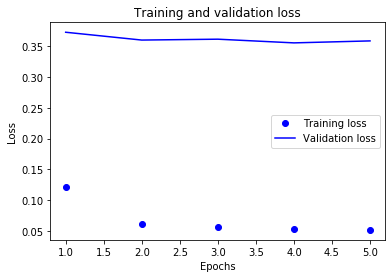

In [73]:
import matplotlib.pyplot as plt

acc = history_lstm1.history['accuracy']
val_acc = history_lstm1.history['val_accuracy']
loss = history_lstm1.history['loss']
val_loss = history_lstm1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

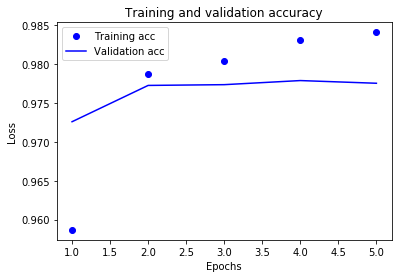

In [74]:
acc_values = history_lstm1.history['accuracy']
val_acc_values = history_lstm1.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<h2>Predicting the Model and Generating the Outcome </h2>

In [75]:
multi_lstm_preds=multi_lstm_model.predict_classes(third_X_test)

In [76]:
transpose=numpy.transpose([enc_y_test, multi_lstm_preds])

In [77]:
result_lstm1 = classification_report(enc_y_test, multi_lstm_preds, target_names=target_names)

In [78]:
print(result_lstm1)
#USING LSTM With more layer and neuron, we may get better result

               precision    recall  f1-score   support

impersonation       0.00      0.00      0.00     18606
    injection       0.19      0.36      0.25     16682
       normal       1.00      0.97      0.99    277960

     accuracy                           0.88    313248
    macro avg       0.40      0.44      0.41    313248
 weighted avg       0.90      0.88      0.89    313248

